# Master project XENON100 LEC MAP
Cesium source

In [1]:
# Boilerplate startup code
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy
from scipy.stats import norm


In [2]:
%matplotlib inline 
matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [3]:
# Import the XENON100 configuration from pax
from pax.configuration import load_configuration
pax_config = load_configuration('XENON100')

In [4]:
import hax
hax.init(main_data_paths=['/home/xenon100ws/newcs']) #Folder containing the data

In [5]:
from pax import units

In [6]:
from IPython.core.display import Image

In [7]:
hax.ipython.code_hider()

In [8]:
# Usefull minitree :
class AreaPerChannel(hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['peaks.area_per_channel*', 'peaks.n_saturated_per_channel*']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 
        s1 = event.peaks[event.interactions[0].s1]
        
        # Get the main interaction
        interaction = event.interactions[0]
        
        temp_dict = {}
        for channel, s1_area in enumerate(s1.area_per_channel):
            if (channel >=1) & (channel < 70): 
                temp_dict['s1_area_channel_%d' % channel] = s1_area
        return temp_dict

In [9]:
class R2 (hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
            
        # Get the main interaction
        interaction = event.interactions[0]
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(r2= interaction.x**2+interaction.y**2)

In [10]:
class Photopeak (hax.minitrees.TreeMaker):
    extra_branches = ['area']
    __version__ = '0.0.1' 
    
    # Cut data not in the photopeak, using cS1 and cS2_tot_bottom values determined in a other note
    # "MasterProjectCs137"
    
    def extract_data(self, event):
       
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main interaction
        interaction = event.interactions[0]
            
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        event_data=dict()
        if len(event.interactions) !=0:
            if (s1.area * interaction.s1_area_correction >750) &(s1.area * interaction.s1_area_correction <1600):
                event_data['newcs1']=s1.area * interaction.s1_area_correction
            
            if ((1-s2.area_fraction_top)*interaction.s2_area_correction*s2.area) > 2.5e5:
                event_data['newcs2']=((1-s2.area_fraction_top)*interaction.s2_area_correction*s2.area)
              
        return event_data
       

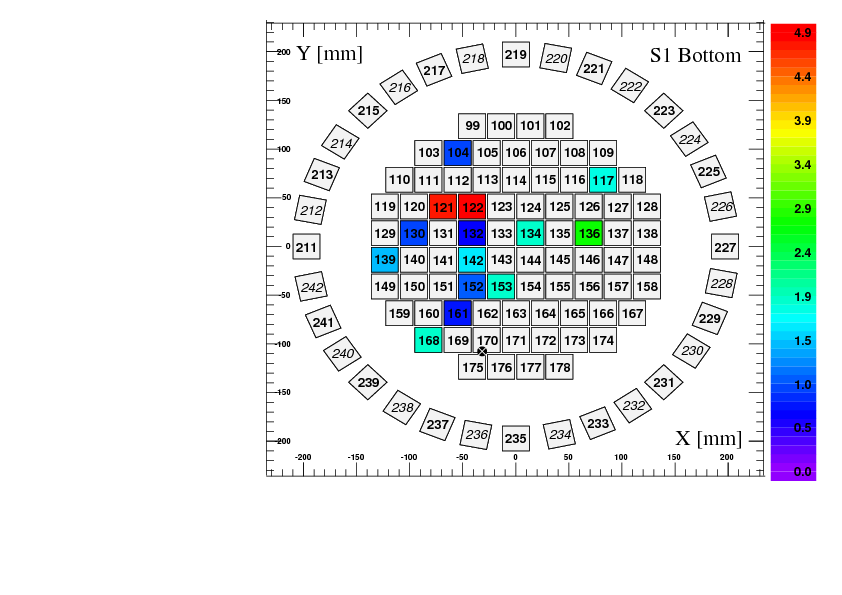

In [11]:
Image('https://inspirehep.net/record/1122618/files/fig10_s1.png')


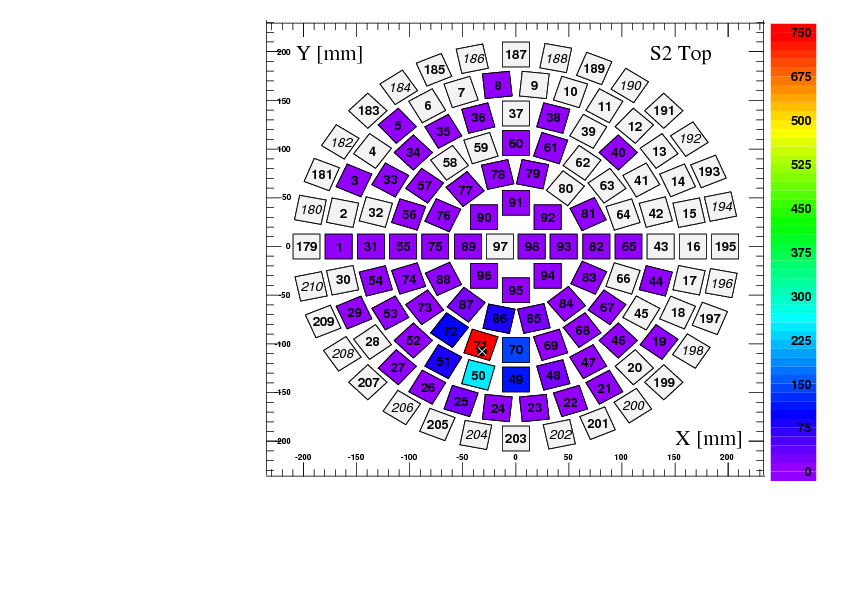

In [12]:
Image('https://inspirehep.net/record/1122618/files/fig10_s2.png')

# Cesium data :

In [13]:
dataset=['test_data','pax_v410_xe100_110912_1809','pax_v410_xe100_110927_1949','pax_v410_xe100_110718_1511','pax_v410_xe100_110829_1516','pax_v410_xe100_110905_1435','pax_v410_xe100_110919_1747']


In [14]:
# use hax on our data
data = hax.minitrees.load(dataset, treemakers=[Photopeak,AreaPerChannel,'Basics'], force_reload=True)
print(len(data))

Found minitree at ./test_data_Photopeak.root
Don't know a dataset named test_data, trying to find it anyway...


100%|██████████| 73000/73000 [00:08<00:00, 8127.74it/s] 


Created minitree Photopeak for dataset test_data
Found minitree at ./pax_v410_xe100_110912_1809_Photopeak.root
Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:06<00:00, 7210.94it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110912_1809
Found minitree at ./pax_v410_xe100_110927_1949_Photopeak.root


  0%|          | 1/50000 [00:00<1:30:27,  9.21it/s]

Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:04<00:00, 10479.26it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110927_1949
Found minitree at ./pax_v410_xe100_110718_1511_Photopeak.root
Don't know a dataset named pax_v410_xe100_110718_1511, trying to find it anyway...


100%|██████████| 50000/50000 [00:07<00:00, 7141.71it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110718_1511


  0%|          | 1/50000 [00:00<1:25:23,  9.76it/s]

Found minitree at ./pax_v410_xe100_110829_1516_Photopeak.root
Don't know a dataset named pax_v410_xe100_110829_1516, trying to find it anyway...


100%|██████████| 50000/50000 [00:07<00:00, 6980.11it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110829_1516


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110905_1435_Photopeak.root
Don't know a dataset named pax_v410_xe100_110905_1435, trying to find it anyway...


100%|██████████| 50000/50000 [00:07<00:00, 9411.81it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110905_1435
Found minitree at ./pax_v410_xe100_110919_1747_Photopeak.root


  0%|          | 1/50000 [00:00<1:27:24,  9.53it/s]

Don't know a dataset named pax_v410_xe100_110919_1747, trying to find it anyway...


100%|██████████| 50000/50000 [00:06<00:00, 9356.29it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110919_1747


  0%|          | 0/73000 [00:00<?, ?it/s]

Found minitree at ./test_data_AreaPerChannel.root
Don't know a dataset named test_data, trying to find it anyway...


100%|██████████| 73000/73000 [00:28<00:00, 2543.85it/s]


Created minitree AreaPerChannel for dataset test_data


  0%|          | 1/50000 [00:00<1:45:56,  7.87it/s]

Found minitree at ./pax_v410_xe100_110912_1809_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:26<00:00, 2149.79it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110912_1809


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110927_1949_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:15<00:00, 3308.77it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110927_1949


  0%|          | 1/50000 [00:00<1:26:43,  9.61it/s]

Found minitree at ./pax_v410_xe100_110718_1511_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110718_1511, trying to find it anyway...


100%|██████████| 50000/50000 [00:25<00:00, 2522.38it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110718_1511


  0%|          | 1/50000 [00:00<1:37:49,  8.52it/s]

Found minitree at ./pax_v410_xe100_110829_1516_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110829_1516, trying to find it anyway...


100%|██████████| 50000/50000 [00:26<00:00, 1887.17it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110829_1516


  0%|          | 1/50000 [00:00<1:28:00,  9.47it/s]

Found minitree at ./pax_v410_xe100_110905_1435_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110905_1435, trying to find it anyway...


100%|██████████| 50000/50000 [00:29<00:00, 1698.91it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110905_1435


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110919_1747_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110919_1747, trying to find it anyway...


100%|██████████| 50000/50000 [00:27<00:00, 2354.48it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110919_1747


  0%|          | 0/73000 [00:00<?, ?it/s]

Found minitree at ./test_data_Basics.root
Don't know a dataset named test_data, trying to find it anyway...


100%|██████████| 73000/73000 [00:38<00:00, 1898.04it/s]


Created minitree Basics for dataset test_data
Found minitree at ./pax_v410_xe100_110912_1809_Basics.root
Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:23<00:00, 2087.94it/s]


Created minitree Basics for dataset pax_v410_xe100_110912_1809


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110927_1949_Basics.root
Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:16<00:00, 3027.71it/s]


Created minitree Basics for dataset pax_v410_xe100_110927_1949


  0%|          | 1/50000 [00:00<1:25:02,  9.80it/s]

Found minitree at ./pax_v410_xe100_110718_1511_Basics.root
Don't know a dataset named pax_v410_xe100_110718_1511, trying to find it anyway...


100%|██████████| 50000/50000 [00:21<00:00, 2316.04it/s]


Created minitree Basics for dataset pax_v410_xe100_110718_1511


  0%|          | 1/50000 [00:00<1:25:52,  9.70it/s]

Found minitree at ./pax_v410_xe100_110829_1516_Basics.root
Don't know a dataset named pax_v410_xe100_110829_1516, trying to find it anyway...


100%|██████████| 50000/50000 [00:22<00:00, 2227.01it/s]


Created minitree Basics for dataset pax_v410_xe100_110829_1516


  0%|          | 1/50000 [00:00<1:32:35,  9.00it/s]

Found minitree at ./pax_v410_xe100_110905_1435_Basics.root
Don't know a dataset named pax_v410_xe100_110905_1435, trying to find it anyway...


100%|██████████| 50000/50000 [00:23<00:00, 2112.12it/s]


Created minitree Basics for dataset pax_v410_xe100_110905_1435


  0%|          | 1/50000 [00:00<1:27:55,  9.48it/s]

Found minitree at ./pax_v410_xe100_110919_1747_Basics.root
Don't know a dataset named pax_v410_xe100_110919_1747, trying to find it anyway...


100%|██████████| 50000/50000 [00:22<00:00, 2240.46it/s]


Created minitree Basics for dataset pax_v410_xe100_110919_1747
373000


In [15]:
# cut data with newcs1 == nan
data= data[(data['newcs1']>0)&(data['newcs2']>0)]
print('Number of events =',len(data))

Number of events = 73583


In [16]:
data['r']=np.sqrt(data['x']**2+data['y']**2)
data['phi']=np.arctan(data['y']/data['x'])

In [17]:
data.head(5)

index       newcs1         newcs2  index  s1_area_channel_1  \
4       4  1158.293602  300753.909481      4                0.0   
22     22  1098.850509  252778.134836     22                0.0   
29     29  1147.021603  256758.503109     29                0.0   
39     39  1113.680358  410072.850779     39                0.0   
42     42  1180.467104  276985.478157     42                0.0   

    s1_area_channel_10  s1_area_channel_11  s1_area_channel_12  \
4             0.000000            0.000000                 0.0   
22            0.000000            0.000000                 0.0   
29            2.931895            0.000000                 0.0   
39            1.337499            0.000000                 0.0   
42            0.468125            1.825827                 0.0   

    s1_area_channel_13  s1_area_channel_14    ...     largest_veto  \
4             0.000000            1.996391    ...         3.403345   
22            0.935099            0.000000    ...         0.000000   
29            0.000000            3.106153    ...         4.594101   
39            0.000000            1.155174    ...        37.444862   
42            3.192722            0.000000    ...         0.000000   

             s1  s1_area_fraction_top            s2  s2_area_fraction_top  \
4    849.740295              0.255484  344215.21875              0.366078   
22  1073.199097              0.160233  270263.31250              0.366614   
29  1247.790649              0.145457  318191.28125              0.349450   
39  1063.908569              0.154182  326882.21875              0.373772   
42  1143.417236              0.120380  272065.09375              0.373556   

            x          y          z          r       phi  
4    6.929379  -0.901130  -6.002091   6.987727 -0.129319  
22   2.641243   9.601695 -15.863226   9.958349  1.302355  
29   3.449152   7.612994 -18.272846   8.357890  1.145400  
39  -0.652542 -13.144068 -17.921568  13.160256  1.521192  
42  11.838983   3.324859 -20.330551  12.296999  0.273787  

[5 rows x 94 columns]

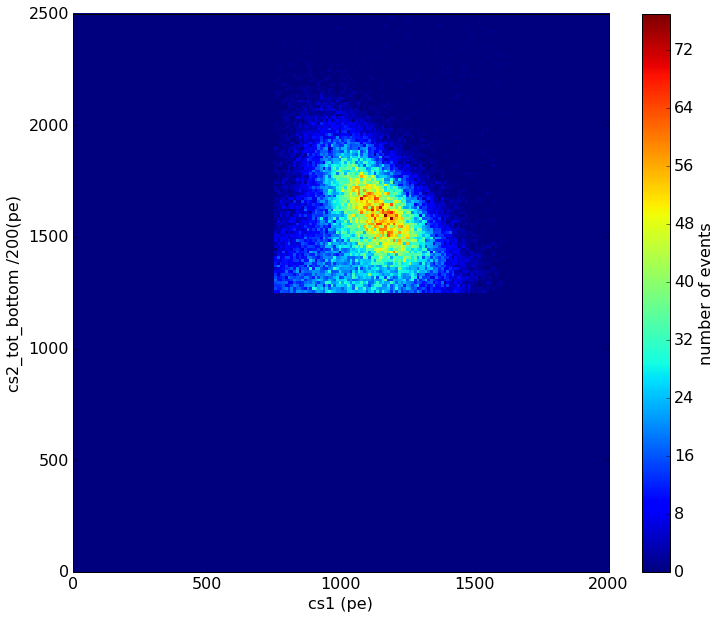

In [18]:
plt.hist2d(data['newcs1'],data['newcs2']/200, bins=200, range=[[0,2000],[0,2500]])
plt.colorbar(label='number of events')
plt.xlabel('cs1 (pe)')
plt.ylabel('cs2_tot_bottom /200(pe)')
plt.show()

In [19]:
new_cs2_tot_bottom = data['newcs2']
new_cs1 =data['newcs1']

# Combined Energy Scale (CES)
Erik's code

In [20]:
from recarray_tools import filter_on_fields, group_by, append_fields
from tqdm import tqdm
from scipy.optimize import curve_fit
from pax.formats import flat_data_formats
file_format = 'hdf5'
ioformat = flat_data_formats[file_format]()

In [21]:
# Some functions that'll be used
def func_poly_2(x,a,b,c):
    return a + b*x + c*x**2
def func_exp(x,a,tau):
    return a*np.exp(-x/tau)
def func_gauss(x,A,mu,sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

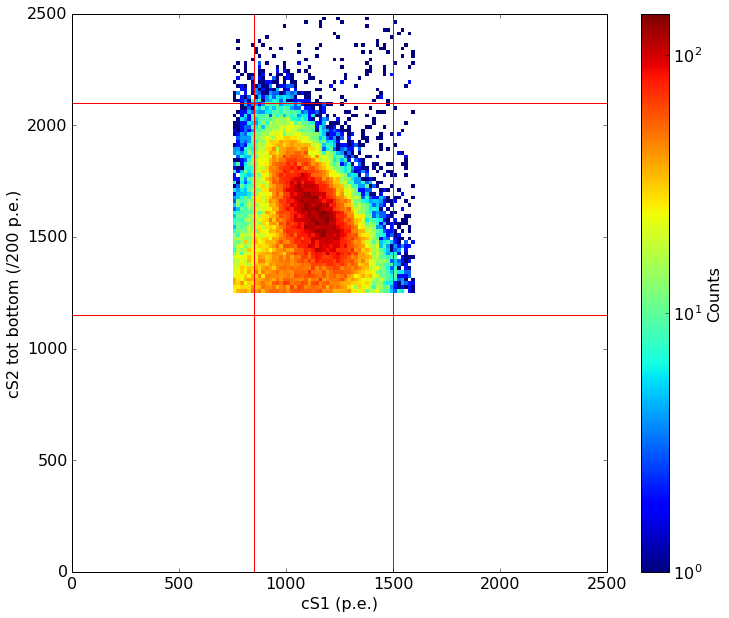

In [22]:
# We have to fit a Gaussian fonction to the ellipse in the red lines
from matplotlib.colors import LogNorm


plt.hist2d(np.array(new_cs1),np.array(new_cs2_tot_bottom)/200, bins=(150,150), range =([0,2500],[0,2500]),cmin=1,norm=LogNorm())
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
plt.axvline(850,color='red')
plt.axvline(1500,color='red')
plt.axhline(1150,color='red')
plt.axhline(2100,color='red')



plt.show()

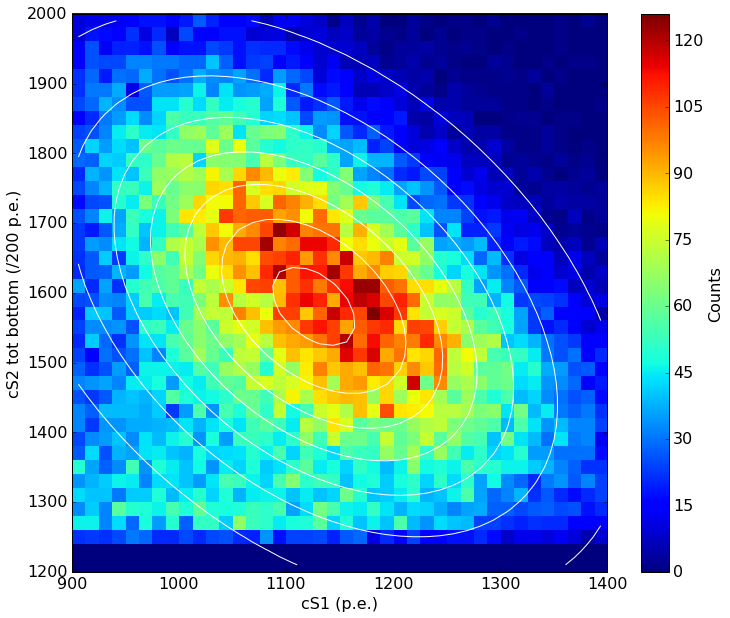

[  1.04717091e+02   1.12597198e+03   1.58059080e+03   1.14650310e+02
   2.09091023e+02  -4.22153085e-01   4.56394073e+00]


In [23]:
# Settings!
binsize = 40
range_s1 = (900,1400)
range_s2 = (1200,2000)

# This is the function to fit
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

s1s2hist = plt.hist2d(np.array(new_cs1),(np.array(new_cs2_tot_bottom)/200),
         bins=(binsize,binsize),range=(range_s1,range_s2))
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
hist_counts,hist_s1, hist_s2, _ = s1s2hist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_s1[i+1]+hist_s1[i])/2
           for i in range(len(hist_s1)-1)]
y_fit_1d =[(hist_s2[i+1]+hist_s2[i])/2
           for i in range(len(hist_s2)-1)]

x_flat = []
y_flat = []
z_flat = []

# Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
# Has been checked.

for i_y in range(len(y_fit_1d)):
    for i_x in range(len(x_fit_1d)):
        x_flat.append(x_fit_1d[i_x])
        y_flat.append(y_fit_1d[i_y])
        z_flat.append(hist_counts[i_x,i_y])
        
# twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):

initial_guess = (20,1140,1550,100,500,0.78,0)

popt, pcov = curve_fit(twoD_Gaussian, (x_flat, y_flat), z_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

# For plotting purposes
data_fitted = np.array([twoD_Gaussian((x, y), *popt)
               for x in x_fit_1d
               for y in y_fit_1d]).flatten()


plt.contour(x_fit_1d, y_fit_1d, data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='w')


plt.show()

print(popt)

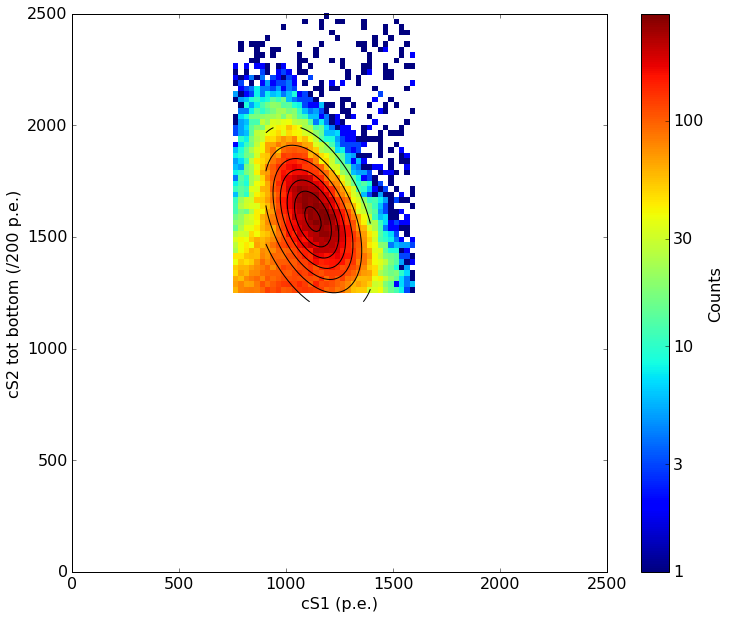

In [24]:

plt.hist2d(np.array(new_cs1),np.array(new_cs2_tot_bottom)/200,
           bins=(100,100),range=((0,2500),(0,2500)),cmin=1,norm=LogNorm())
cbar = plt.colorbar(label = 'Counts',ticks=[1,3,10,30,100])
cbar.set_ticklabels([1,3,10,30,100])
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
plt.contour(x_fit_1d, np.array(y_fit_1d), data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='black')




plt.show()

In [25]:
# We are moving to energy space!
mte1=popt[1]
mte2=popt[2]
energy_cs1= np.array(new_cs1)/popt[1]*662
energy_cs2=(np.array(new_cs2_tot_bottom)/200)/popt[2]*662
print(energy_cs1)
print(energy_cs2)

[ 681.00306018  646.05429742  674.37584082 ...,  798.50440387  838.26850409
  705.70648143]
[ 629.82490042  529.35625634  537.69175913 ...,  625.91654613  580.9788481
  547.24400372]


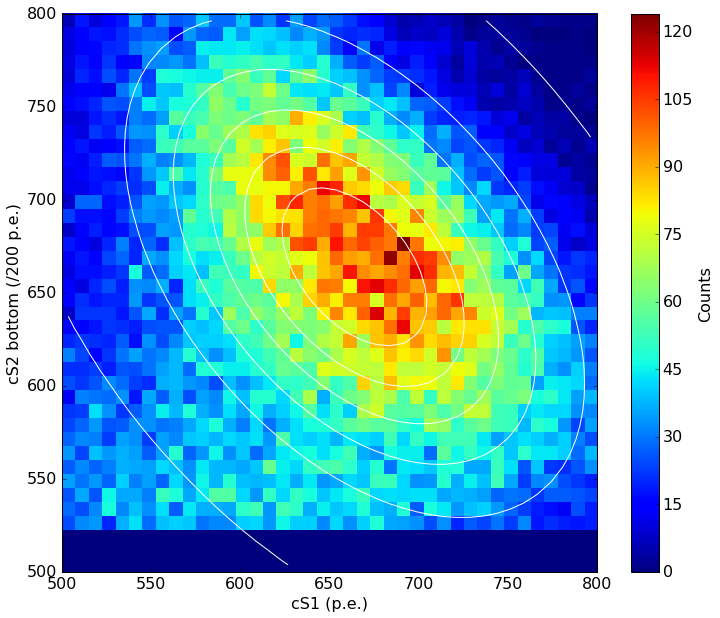

[  9.08730848e+01   6.64064427e+02   6.63926354e+02   7.00276376e+01
   7.32369845e+01  -4.68012360e-01   1.32256035e+01]


In [26]:
# Settings:
binsize = 40
range_s1 = (500,800)
range_s2 = (500,800)

# Better function!
def bivar(xdata_tuple, amplitude, xo,yo,sigma_x,sigma_y,rho,offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)  
    return offset + amplitude*np.exp((-1/(2*(1-rho**2)))*((x-xo)**2/(sigma_x**2) + 
                                                          (y-yo)**2/(sigma_y**2) -
                                                          2*rho*(x-xo)*(y-yo)/(sigma_x*sigma_y)) 
                                    )

s1s2hist = plt.hist2d(np.array(energy_cs1),np.array(energy_cs2), bins=(binsize,binsize),range=(range_s1,range_s2))
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 bottom (/200 p.e.)")

# hist_counts: binsize x binsize array of number of counts
# s1 / s2: binsize+1 array of edges

hist_counts,hist_s1, hist_s2, _ = s1s2hist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_s1[i+1]+hist_s1[i])/2
           for i in range(len(hist_s1)-1)]
y_fit_1d =[(hist_s2[i+1]+hist_s2[i])/2
           for i in range(len(hist_s2)-1)]

x_flat = []
y_flat = []
z_flat = []

# Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
# Has been checked.
for i_y in range(len(y_fit_1d)):
    for i_x in range(len(x_fit_1d)):
        x_flat.append(x_fit_1d[i_x])
        y_flat.append(y_fit_1d[i_y])
        z_flat.append(hist_counts[i_x,i_y])
        
# twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
initial_guess = (20,662,662,100,100,0.78,0)
popt, pcov = curve_fit(bivar, (x_flat, y_flat), z_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

# For plotting purposes
data_fitted = np.array([bivar((x, y), *popt)
               for x in x_fit_1d
               for y in y_fit_1d]).flatten()


plt.contour(x_fit_1d, y_fit_1d, data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='w')



plt.show()
print(popt)


anticorrelation angle= -0.833141814293 rad


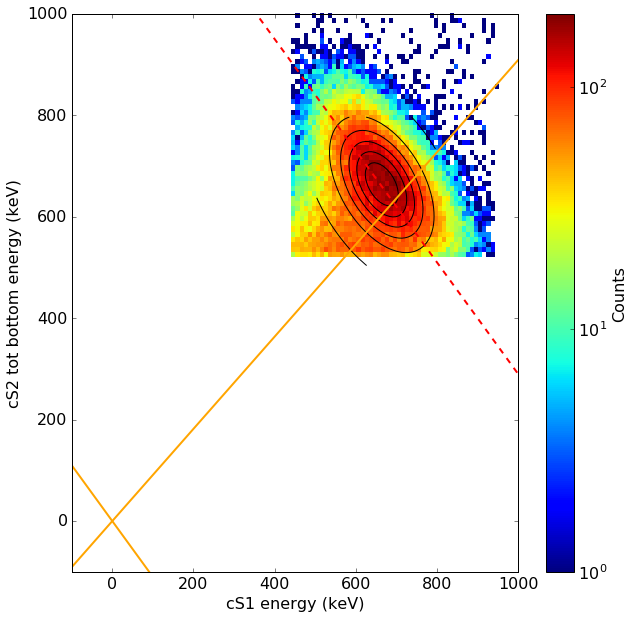

In [27]:
binsize=40
plt.figure(figsize=(10,10))
plt.hist2d(np.array(energy_cs1),np.array(energy_cs2),
           bins=(100,100),range=((0,1000),(0,1000)),cmin=1,norm=LogNorm())
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 energy (keV)")
plt.ylabel("cS2 tot bottom energy (keV)")
plt.contour(x_fit_1d, np.array(y_fit_1d), data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='black')


sigma_x  = popt[3]
sigma_y  = popt[4]
rho = popt[5]


theta=0.5*np.arctan(2*rho*(sigma_x*sigma_y)/(sigma_x**2-sigma_y**2))

theta=theta-np.pi/2 # Angle definition

print('anticorrelation angle=', theta,'rad')


x_list = [x for x in np.arange(-2000,2000,1.)]
v_axis = [-x*np.cos(theta)/np.sin(theta) for x in x_list]
u_axis = [x*np.tan(theta) for x in x_list]

c = 662.*np.cos(theta)-662.*np.sin(theta)

u_axis_2 = [x*np.tan(theta) + c/np.cos(theta) for x in x_list]
v_axis_2 = [-x*np.cos(theta)/np.sin(theta) + c/np.sin(theta) for x in x_list]

plt.plot(x_list,u_axis,color='orange',lw=2)
plt.plot(x_list,v_axis,color='orange',lw=2)
plt.plot(x_list,u_axis_2,color='red',lw=2,ls='--')

plt.xlim(-100,1000)
plt.ylim(-100,1000)


plt.show()

Projection of the energy along the large axis of the ellipse

anticorrelation angle= -0.833141814293 rad


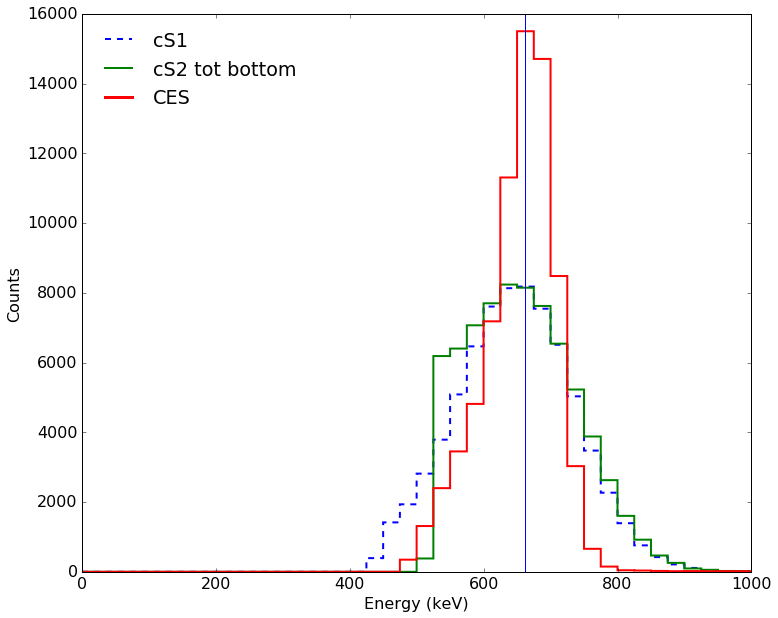

In [28]:
# http://2.bp.blogspot.com/-G-KLeae_EYU/TgdtpzntqvI/AAAAAAAABrI/Rv8Iea9zFVQ/s1600/Screen%2Bshot%2B2011-06-26%2Bat%2B1.33.51%2BPM.png

theta = 0.5*np.arctan(2*rho*(sigma_x*sigma_y)/(sigma_x**2-sigma_y**2))
theta=theta-np.pi/2 # Angle definition

print('anticorrelation angle=',theta,'rad')

# u = x cos(th) + y sin(th)
# v = y cos(th) - x sin(th)
peak_v = 662.*np.cos(theta)-662.*np.sin(theta)

# Parameters for plotting
myrange = (0,1000)
mybins = 40

# Produce histograms
plt.hist(np.array(energy_cs1),bins=mybins,histtype='step',label='cS1',range=myrange,linestyle='dashed',lw=2)
plt.hist(np.array(energy_cs2),bins=mybins,histtype='step',label='cS2 tot bottom',range=myrange,lw=2)
plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=mybins,
         histtype='step',label='CES',range=myrange,lw=2)

# Legend
p1,  = plt.plot(0,0,color='blue',linestyle='dashed',lw=2)
p2,  = plt.plot(0,0,color='green',lw=2)
p3,  = plt.plot(0,0,color='red',lw=3)
l1 = plt.legend([p1,p2,p3], ["cS1","cS2 tot bottom","CES"], loc='upper left',frameon=False)

plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.axvline(662)


plt.show()

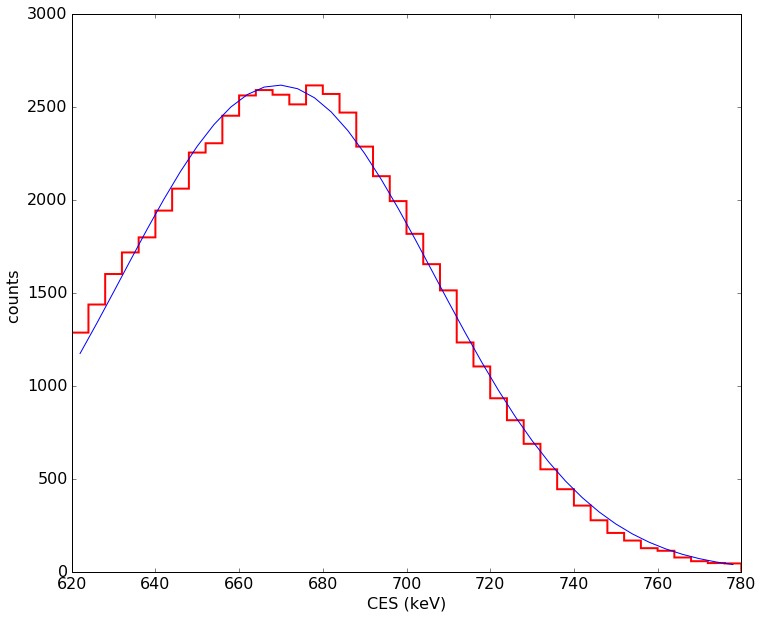

[ 2616.87215505   669.39674039   -37.42811807]
sigma_CES= -37.4281180692


In [29]:
# Fit an one dimentional Gaussian function to CES to determine the standard deviation
# Settings!
binsize = 40
myrange=(620,780)
mybins=40
# This is the function to fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p is the initial guess

CEShist = plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=mybins,
         histtype='step',label='CES',range=myrange,lw=2, color='red')


plt.xlabel("CES (keV)")
plt.ylabel("counts ")

hist_counts,hist_energy,_=CEShist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_energy[i+1]+hist_energy[i])/2
           for i in range(0,len(hist_energy)-1)]

x_flat = []
y_flat = []


#  Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
#  Has been checked.

for i_x in range(len(x_fit_1d)):
    x_flat.append(x_fit_1d[i_x])
    y_flat.append(hist_counts[i_x])
        
#  oneD_Gaussian:

initial_guess = (400,662,100)

popt, pcov = curve_fit(gauss,x_flat, y_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

#  For plotting purposes
data_fitted = np.array([gauss(x, *popt)
               for x in x_fit_1d]).flatten()

plt.plot(x_fit_1d, data_fitted.reshape(binsize,order ='F'))

plt.show()

print(popt)
sigma_CES=popt[2]
print('sigma_CES=', popt[2])

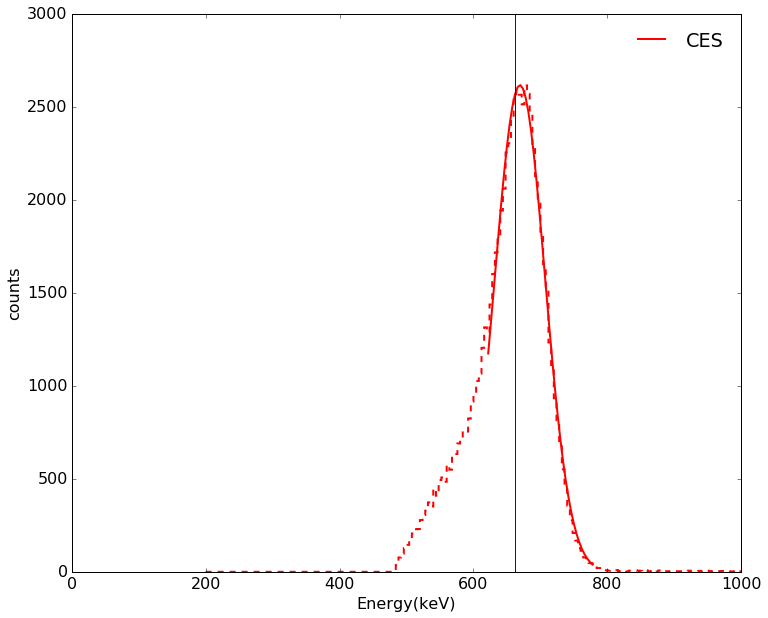

In [30]:
myrange=(200,1000)
binsize=40
plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=200,
         histtype='step',label='CES',range=myrange,lw=2, linestyle ='dashed',color='red')

plt.xlabel("Energy(keV)")
plt.ylabel("counts")
         
plt.plot(x_fit_1d, data_fitted.reshape(binsize,order ='F'),color='red', lw=2)
# Legend
p1,  = plt.plot(0,0,color='red',lw=2)

l1 = plt.legend([p1], ["CES"], loc='upper right',frameon=False)
plt.axvline (662)
# plt.axvline(662+37.7)
# plt.axvline(662-37.7)
plt.show()

 # Select events in the photopeak (662- 2* $\sigma$ < CES <662 + 2* $\sigma$)

In [31]:
CES=np.array(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)))
dataE2s=data[(CES>662+2*sigma_CES) & (CES<662-2*sigma_CES)]
CESselect2s= CES[(CES>662+2*sigma_CES)&(CES<662-2*sigma_CES)] 
len(CESselect2s)

61761

In [32]:
dataE2s.head()

index       newcs1         newcs2  index  s1_area_channel_1  \
4       4  1158.293602  300753.909481      4                0.0   
22     22  1098.850509  252778.134836     22                0.0   
29     29  1147.021603  256758.503109     29                0.0   
42     42  1180.467104  276985.478157     42                0.0   
55     55  1136.810747  286751.131700     55                0.0   

    s1_area_channel_10  s1_area_channel_11  s1_area_channel_12  \
4             0.000000            0.000000                 0.0   
22            0.000000            0.000000                 0.0   
29            2.931895            0.000000                 0.0   
42            0.468125            1.825827                 0.0   
55            0.661613            1.588478                 0.0   

    s1_area_channel_13  s1_area_channel_14    ...     largest_veto  \
4             0.000000            1.996391    ...         3.403345   
22            0.935099            0.000000    ...         0.000000   
29            0.000000            3.106153    ...         4.594101   
42            3.192722            0.000000    ...         0.000000   
55            5.646027            3.399468    ...         0.000000   

             s1  s1_area_fraction_top            s2  s2_area_fraction_top  \
4    849.740295              0.255484  344215.21875              0.366078   
22  1073.199097              0.160233  270263.31250              0.366614   
29  1247.790649              0.145457  318191.28125              0.349450   
42  1143.417236              0.120380  272065.09375              0.373556   
55   957.149719              0.178900  316809.31250              0.347038   

            x         y          z          r       phi  
4    6.929379 -0.901130  -6.002091   6.987727 -0.129319  
22   2.641243  9.601695 -15.863226   9.958349  1.302355  
29   3.449152  7.612994 -18.272846   8.357890  1.145400  
42  11.838983  3.324859 -20.330551  12.296999  0.273787  
55   5.872881  8.358757 -11.779012  10.215652  0.958326  

[5 rows x 94 columns]

# Find the S1 values in the middle of the TPC (z~-15 cm and r~0 cm$^2$)

In [33]:
# Values of S1 in the middle of the TPC
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)

number_list = []
s1_mean_values=[]

box_cut=[]

for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1'])/len(dataE2s[box_cut])))
            
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break
       

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(z_slices)-1,len(r_slices)-1)    
s1_mean_tpc=s1_mean_values[8][0] # In the middle of the TPC (z~15, r~0), values=1
print('values of S1 in the middle of the TPC= ',s1_mean_values[8][0], 'pe')

values of S1 in the middle of the TPC=  1235.17318672 pe


# Per PMT 

# PMT 1

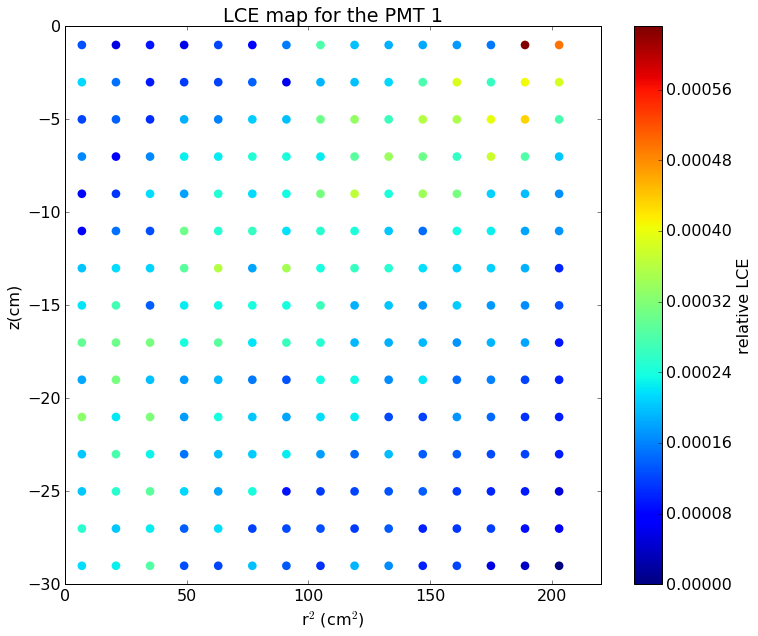

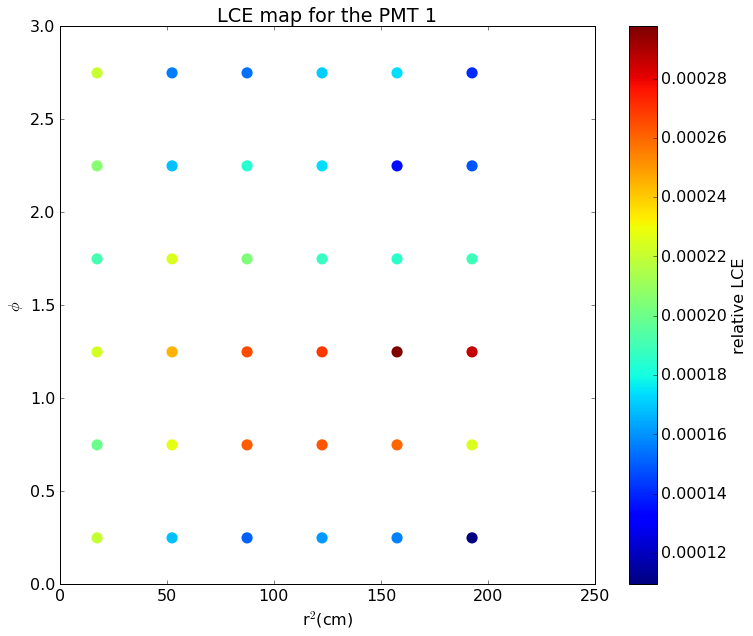

In [35]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)

number_list = []
s1_mean_values=[]

box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_1']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break
       

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result1=ri,zi,s1_mean_values

plt.scatter(result1[0],result1[1], c=result1[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT 1')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
number_list = []
s1_mean_values=[]
resultphi_2s=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):
    for j, r in enumerate(r_slices):    
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        number_list.append(len(dataE2s[box_cut]))    
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_1']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break


s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(6,6)   

resultphi1=ri,phii,s1_mean_values

LCE144=plt.scatter(resultphi1[0],resultphi1[1], c=resultphi1[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 1')
plt.show()


# PMT 2

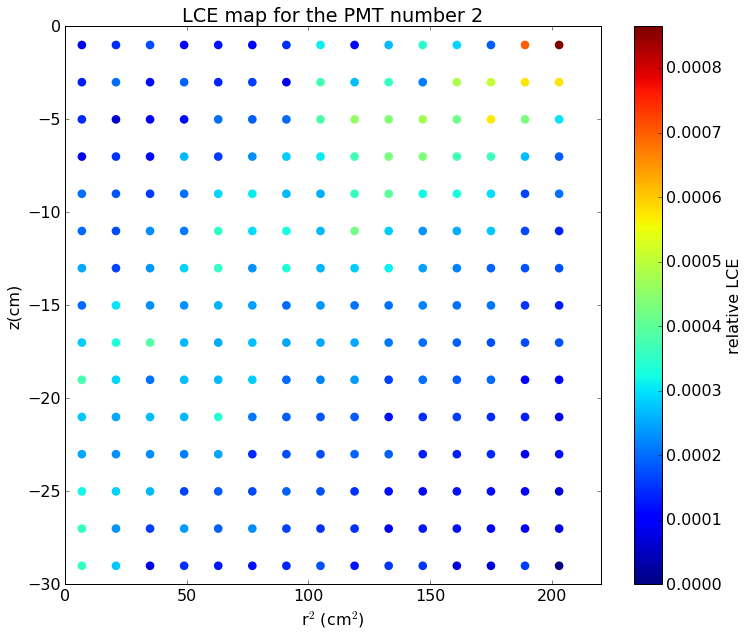

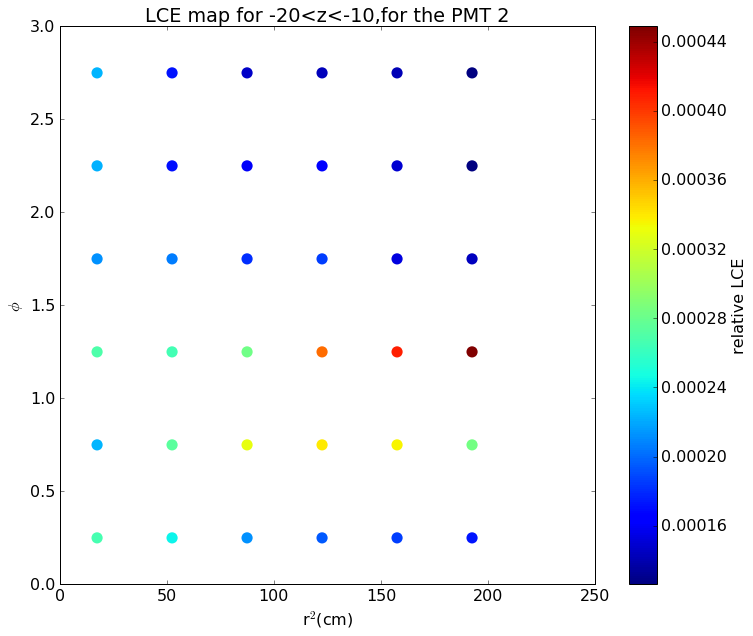

In [36]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_2']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result2=ri,zi,s1_mean_values

plt.scatter(result2[0],result2[1], c=result2[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 2')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
resultphi_2s=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_2']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi2=ri,phii,s1_mean_values

LCE141=plt.scatter(resultphi2[0],resultphi2[1], c=resultphi2[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for -20<z<-10,for the PMT 2')
plt.show()


# PMT 3

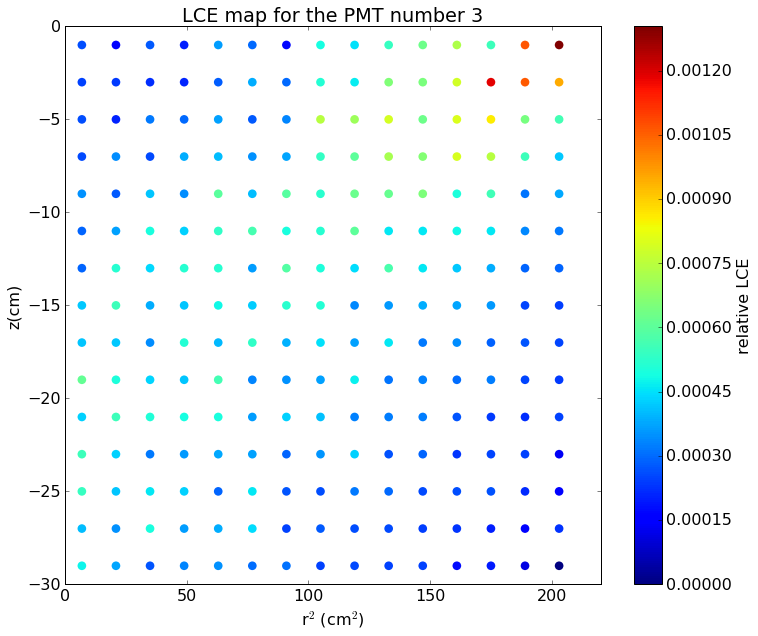

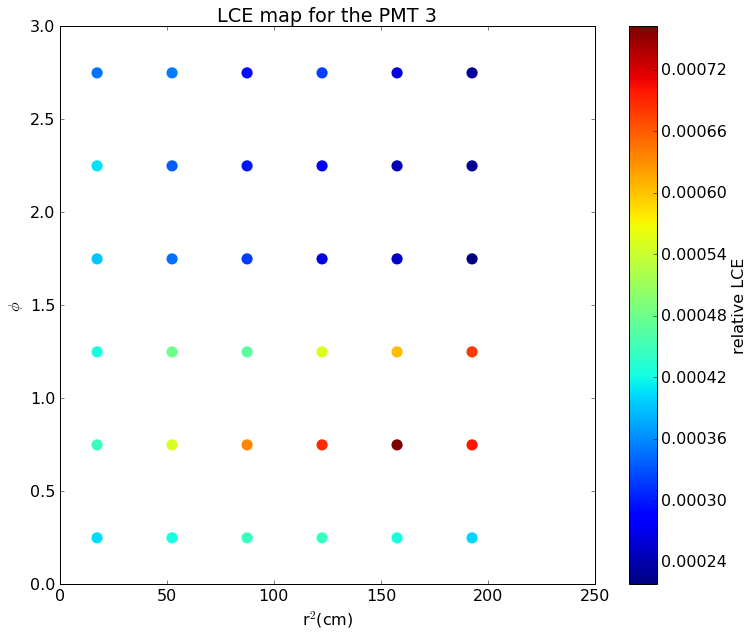

In [37]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_3']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result3=ri,zi,s1_mean_values

plt.scatter(result3[0],result3[1], c=result3[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 3')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_3']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi3=ri,phii,s1_mean_values

LCE141=plt.scatter(resultphi3[0],resultphi3[1], c=resultphi3[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 3')
plt.show()

# PMT 4

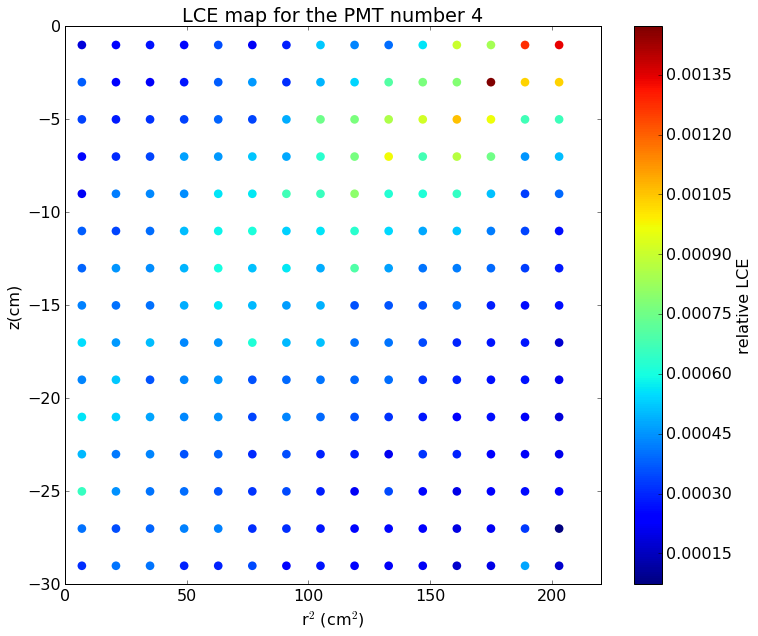

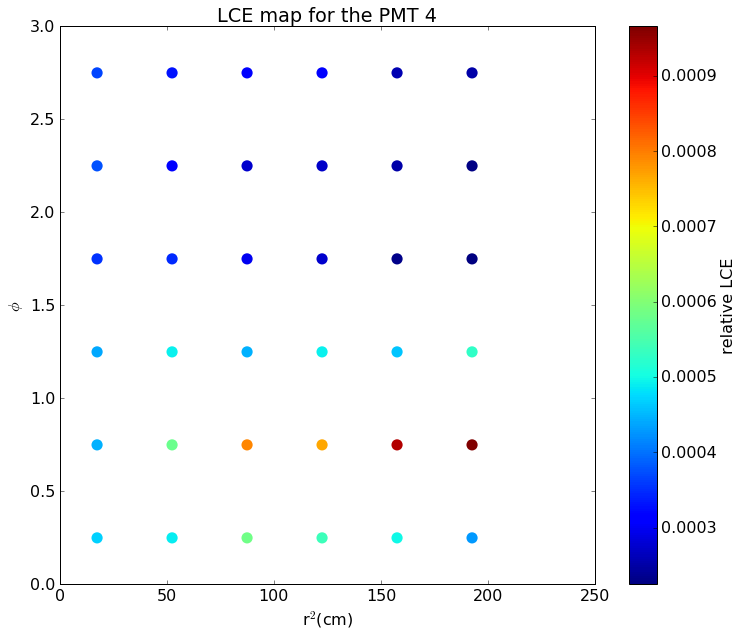

In [38]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_4']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result4=ri,zi,s1_mean_values

plt.scatter(result4[0],result4[1], c=result4[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 4')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_4']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi4=ri,phii,s1_mean_values

plt.scatter(resultphi4[0],resultphi4[1], c=resultphi4[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 4')
plt.show()

# PMT 5

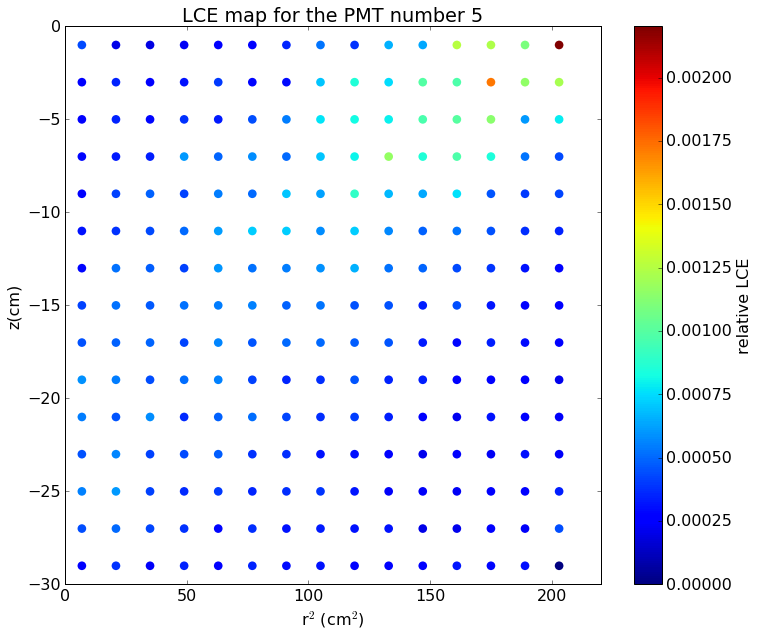

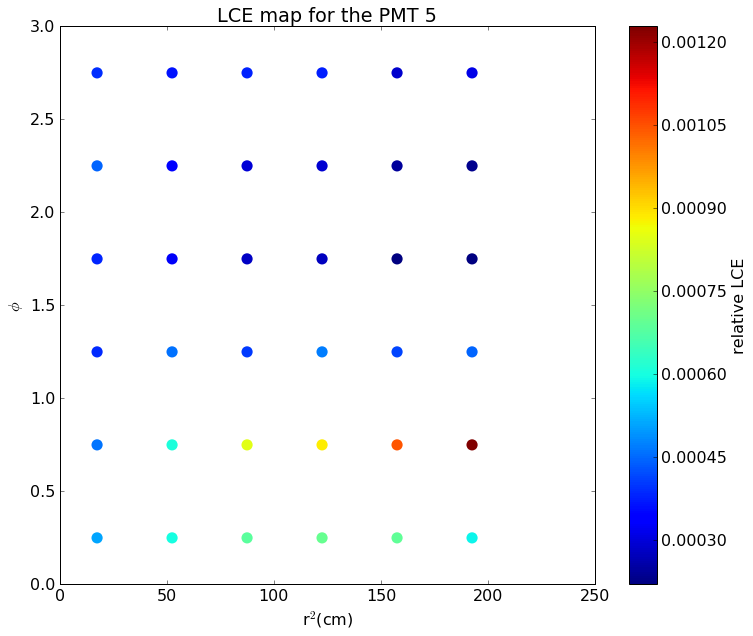

In [39]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_5']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result5=ri,zi,s1_mean_values

plt.scatter(result5[0],result5[1], c=result5[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 5')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_5']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi5=ri,phii,s1_mean_values

plt.scatter(resultphi5[0],resultphi5[1], c=resultphi5[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 5')
plt.show()

# PMT 6

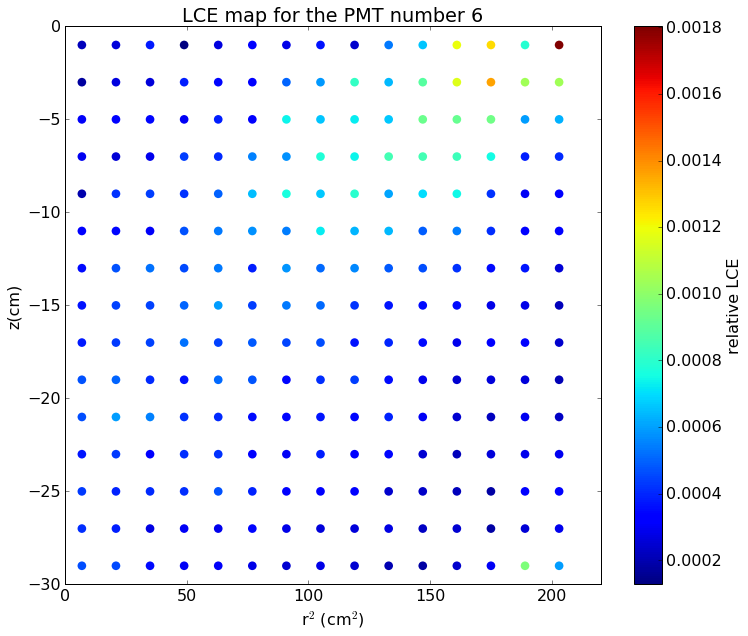

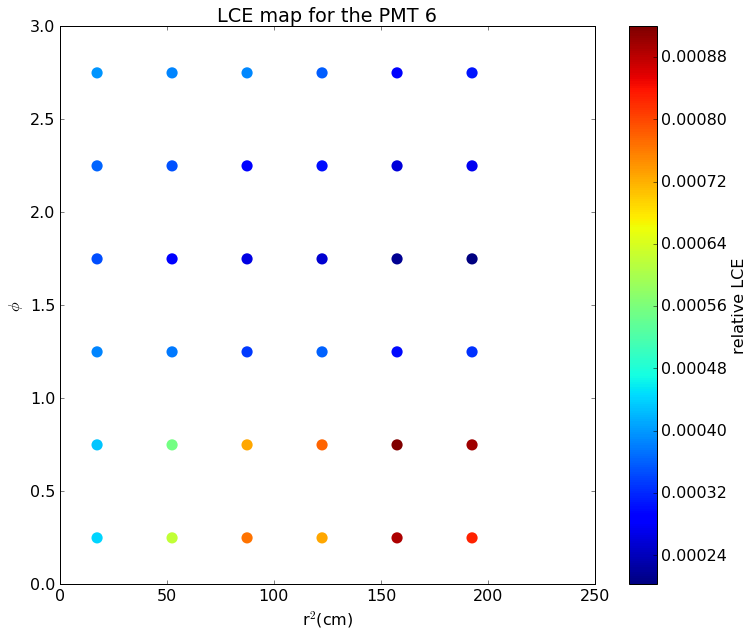

In [40]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_6']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result6=ri,zi,s1_mean_values

plt.scatter(result6[0],result6[1], c=result6[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 6')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_6']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi6=ri,phii,s1_mean_values

plt.scatter(resultphi6[0],resultphi6[1], c=resultphi6[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 6')
plt.show()

# PMT 7

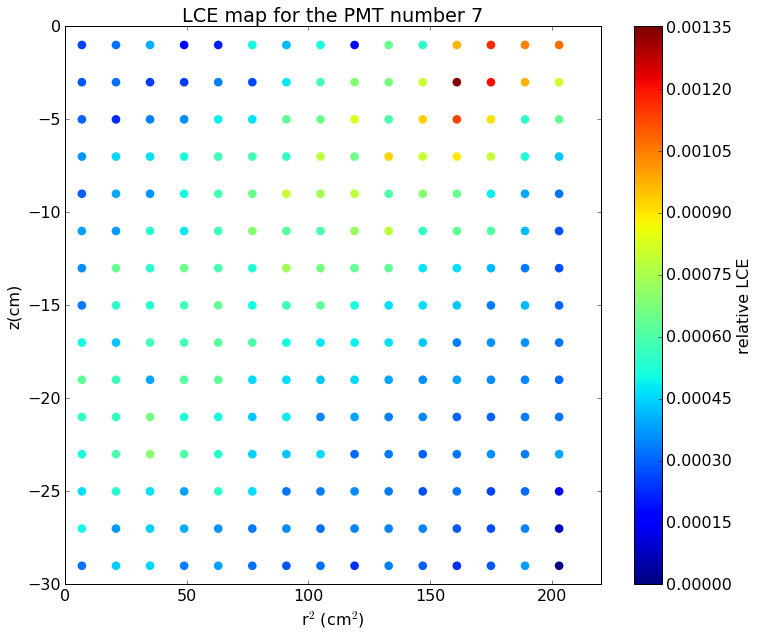

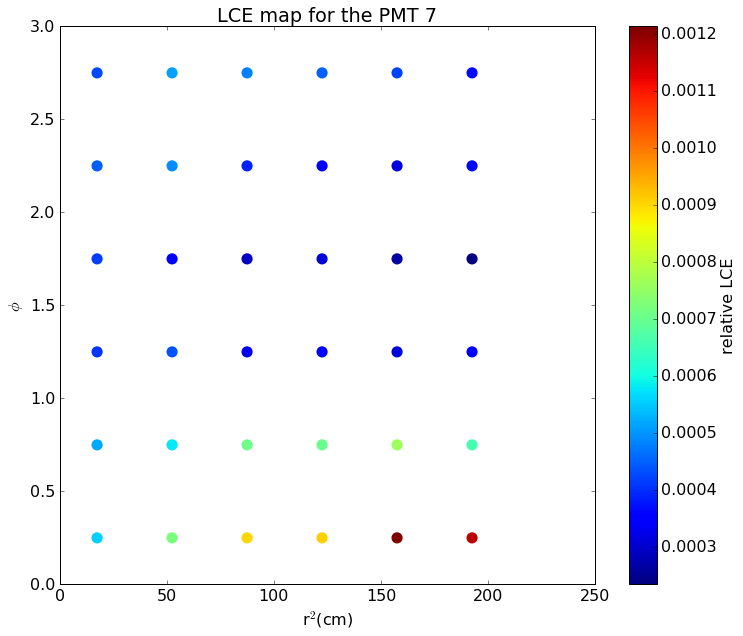

In [41]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_7']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result7=ri,zi,s1_mean_values

plt.scatter(result7[0],result7[1], c=result7[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 7')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_7']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi7=ri,phii,s1_mean_values

plt.scatter(resultphi7[0],resultphi7[1], c=resultphi7[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 7')
plt.show()

# PMT 8

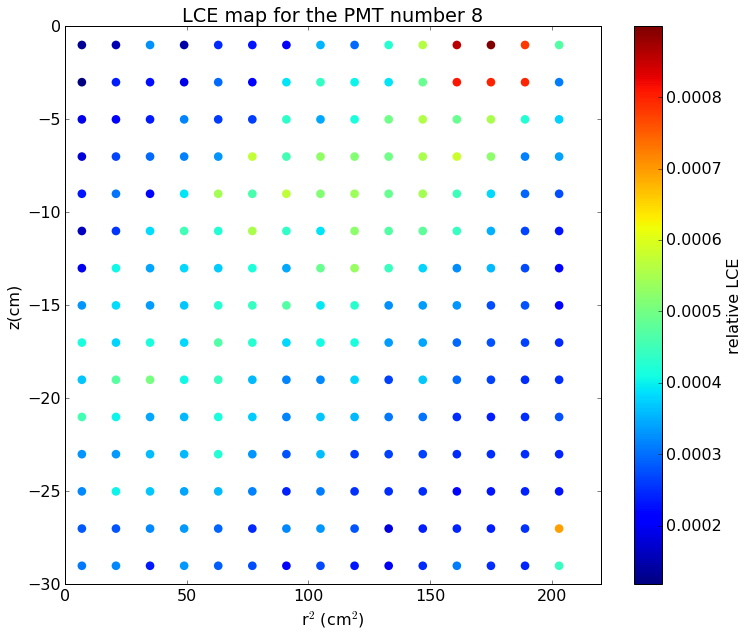

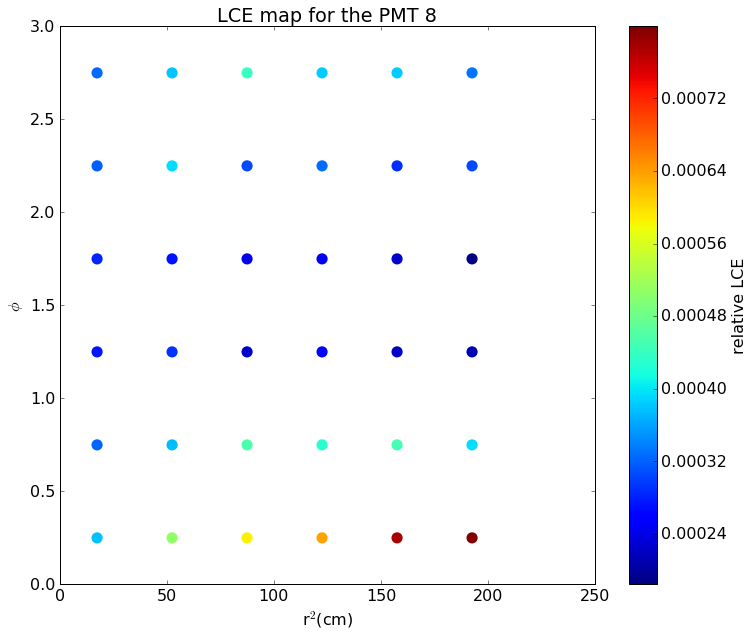

In [42]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_8']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result8=ri,zi,s1_mean_values

plt.scatter(result8[0],result8[1], c=result8[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 8')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_8']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi8=ri,phii,s1_mean_values

plt.scatter(resultphi8[0],resultphi8[1], c=resultphi8[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 8')
plt.show()

# PMT 9

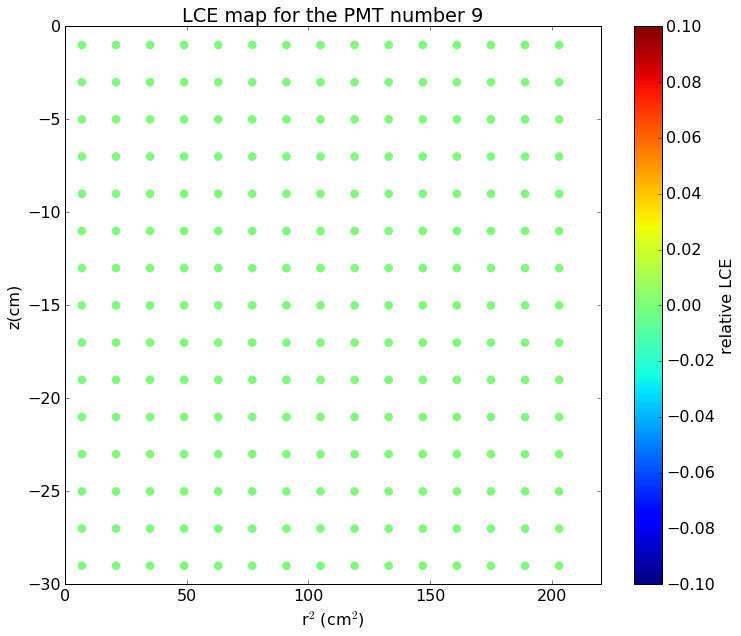

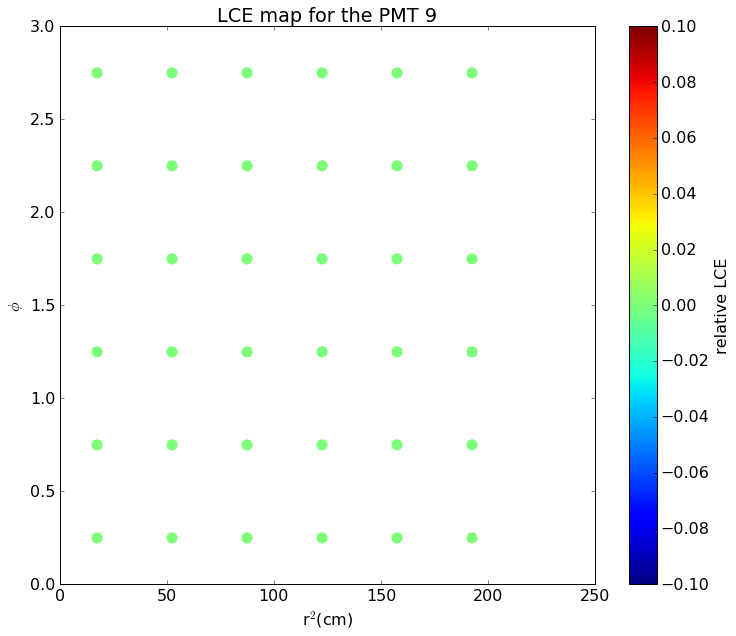

In [43]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_9']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result9=ri,zi,s1_mean_values

plt.scatter(result9[0],result9[1], c=result9[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 9')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_9']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi9=ri,phii,s1_mean_values

plt.scatter(resultphi9[0],resultphi9[1], c=resultphi9[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 9')
plt.show()

# PMT 10

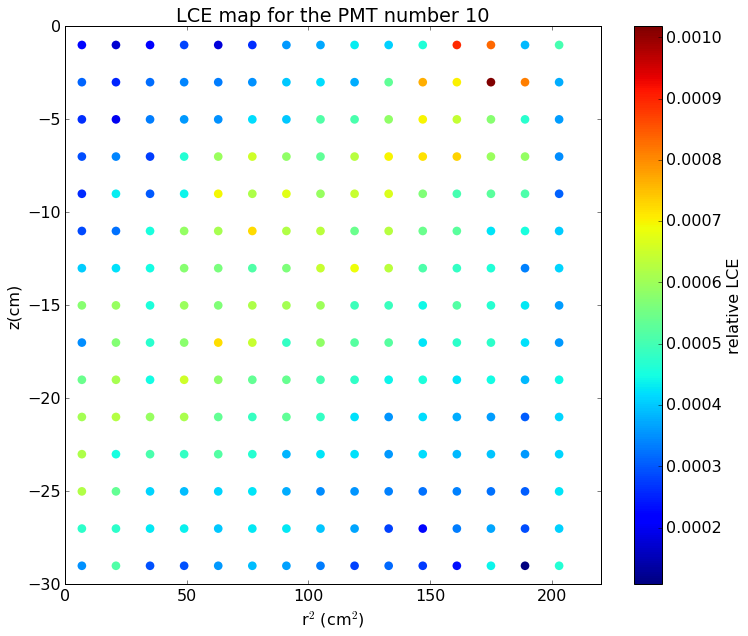

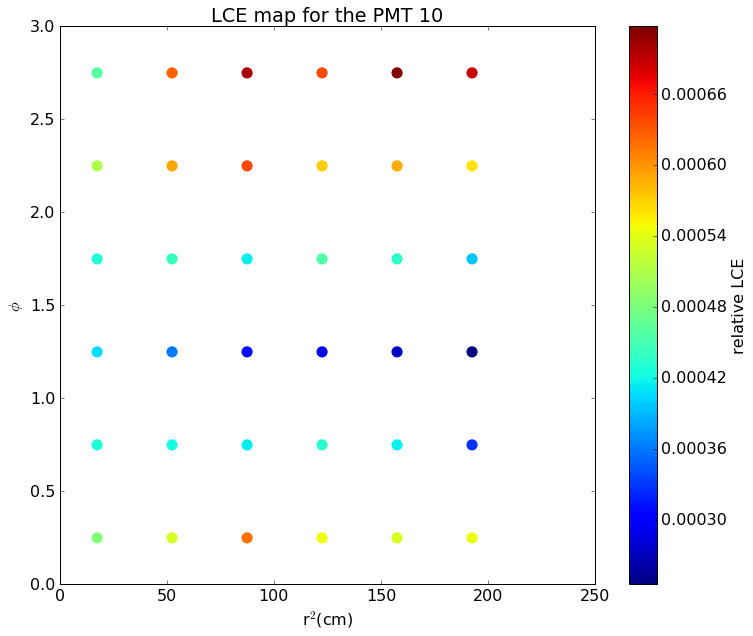

In [44]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_10']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result10=ri,zi,s1_mean_values

plt.scatter(result10[0],result10[1], c=result10[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 10')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_10']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi10=ri,phii,s1_mean_values

plt.scatter(resultphi10[0],resultphi10[1], c=resultphi10[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 10')
plt.show()

# PMT 11

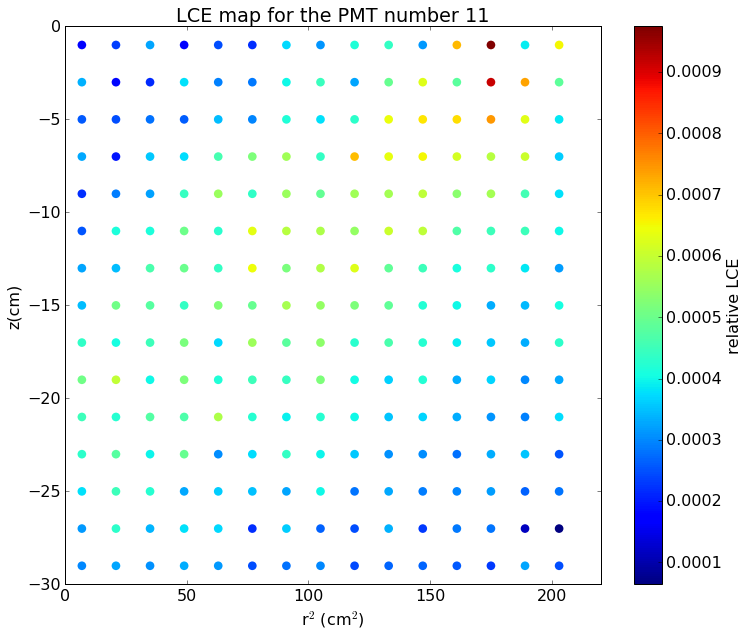

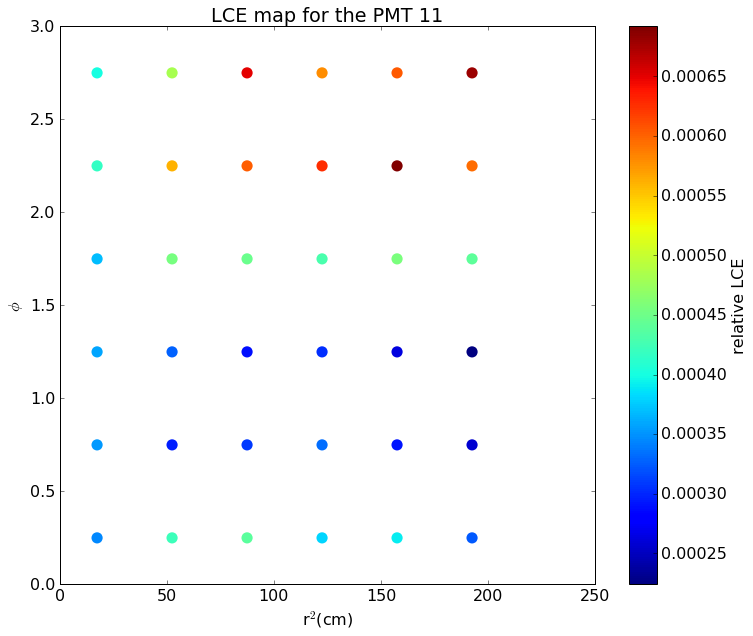

In [45]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_11']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result11=ri,zi,s1_mean_values

plt.scatter(result11[0],result11[1], c=result11[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 11')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_11']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi11=ri,phii,s1_mean_values

plt.scatter(resultphi11[0],resultphi11[1], c=resultphi11[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 11')
plt.show()

# PMT 12

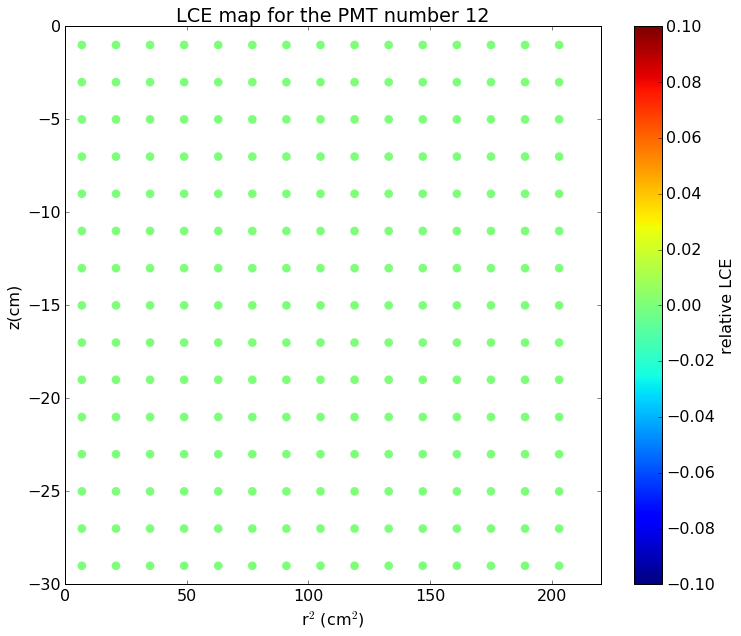

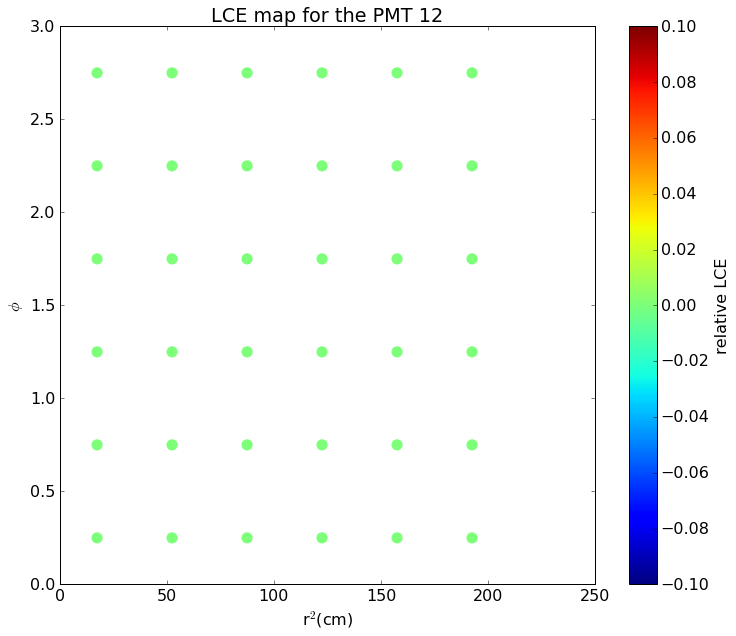

In [46]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_12']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result12=ri,zi,s1_mean_values

plt.scatter(result12[0],result12[1], c=result12[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 12')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_12']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi12=ri,phii,s1_mean_values

plt.scatter(resultphi12[0],resultphi12[1], c=resultphi12[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 12')
plt.show()

# PMT 13

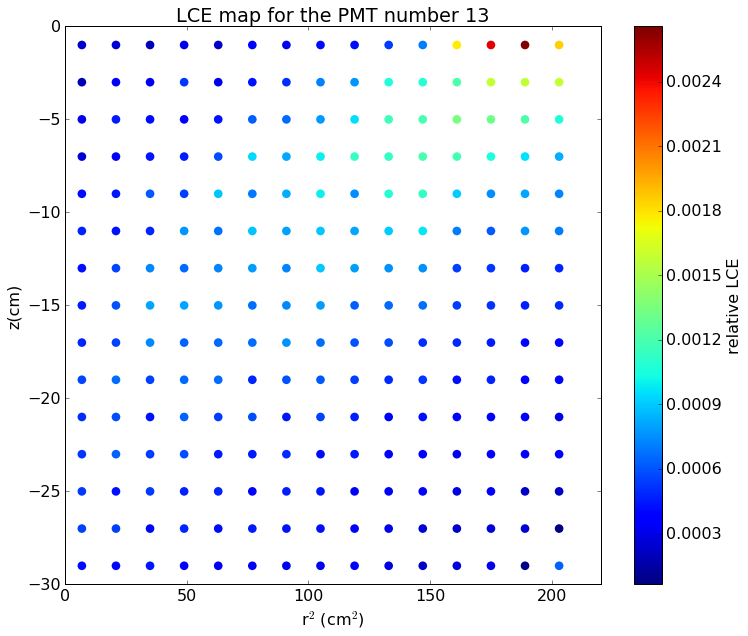

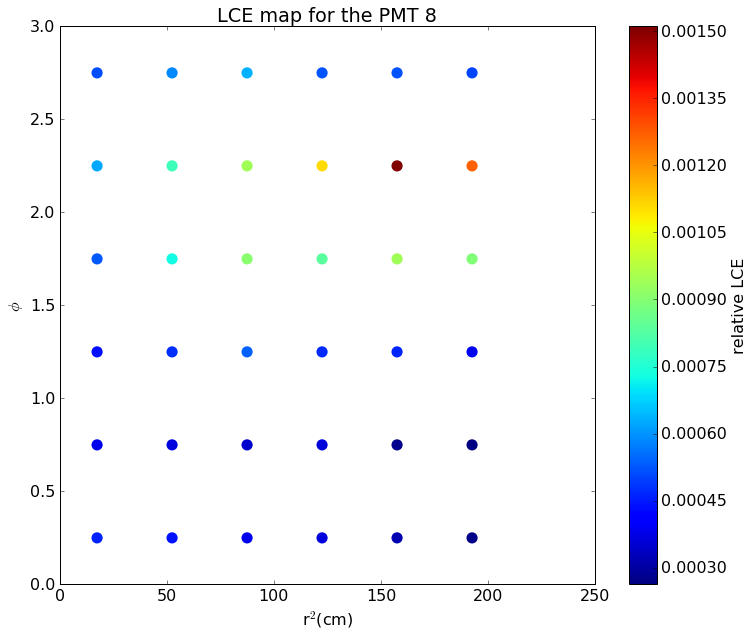

In [47]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_13']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result13=ri,zi,s1_mean_values

plt.scatter(result13[0],result13[1], c=result13[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 13')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_13']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi13=ri,phii,s1_mean_values

plt.scatter(resultphi13[0],resultphi13[1], c=resultphi13[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 8')
plt.show()

# PMT 14

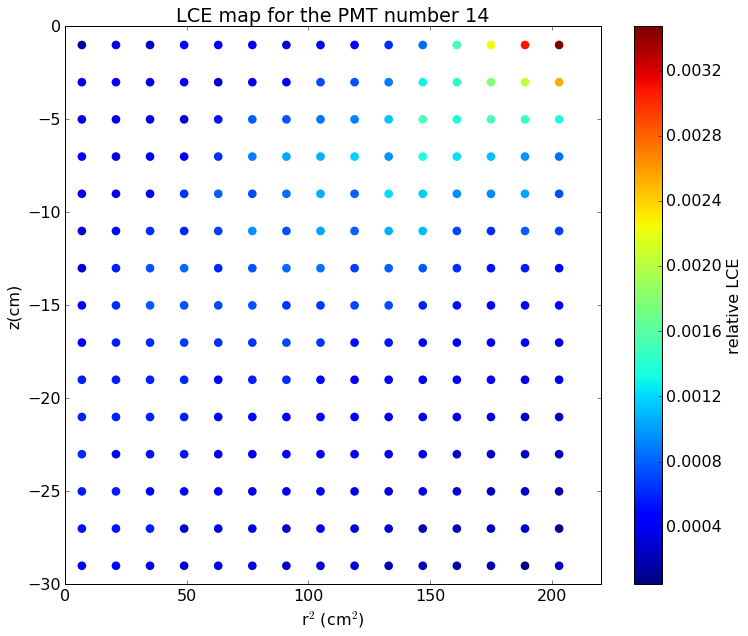

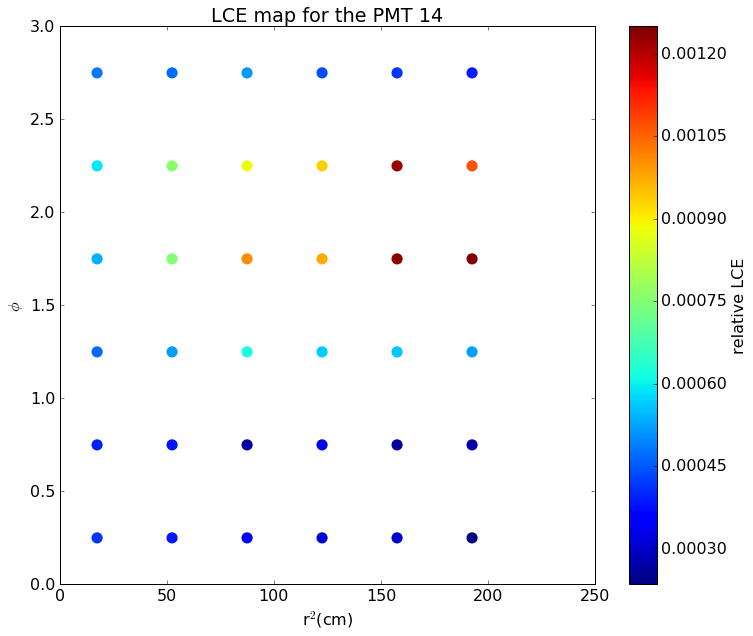

In [49]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_14']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result14=ri,zi,s1_mean_values

plt.scatter(result14[0],result14[1], c=result14[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 14')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_14']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi14=ri,phii,s1_mean_values

plt.scatter(resultphi14[0],resultphi14[1], c=resultphi14[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 14')
plt.show()

# PMT 15

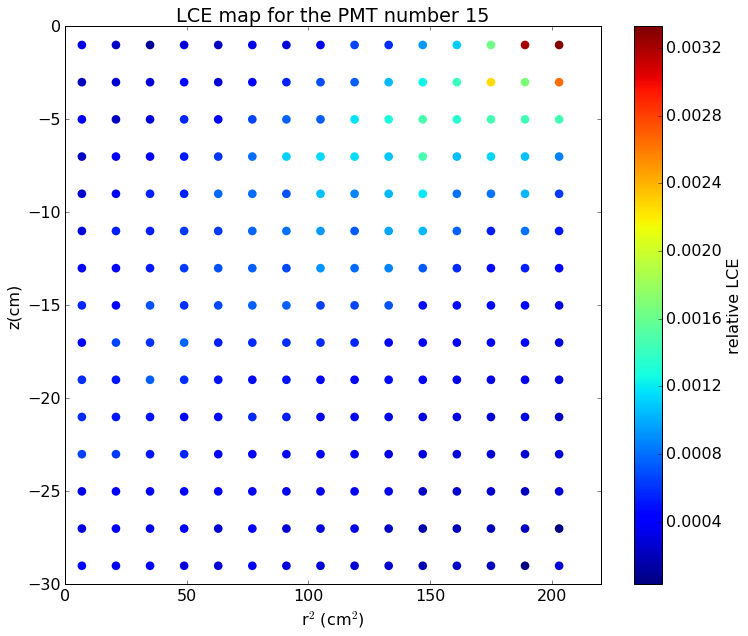

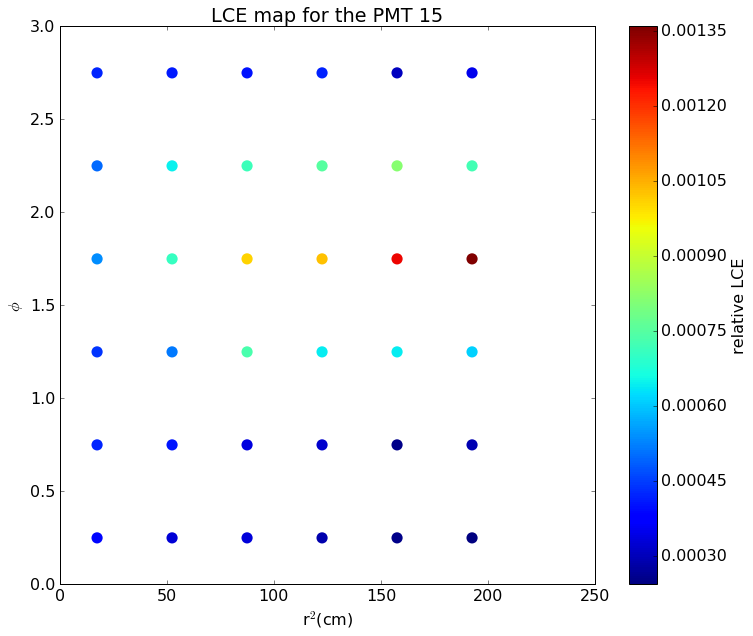

In [50]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_15']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result15=ri,zi,s1_mean_values

plt.scatter(result15[0],result15[1], c=result15[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 15')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_15']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi15=ri,phii,s1_mean_values

plt.scatter(resultphi15[0],resultphi15[1], c=resultphi15[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 15')
plt.show()

# PMT 16

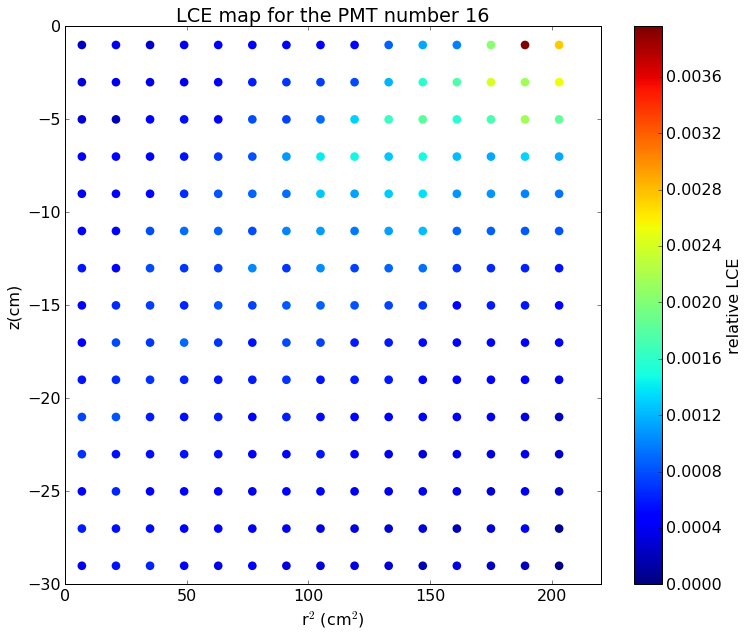

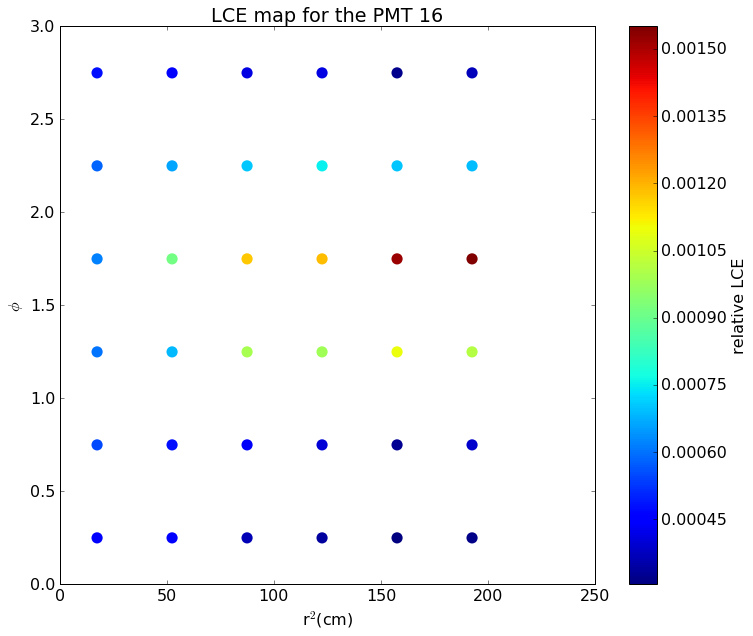

In [51]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_16']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result16=ri,zi,s1_mean_values

plt.scatter(result16[0],result16[1], c=result16[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 16')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_16']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi16=ri,phii,s1_mean_values

plt.scatter(resultphi16[0],resultphi16[1], c=resultphi16[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 16')
plt.show()

# PMT 17

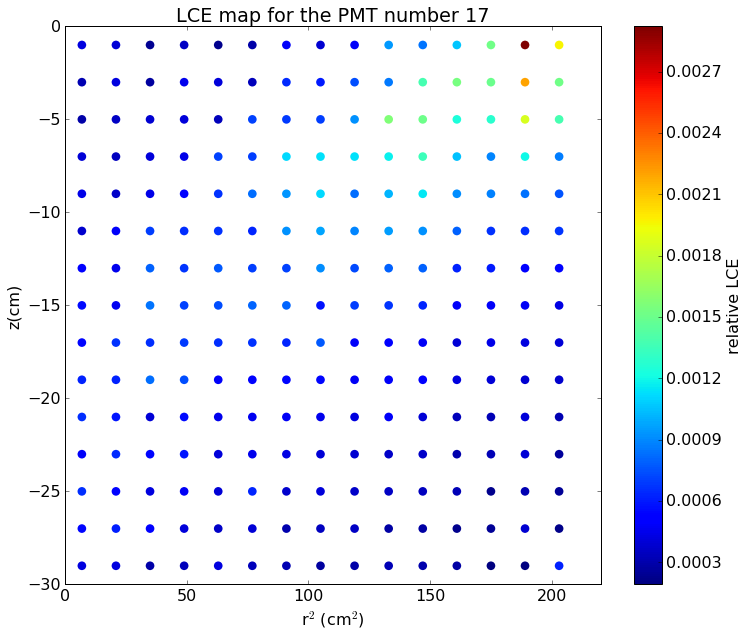

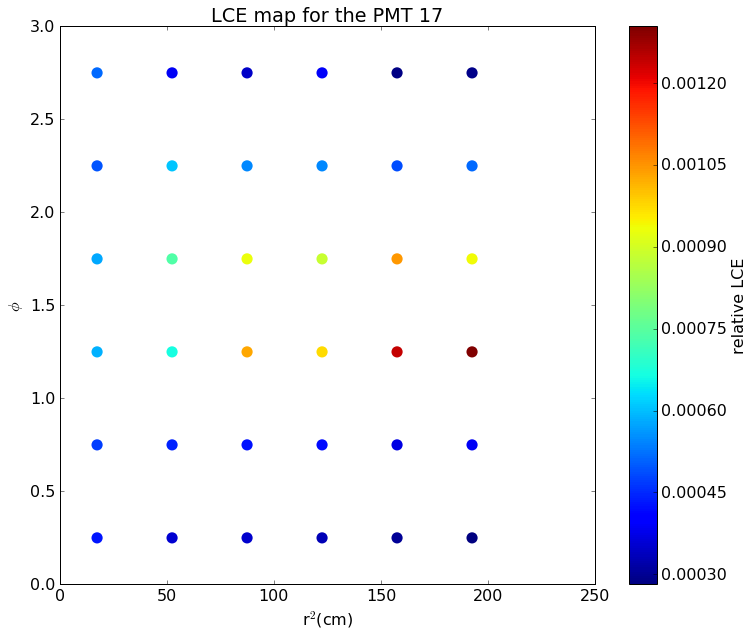

In [52]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_17']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result17=ri,zi,s1_mean_values

plt.scatter(result17[0],result17[1], c=result17[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 17')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_17']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi17=ri,phii,s1_mean_values

plt.scatter(resultphi17[0],resultphi17[1], c=resultphi17[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 17')
plt.show()

# PMT 18

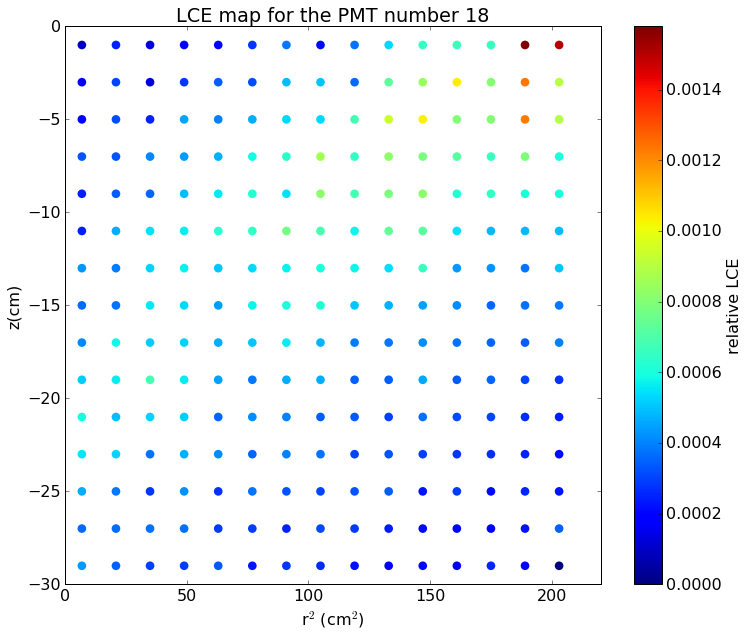

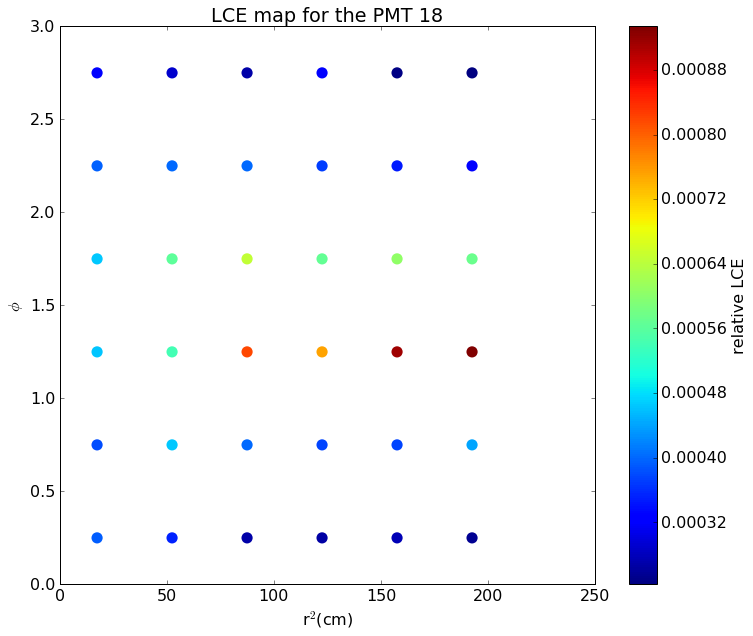

In [53]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_18']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result18=ri,zi,s1_mean_values

plt.scatter(result18[0],result18[1], c=result18[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 18')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_18']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi18=ri,phii,s1_mean_values

plt.scatter(resultphi18[0],resultphi18[1], c=resultphi18[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 18')
plt.show()

# PMT 19 

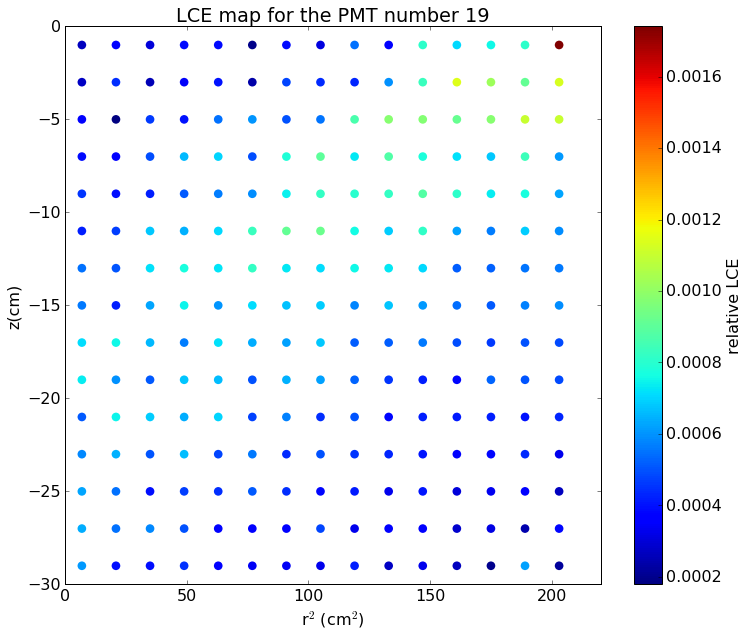

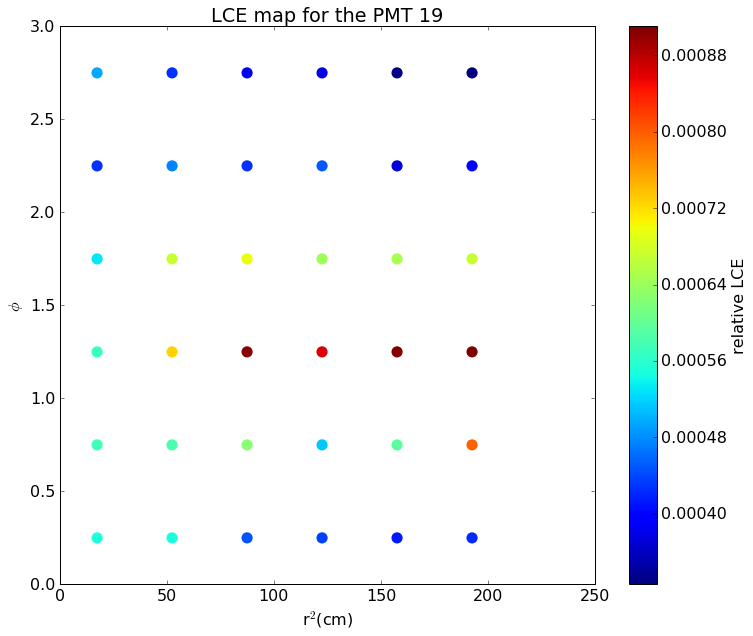

In [54]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_19']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result19=ri,zi,s1_mean_values

plt.scatter(result19[0],result19[1], c=result19[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 19')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_19']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi19=ri,phii,s1_mean_values

plt.scatter(resultphi19[0],resultphi19[1], c=resultphi19[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 19')
plt.show()

# PMT 20

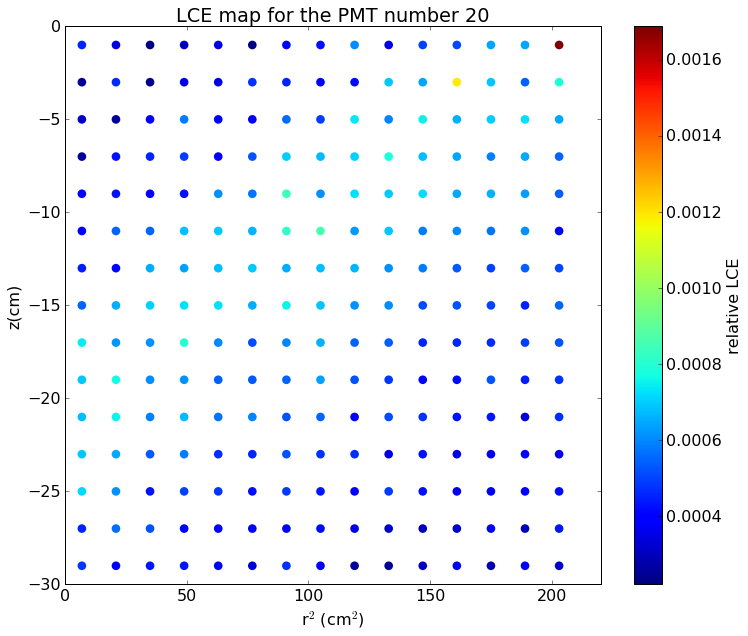

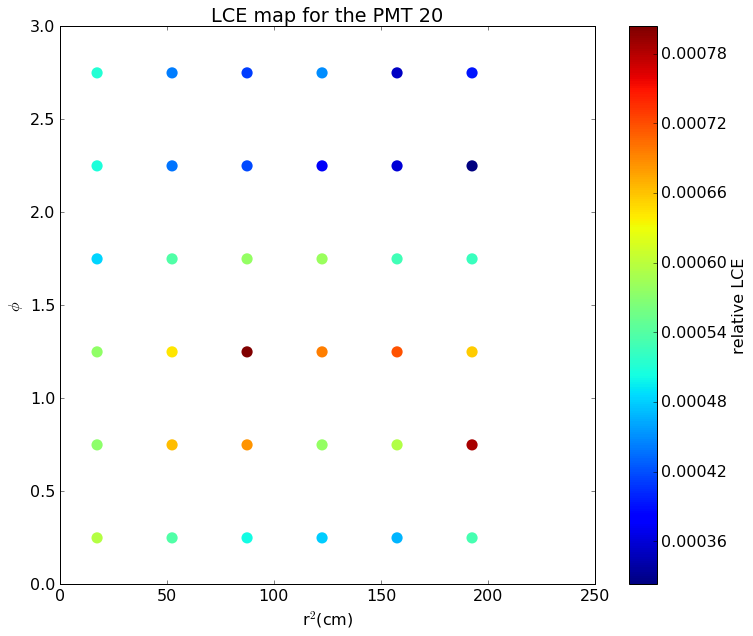

In [55]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_20']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result20=ri,zi,s1_mean_values

plt.scatter(result20[0],result20[1], c=result20[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 20')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_20']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi20=ri,phii,s1_mean_values

plt.scatter(resultphi20[0],resultphi20[1], c=resultphi20[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 20')
plt.show()

# PMT 21

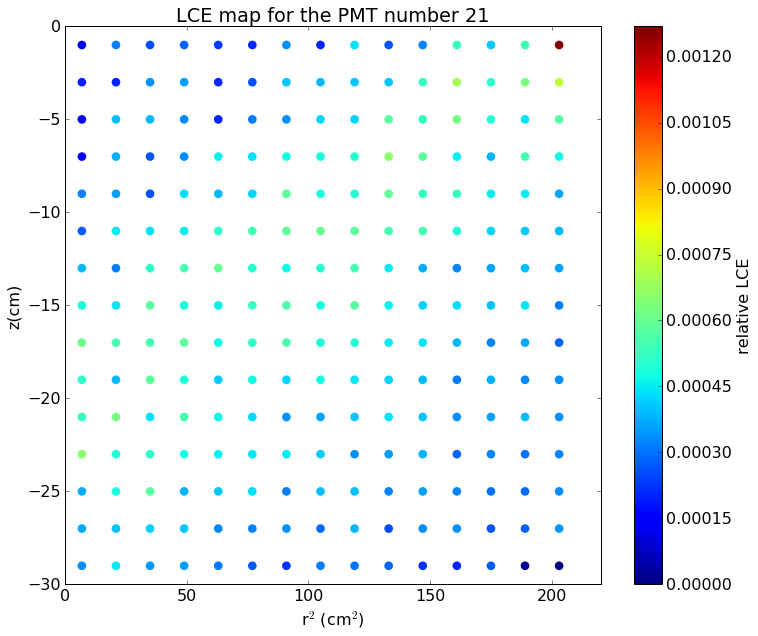

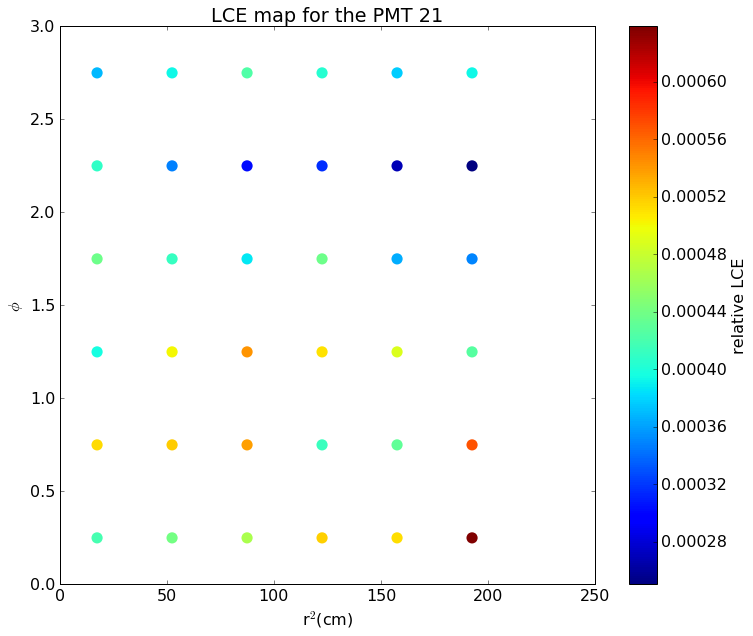

In [57]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_21']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result21=ri,zi,s1_mean_values

plt.scatter(result21[0],result21[1], c=result21[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 21')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_21']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi21=ri,phii,s1_mean_values

plt.scatter(resultphi21[0],resultphi21[1], c=resultphi21[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 21')
plt.show()

# PMT 22

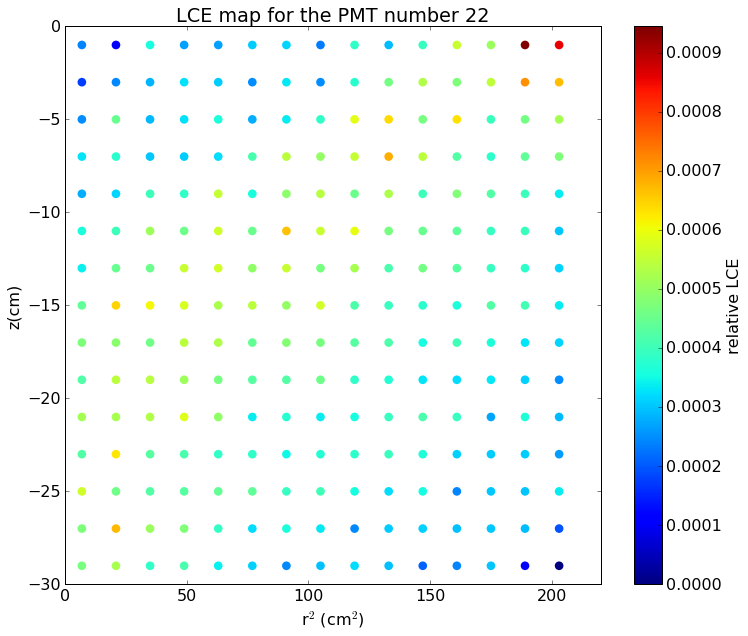

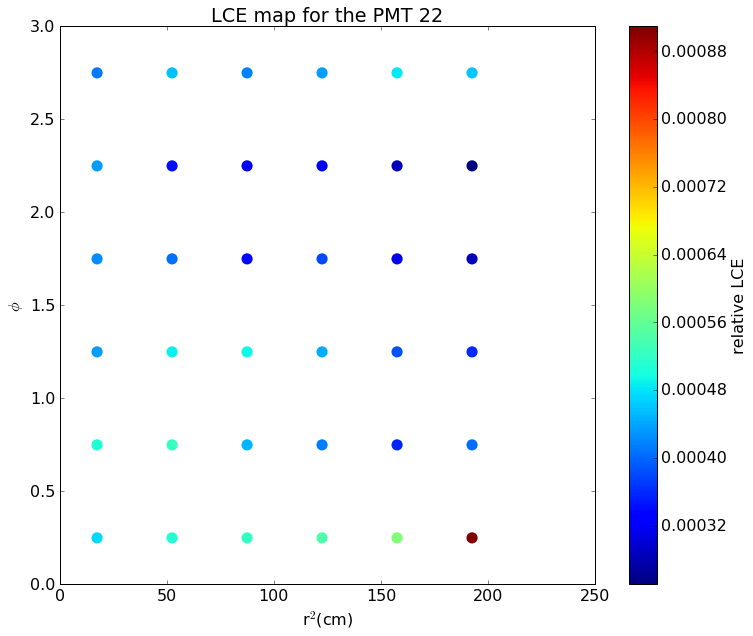

In [35]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_22']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result22=ri,zi,s1_mean_values

plt.scatter(result22[0],result22[1], c=result22[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 22')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_22']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi22=ri,phii,s1_mean_values

plt.scatter(resultphi22[0],resultphi22[1], c=resultphi22[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 22')
plt.show()

# PMT 23

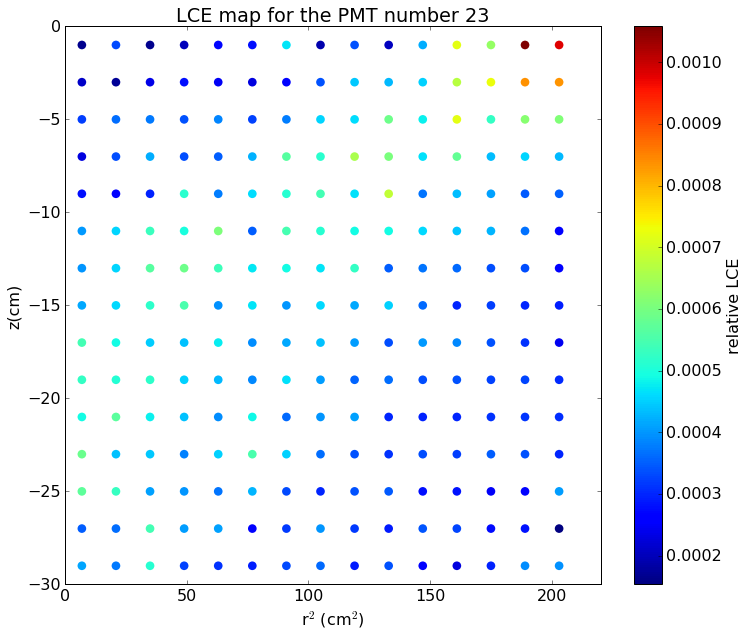

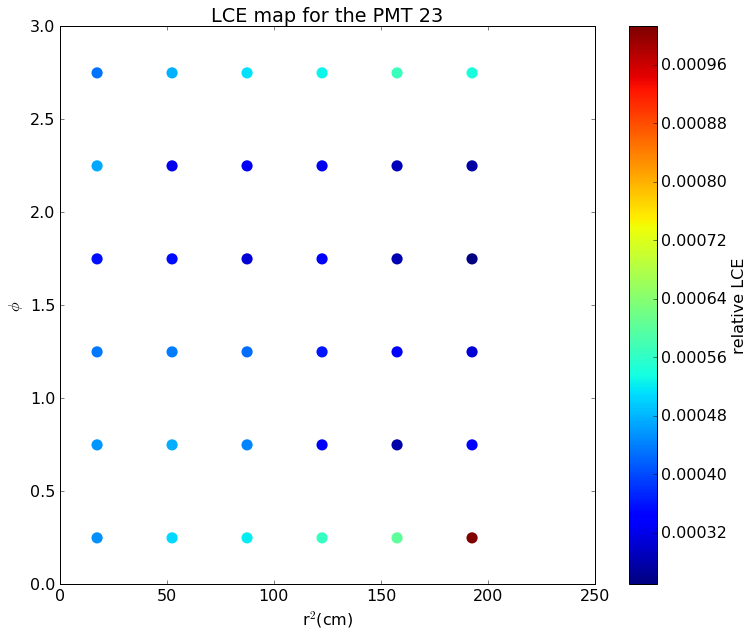

In [60]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_23']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result23=ri,zi,s1_mean_values

plt.scatter(result23[0],result23[1], c=result23[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 23')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_23']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi23=ri,phii,s1_mean_values

plt.scatter(resultphi23[0],resultphi23[1], c=resultphi23[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 23')
plt.show()

# PMT 24

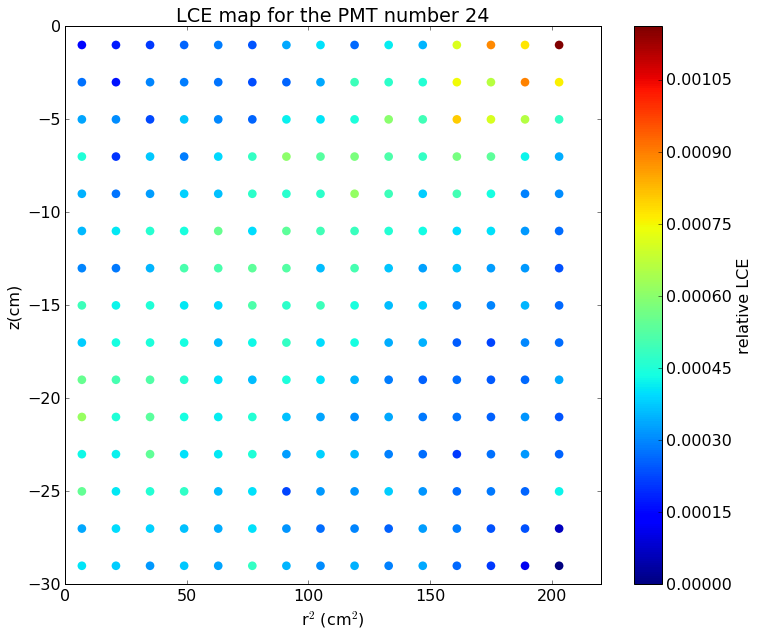

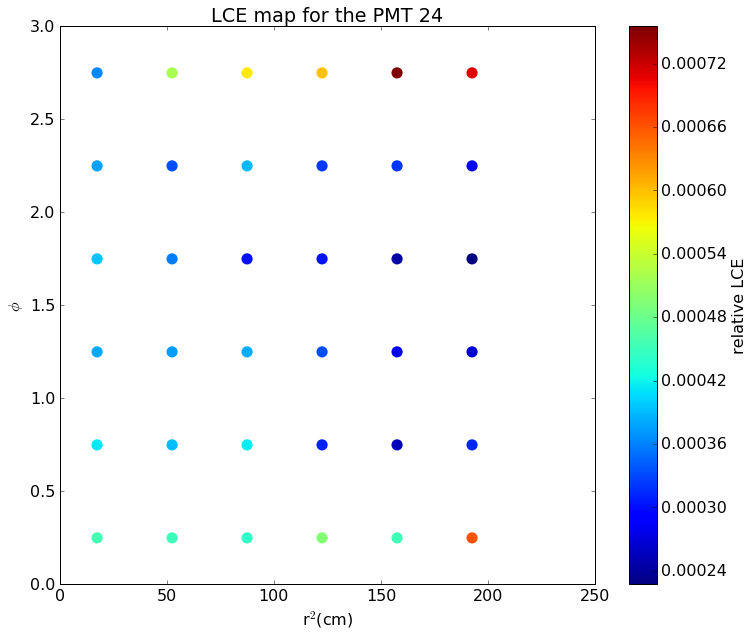

In [61]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_24']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result24=ri,zi,s1_mean_values

plt.scatter(result24[0],result24[1], c=result24[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 24')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_24']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi24=ri,phii,s1_mean_values

plt.scatter(resultphi24[0],resultphi24[1], c=resultphi24[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 24')
plt.show()

# PMT 25

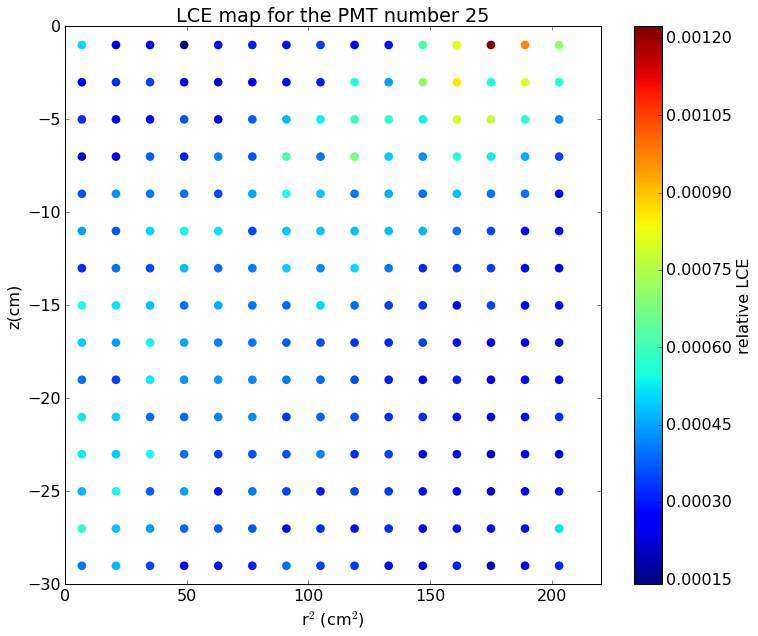

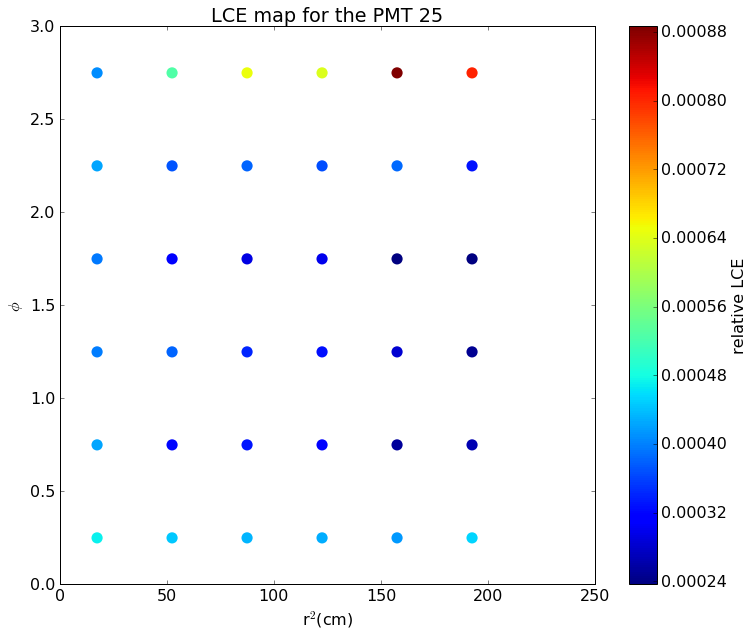

In [62]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_25']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result25=ri,zi,s1_mean_values

plt.scatter(result25[0],result25[1], c=result25[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 25')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_25']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi25=ri,phii,s1_mean_values

plt.scatter(resultphi25[0],resultphi25[1], c=resultphi25[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 25')
plt.show()

# PMT 26

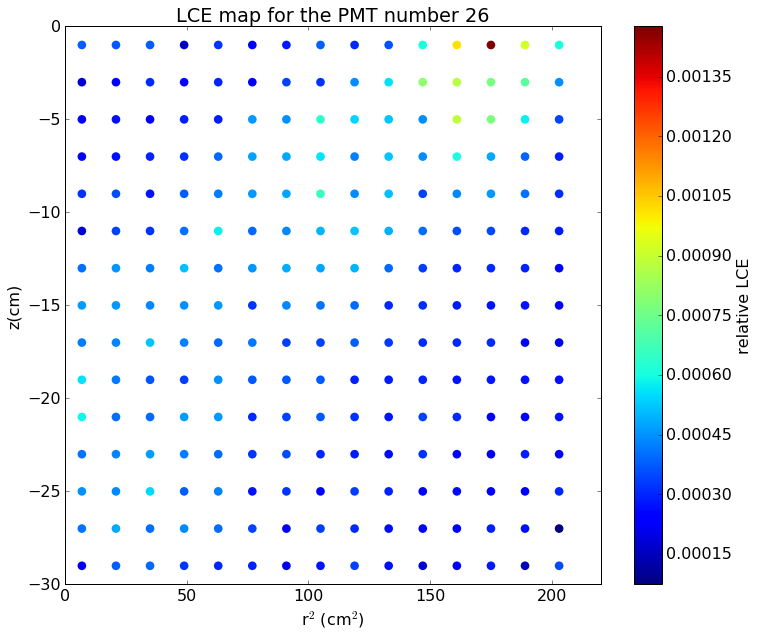

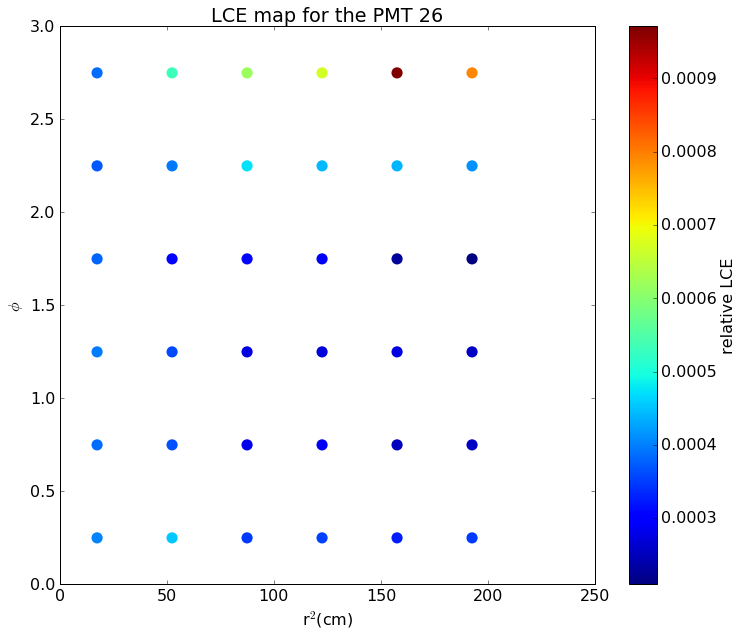

In [64]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_26']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result26=ri,zi,s1_mean_values

plt.scatter(result26[0],result26[1], c=result26[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 26')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_26']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi26=ri,phii,s1_mean_values

plt.scatter(resultphi26[0],resultphi26[1], c=resultphi26[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 26')
plt.show()

# PMT 27

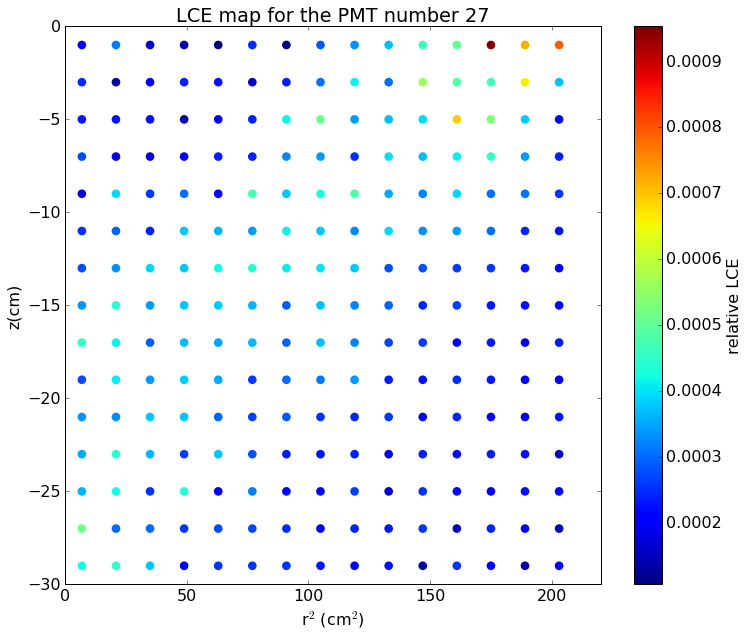

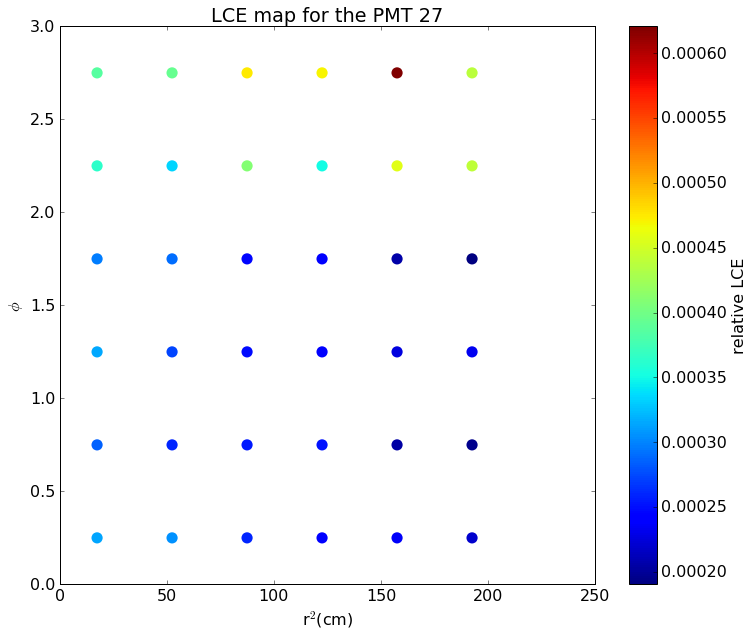

In [65]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_27']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result27=ri,zi,s1_mean_values

plt.scatter(result27[0],result27[1], c=result27[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 27')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_27']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi27=ri,phii,s1_mean_values

plt.scatter(resultphi27[0],resultphi27[1], c=resultphi27[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 27')
plt.show()

# PMT 28

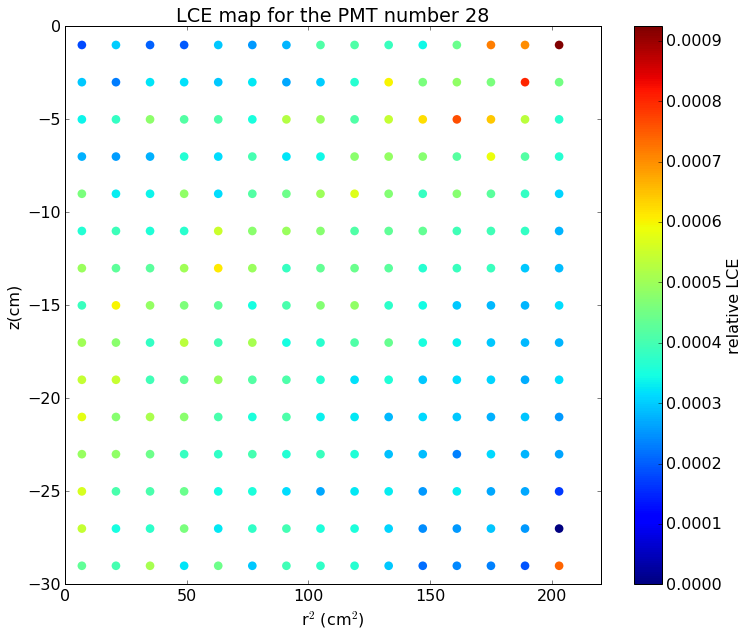

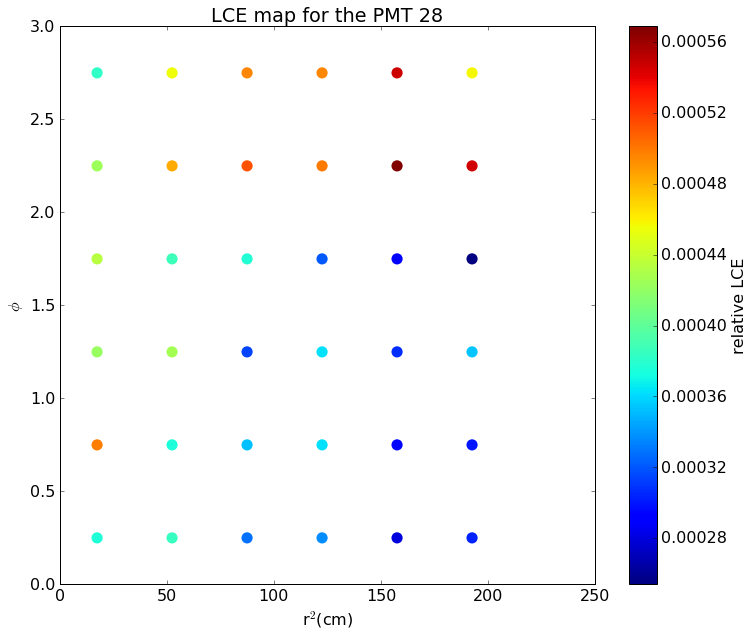

In [34]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_28']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result28=ri,zi,s1_mean_values

plt.scatter(result28[0],result28[1], c=result28[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 28')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_28']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi28=ri,phii,s1_mean_values

plt.scatter(resultphi28[0],resultphi28[1], c=resultphi28[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 28')
plt.show()

# PMT 29

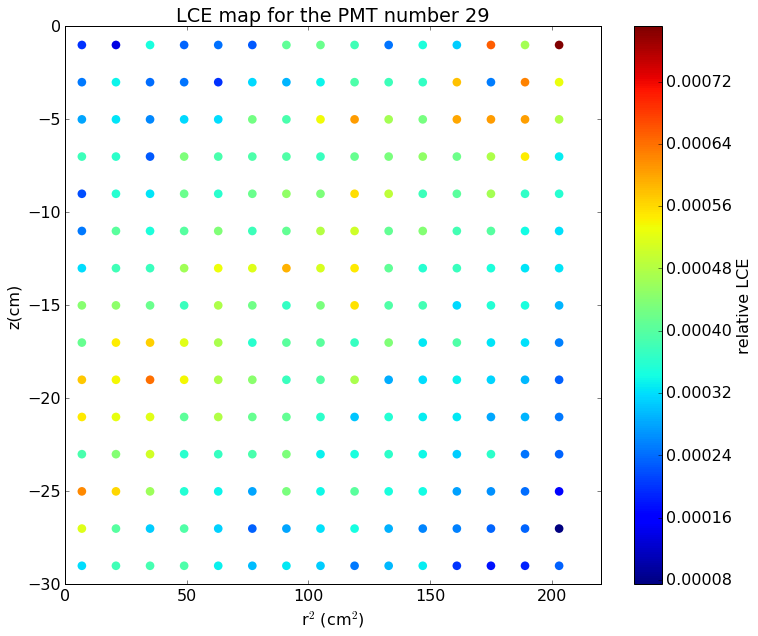

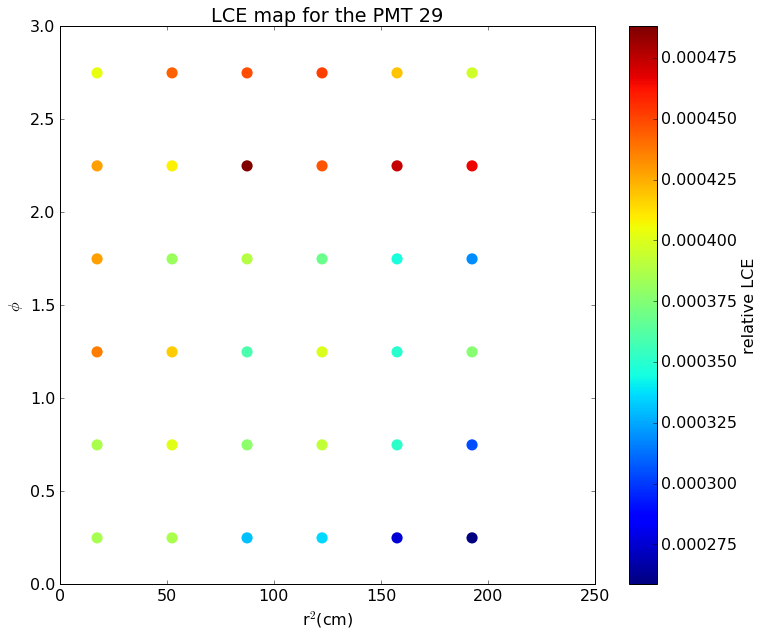

In [67]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_29']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result29=ri,zi,s1_mean_values

plt.scatter(result29[0],result29[1], c=result29[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 29')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_29']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi29=ri,phii,s1_mean_values

plt.scatter(resultphi29[0],resultphi29[1], c=resultphi29[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 29')
plt.show()

# PMT 30

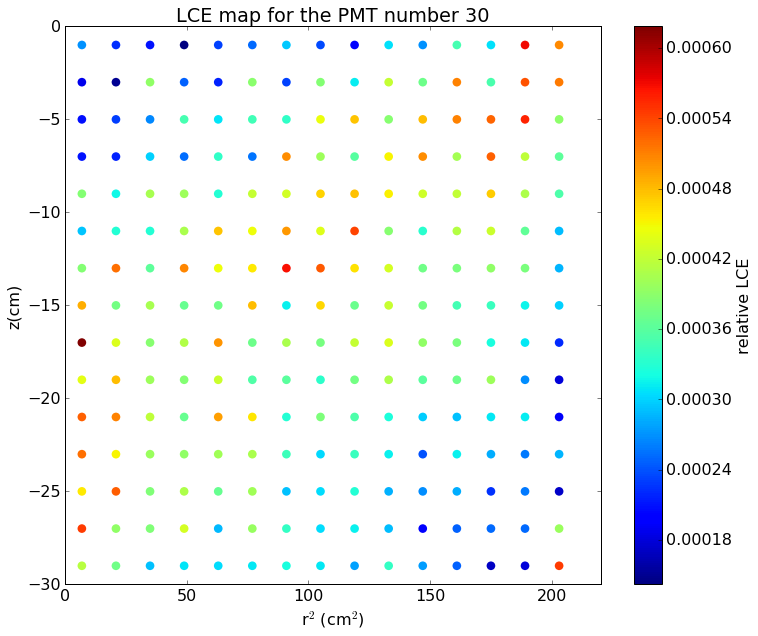

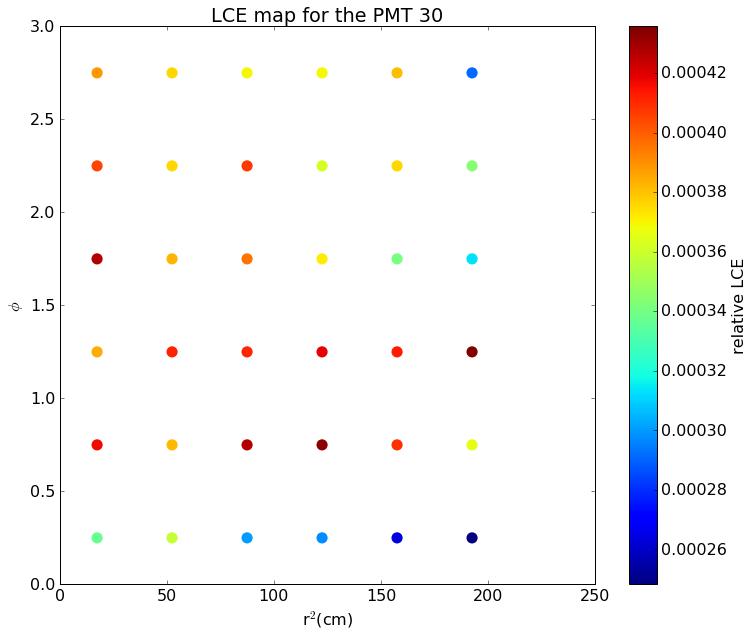

In [68]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_30']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result30=ri,zi,s1_mean_values

plt.scatter(result30[0],result30[1], c=result30[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 30')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_30']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi30=ri,phii,s1_mean_values

plt.scatter(resultphi30[0],resultphi30[1], c=resultphi30[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 30')
plt.show()

# PMT 31

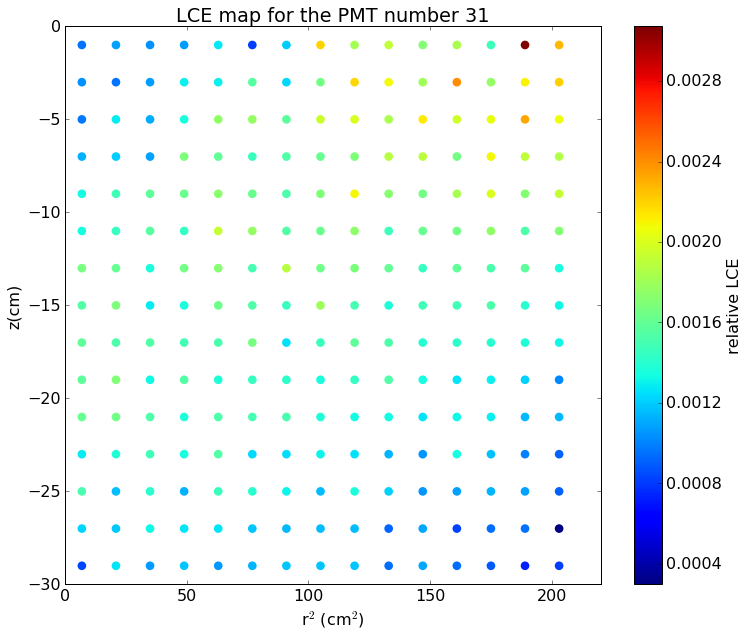

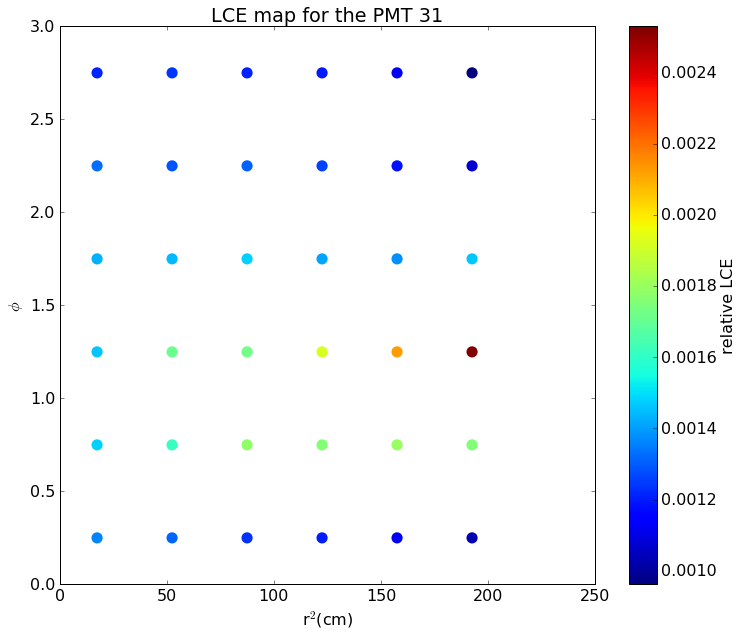

In [69]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_31']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result31=ri,zi,s1_mean_values

plt.scatter(result31[0],result31[1], c=result31[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 31')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_31']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi31=ri,phii,s1_mean_values

plt.scatter(resultphi31[0],resultphi31[1], c=resultphi31[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 31')
plt.show()

# PMT 32

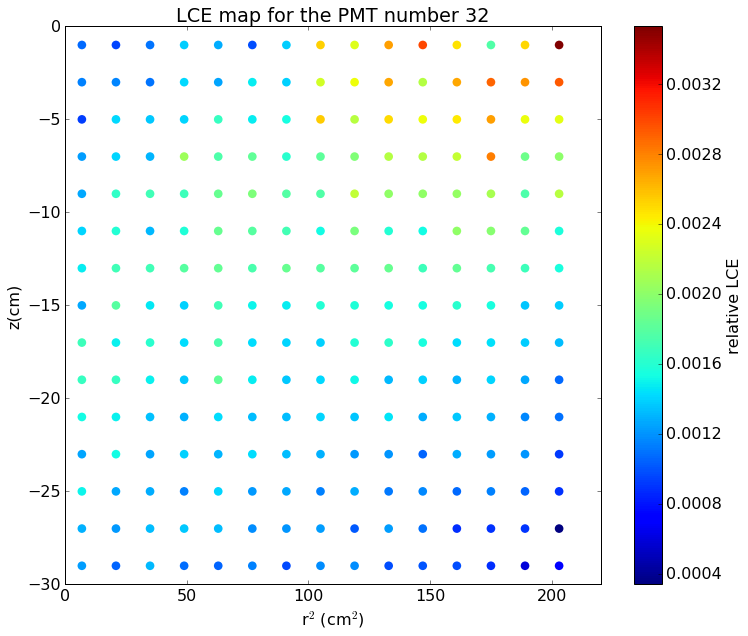

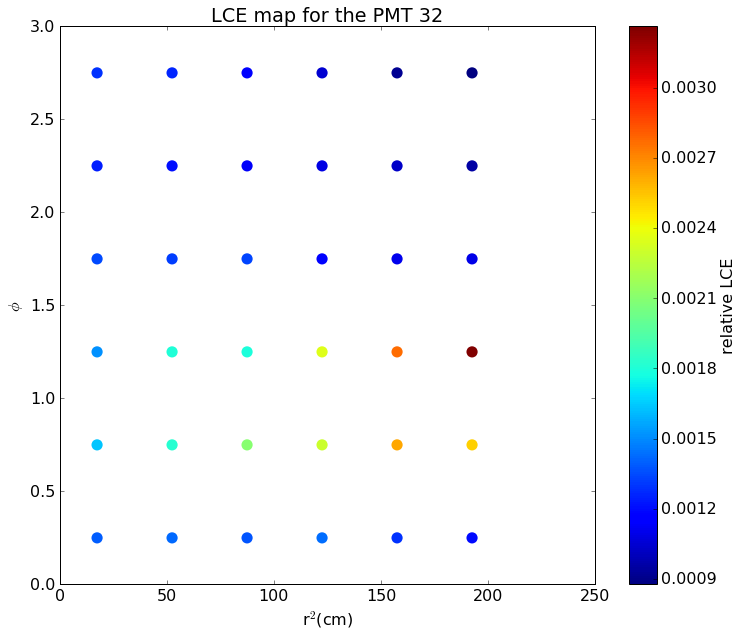

In [70]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_32']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result32=ri,zi,s1_mean_values

plt.scatter(result32[0],result32[1], c=result32[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 32')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_32']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi32=ri,phii,s1_mean_values

plt.scatter(resultphi32[0],resultphi32[1], c=resultphi32[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 32')
plt.show()

# PMT 33

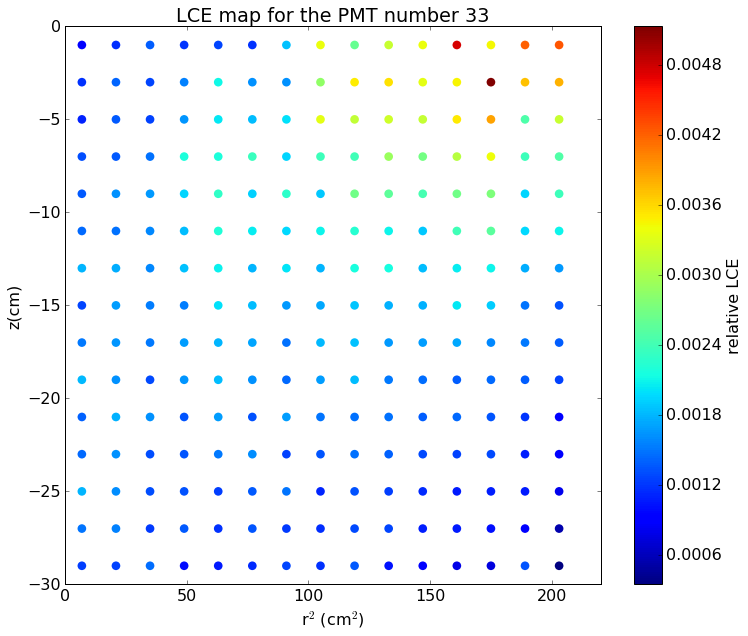

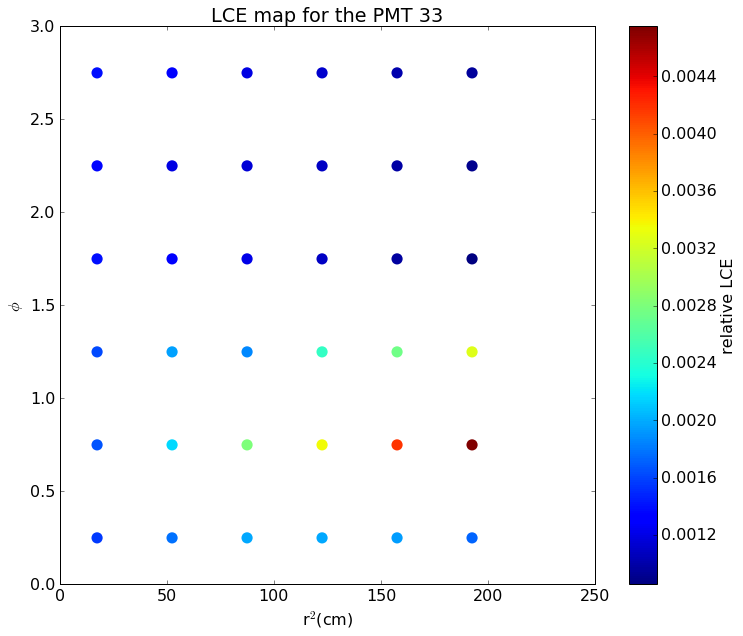

In [71]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_33']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result33=ri,zi,s1_mean_values

plt.scatter(result33[0],result33[1], c=result33[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 33')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_33']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi33=ri,phii,s1_mean_values

plt.scatter(resultphi33[0],resultphi33[1], c=resultphi33[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 33')
plt.show()

# PMT 34

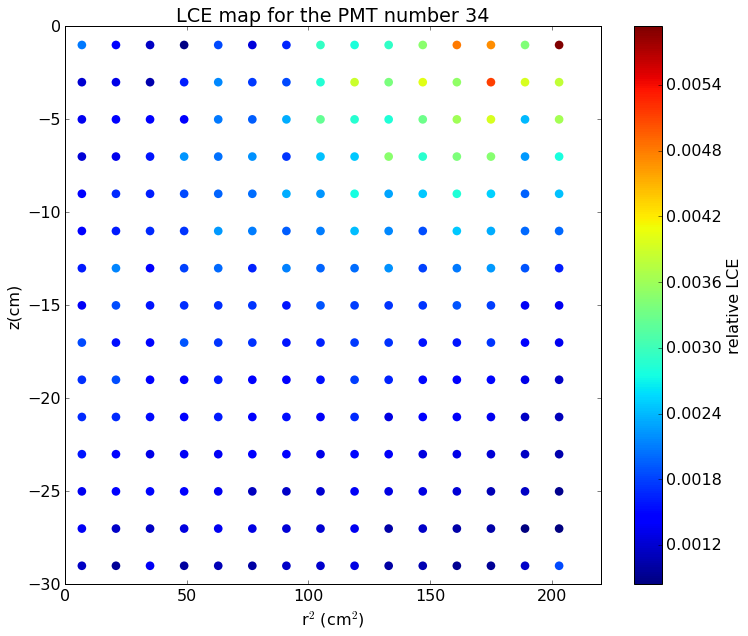

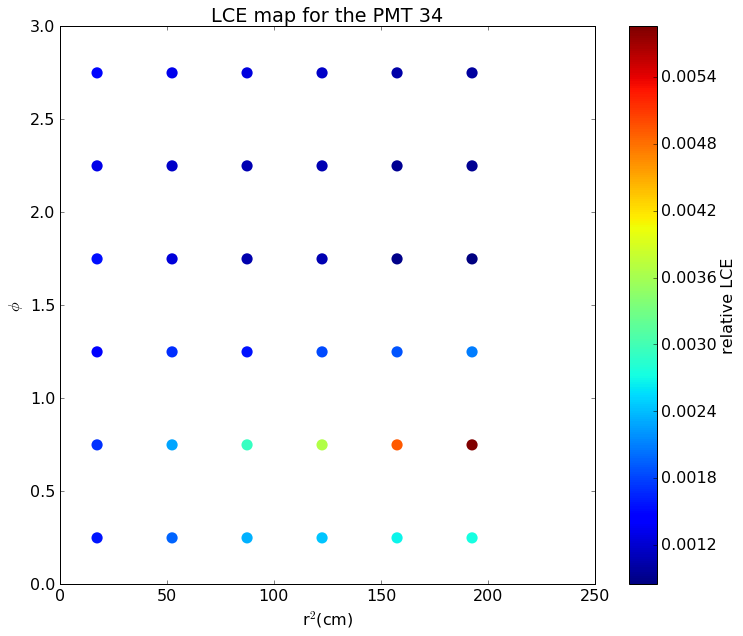

In [72]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_34']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result34=ri,zi,s1_mean_values

plt.scatter(result34[0],result34[1], c=result34[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 34')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_34']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi34=ri,phii,s1_mean_values

plt.scatter(resultphi34[0],resultphi34[1], c=resultphi34[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 34')
plt.show()

# PMT 35

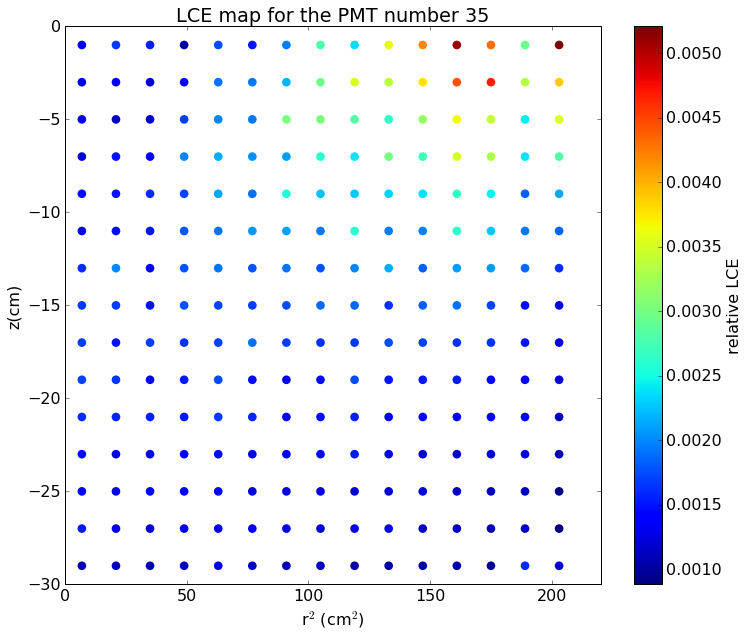

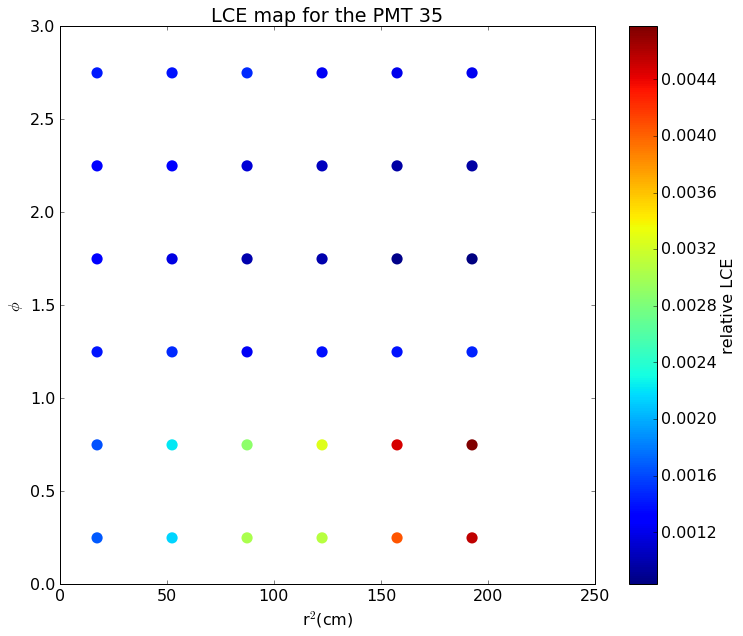

In [73]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_35']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result35=ri,zi,s1_mean_values

plt.scatter(result35[0],result35[1], c=result35[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 35')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_35']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi35=ri,phii,s1_mean_values

plt.scatter(resultphi35[0],resultphi35[1], c=resultphi35[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 35')
plt.show()

# PMT 36

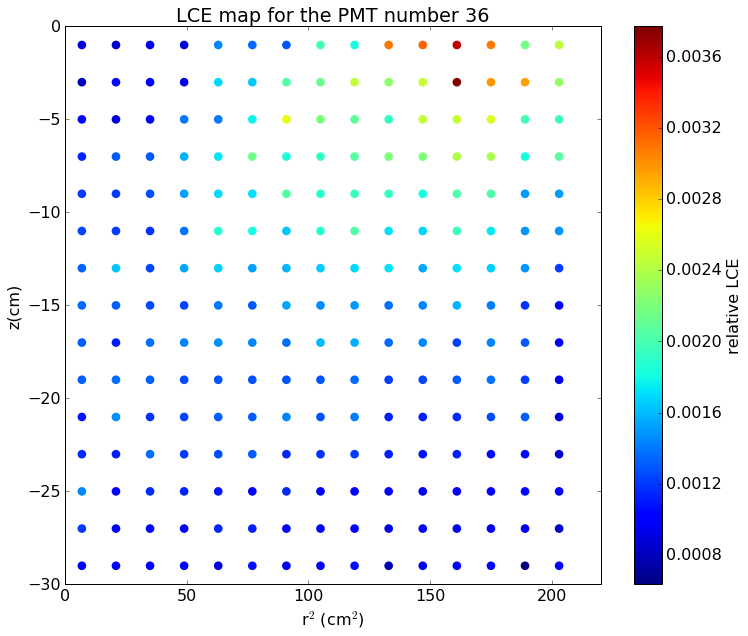

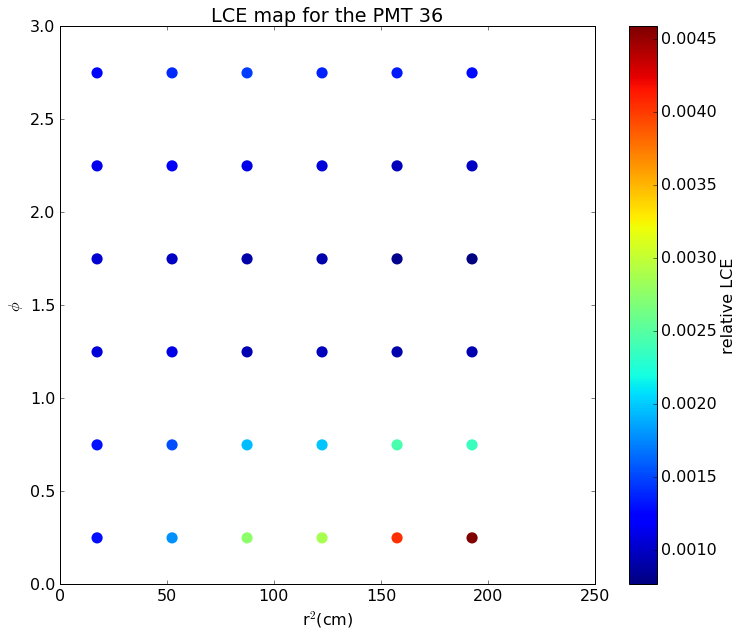

In [74]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_36']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result36=ri,zi,s1_mean_values

plt.scatter(result36[0],result36[1], c=result36[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 36')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_36']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi36=ri,phii,s1_mean_values

plt.scatter(resultphi36[0],resultphi36[1], c=resultphi36[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 36')
plt.show()

# PMT 37

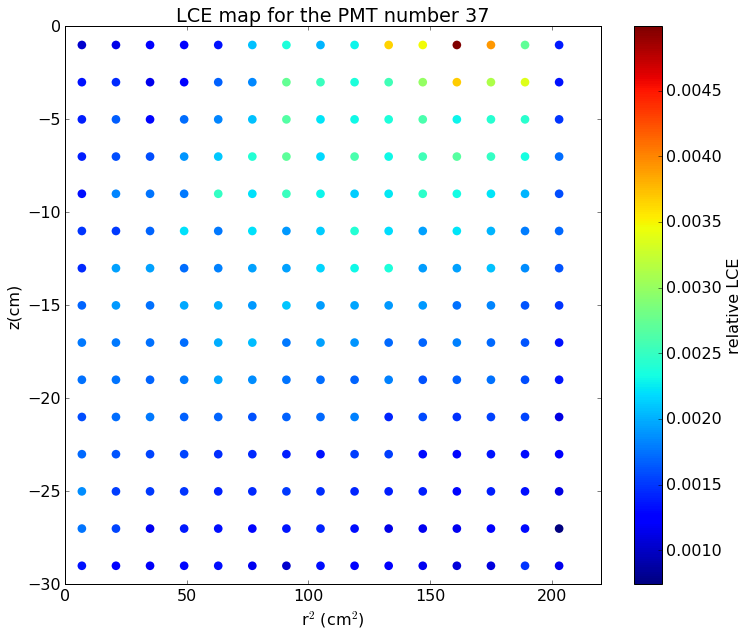

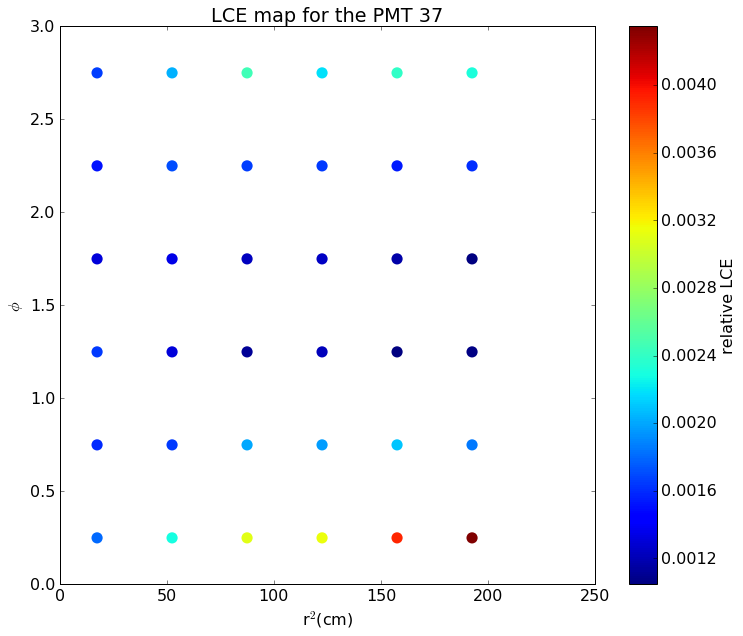

In [75]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_37']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result37=ri,zi,s1_mean_values

plt.scatter(result37[0],result37[1], c=result37[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 37')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_37']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi37=ri,phii,s1_mean_values

plt.scatter(resultphi37[0],resultphi37[1], c=resultphi37[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 37')
plt.show()

# PMT 38

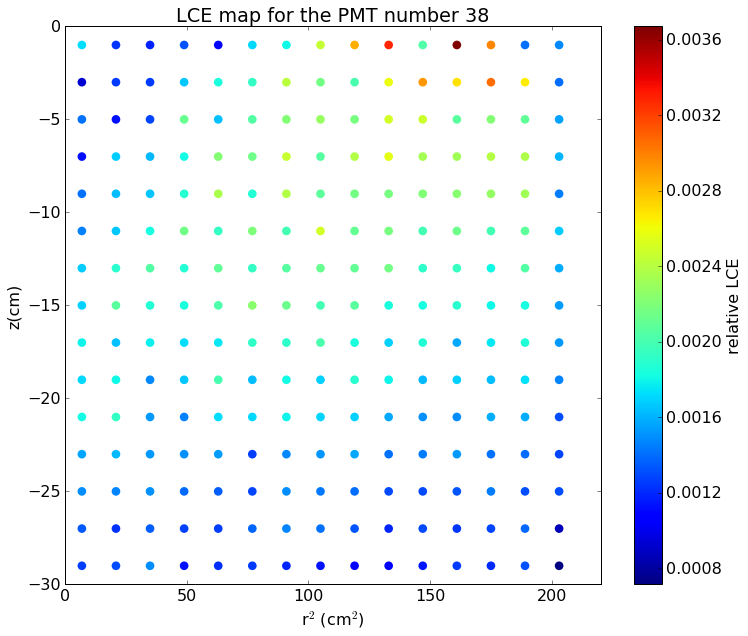

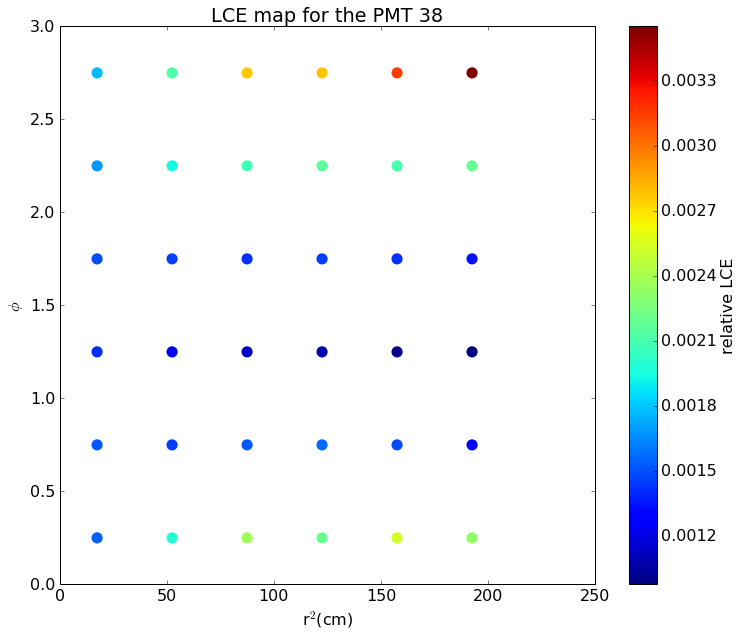

In [76]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_38']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result38=ri,zi,s1_mean_values

plt.scatter(result38[0],result38[1], c=result38[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 38')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_38']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi38=ri,phii,s1_mean_values

plt.scatter(resultphi38[0],resultphi38[1], c=resultphi38[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 38')
plt.show()

# PMT 39

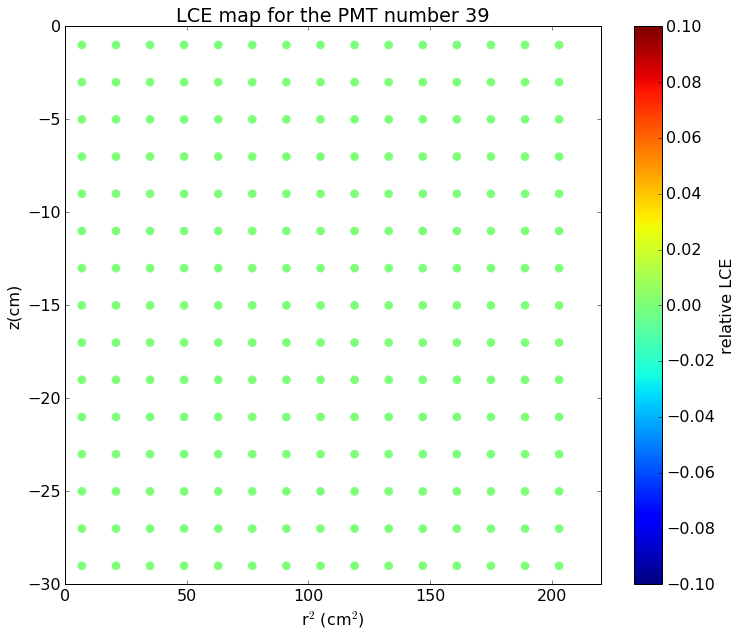

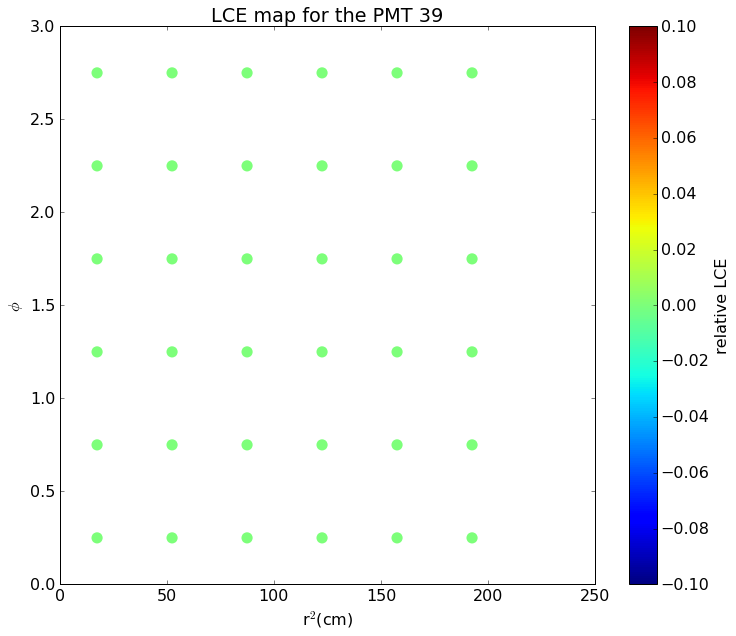

In [77]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_39']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result39=ri,zi,s1_mean_values

plt.scatter(result39[0],result39[1], c=result39[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 39')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_39']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi39=ri,phii,s1_mean_values

plt.scatter(resultphi39[0],resultphi39[1], c=resultphi39[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 39')
plt.show()

# PMT 40

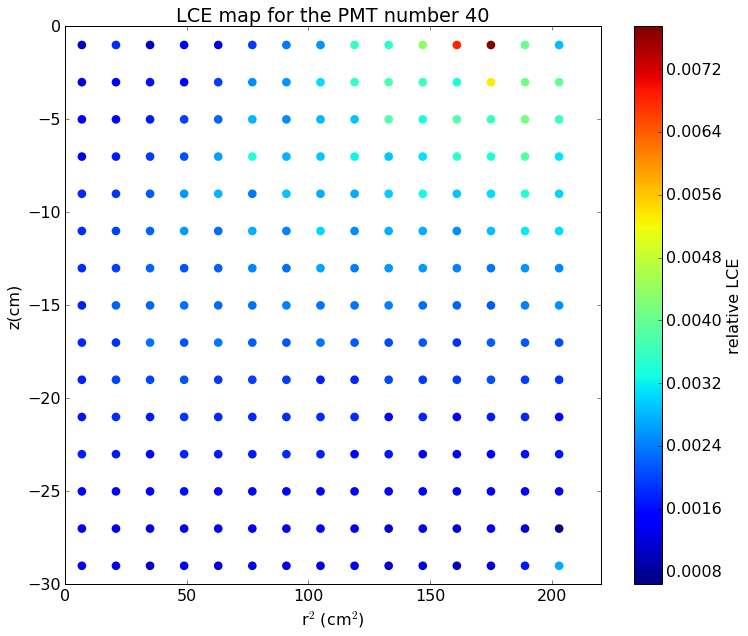

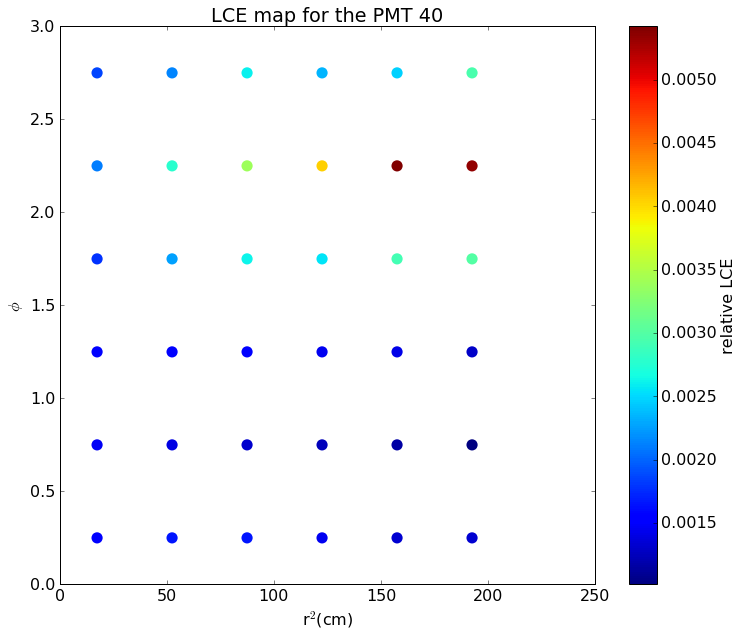

In [78]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_40']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result40=ri,zi,s1_mean_values

plt.scatter(result40[0],result40[1], c=result40[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 40')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_40']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi40=ri,phii,s1_mean_values

plt.scatter(resultphi40[0],resultphi40[1], c=resultphi40[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 40')
plt.show()

# PMT 41

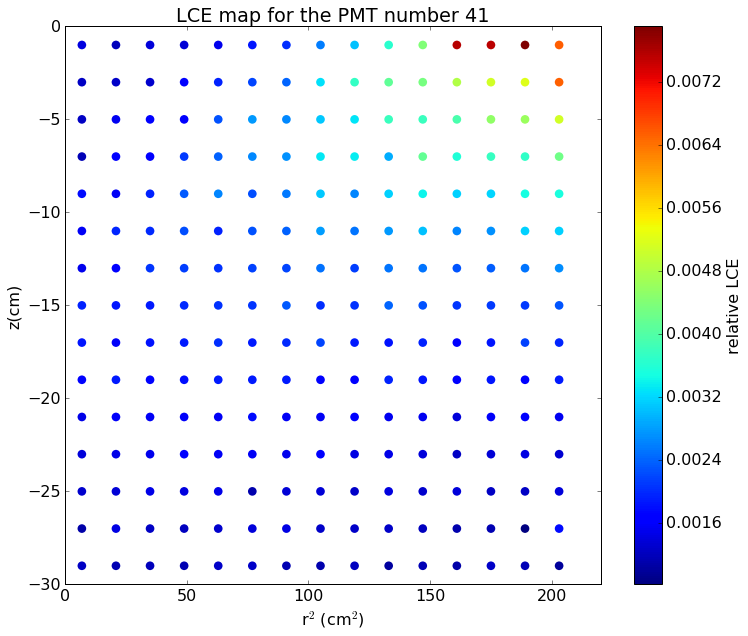

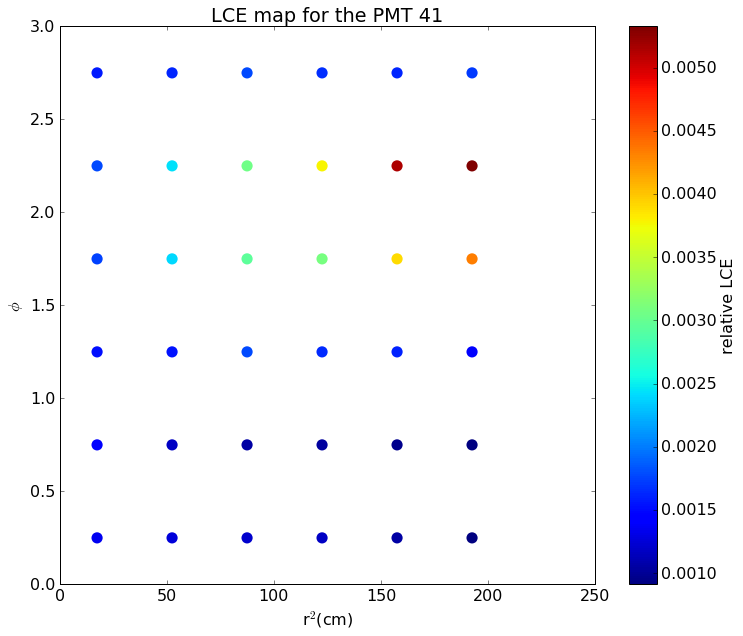

In [79]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_41']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result41=ri,zi,s1_mean_values

plt.scatter(result41[0],result41[1], c=result41[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 41')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_41']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi41=ri,phii,s1_mean_values

plt.scatter(resultphi41[0],resultphi41[1], c=resultphi41[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 41')
plt.show()

# PMT 42

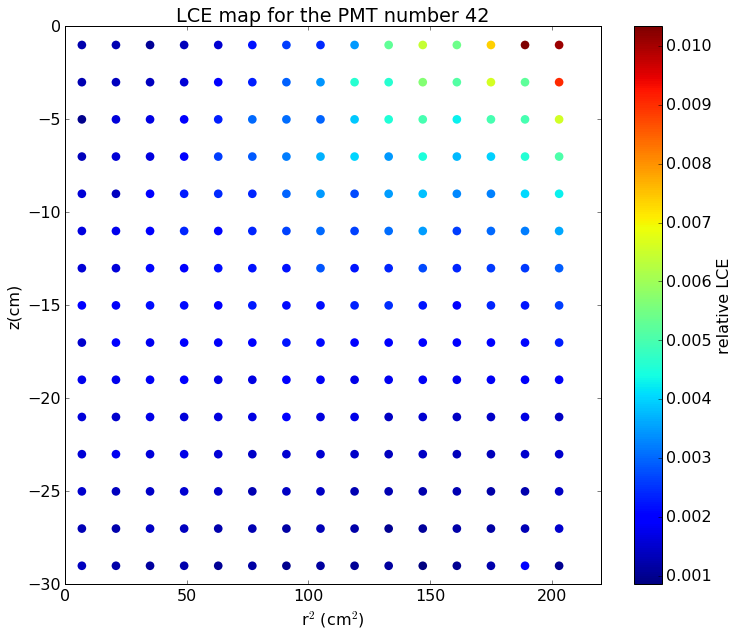

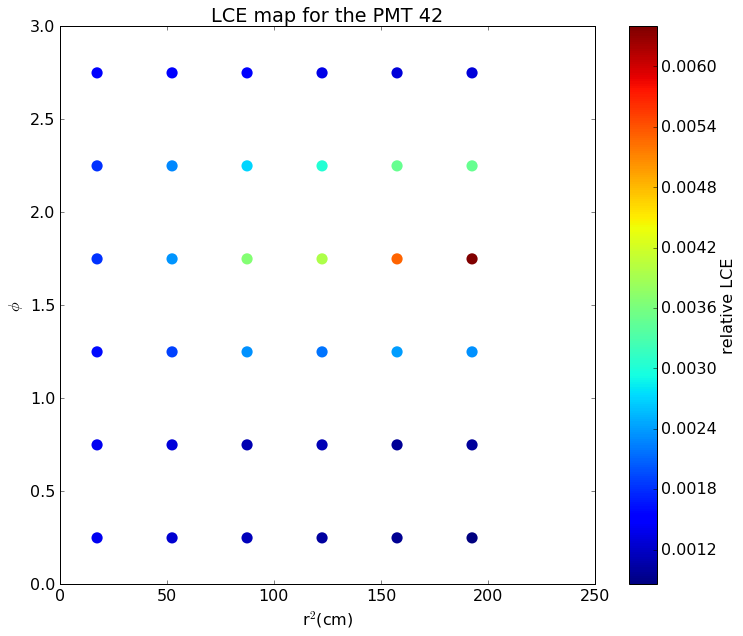

In [80]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_42']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result42=ri,zi,s1_mean_values

plt.scatter(result42[0],result42[1], c=result42[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 42')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_42']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi42=ri,phii,s1_mean_values

plt.scatter(resultphi42[0],resultphi42[1], c=resultphi42[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 42')
plt.show()

# PMT 43

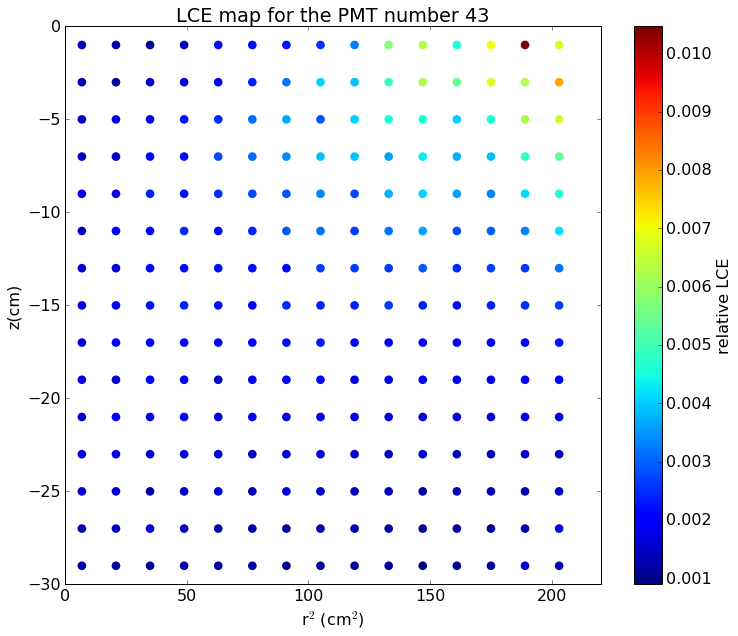

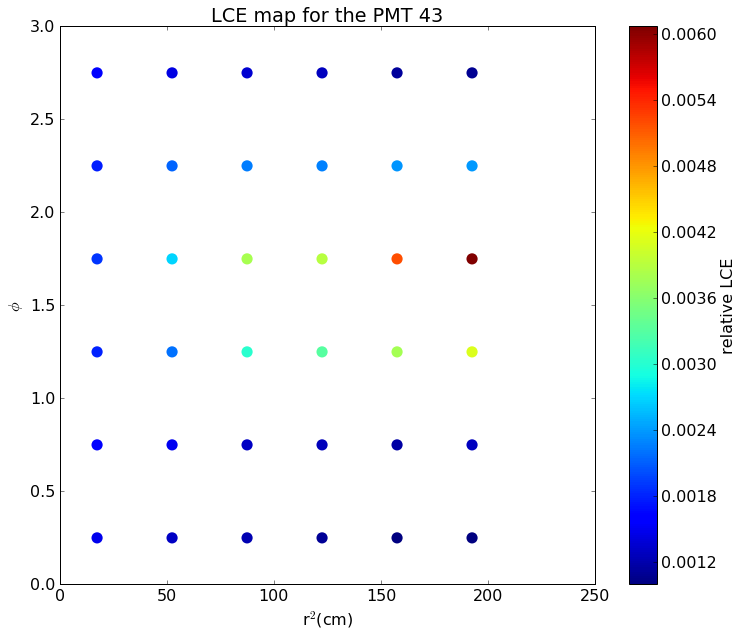

In [81]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_43']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result43=ri,zi,s1_mean_values

plt.scatter(result43[0],result43[1], c=result43[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 43')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_43']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi43=ri,phii,s1_mean_values

plt.scatter(resultphi43[0],resultphi43[1], c=resultphi43[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 43')
plt.show()

# PMT 44

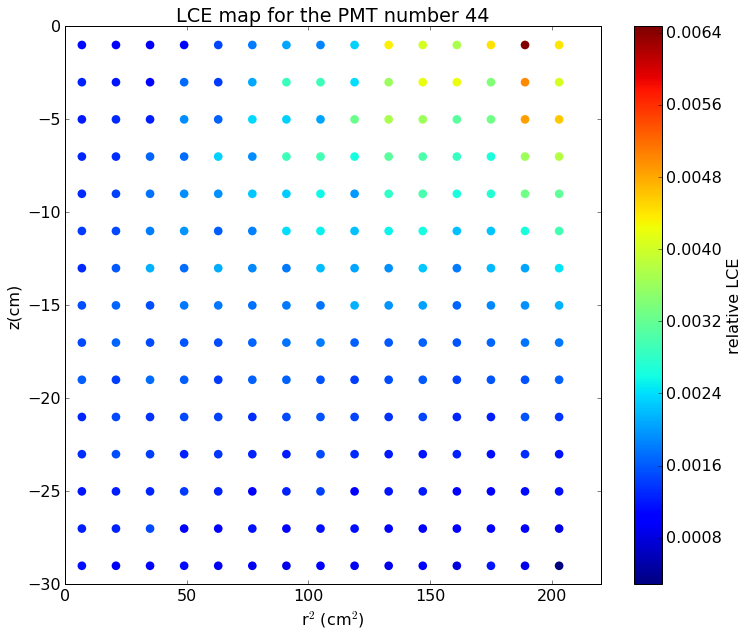

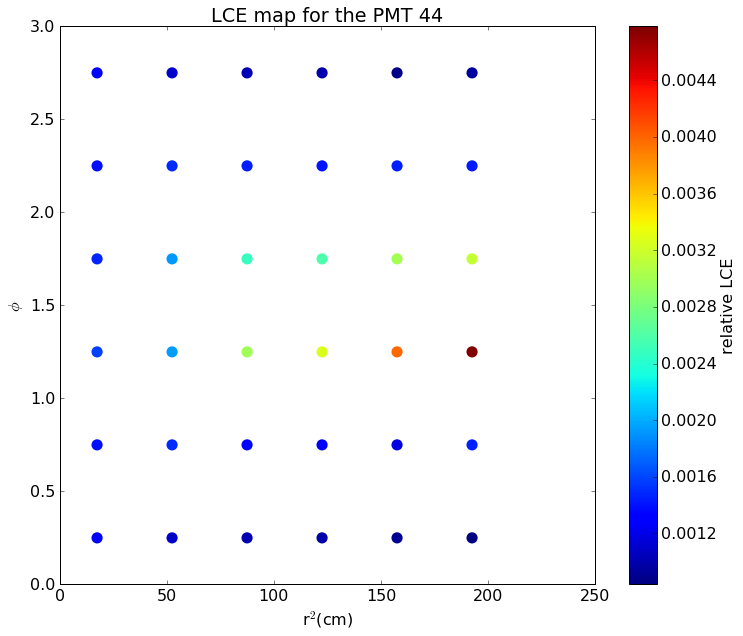

In [83]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_44']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result44=ri,zi,s1_mean_values

plt.scatter(result44[0],result44[1], c=result44[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 44')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_44']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi44=ri,phii,s1_mean_values

plt.scatter(resultphi44[0],resultphi44[1], c=resultphi44[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 44')
plt.show()

# PMT 45

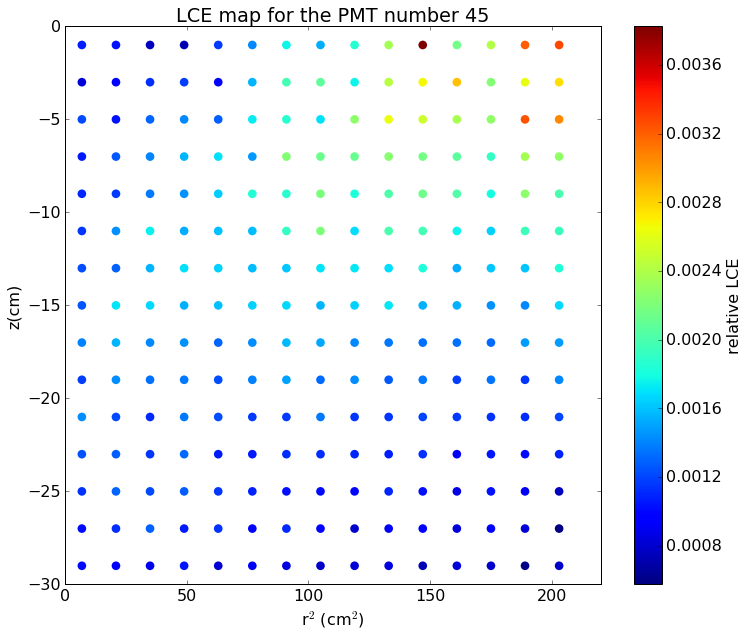

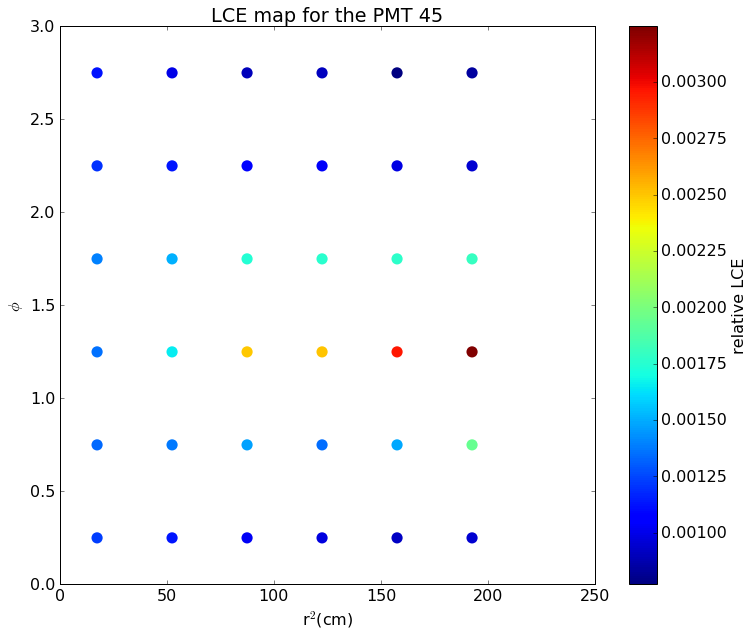

In [84]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_45']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result45=ri,zi,s1_mean_values

plt.scatter(result45[0],result45[1], c=result45[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 45')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_45']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi45=ri,phii,s1_mean_values

plt.scatter(resultphi45[0],resultphi45[1], c=resultphi45[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 45')
plt.show()

# PMT 46

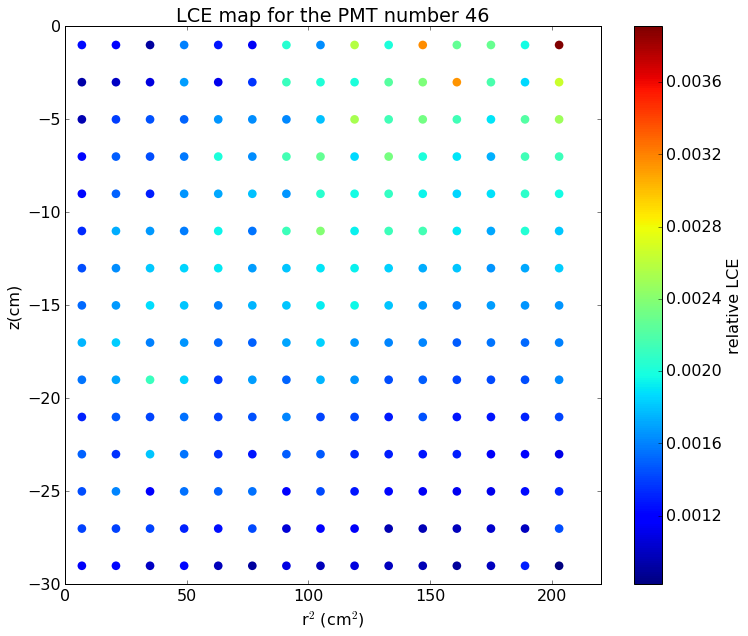

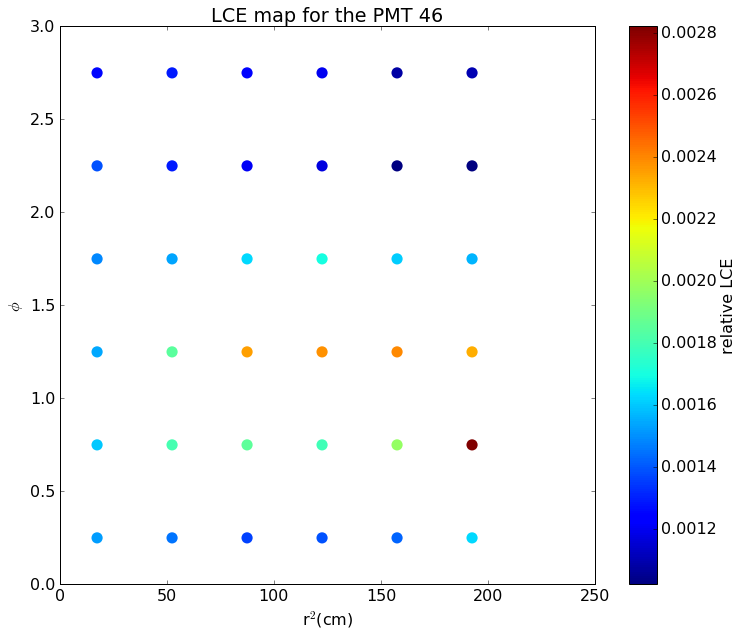

In [85]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_46']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result46=ri,zi,s1_mean_values

plt.scatter(result46[0],result46[1], c=result46[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 46')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_46']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi46=ri,phii,s1_mean_values

plt.scatter(resultphi46[0],resultphi46[1], c=resultphi46[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 46')
plt.show()

# PMT 47

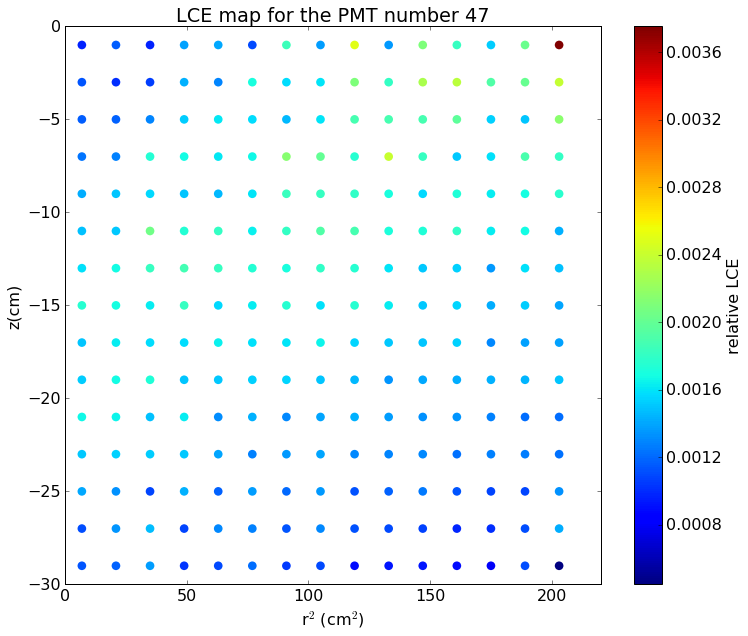

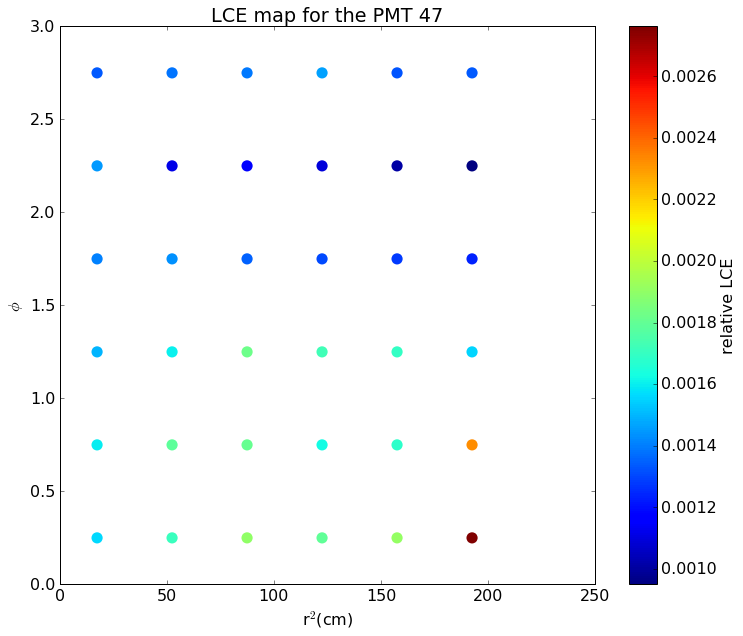

In [86]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_47']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result47=ri,zi,s1_mean_values

plt.scatter(result47[0],result47[1], c=result47[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 47')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_47']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi47=ri,phii,s1_mean_values

plt.scatter(resultphi47[0],resultphi47[1], c=resultphi47[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 47')
plt.show()

# PMT 48

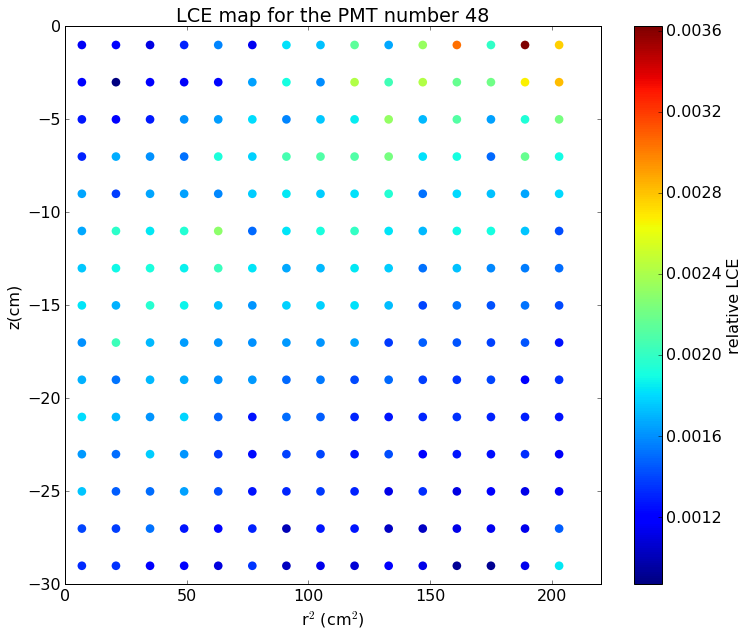

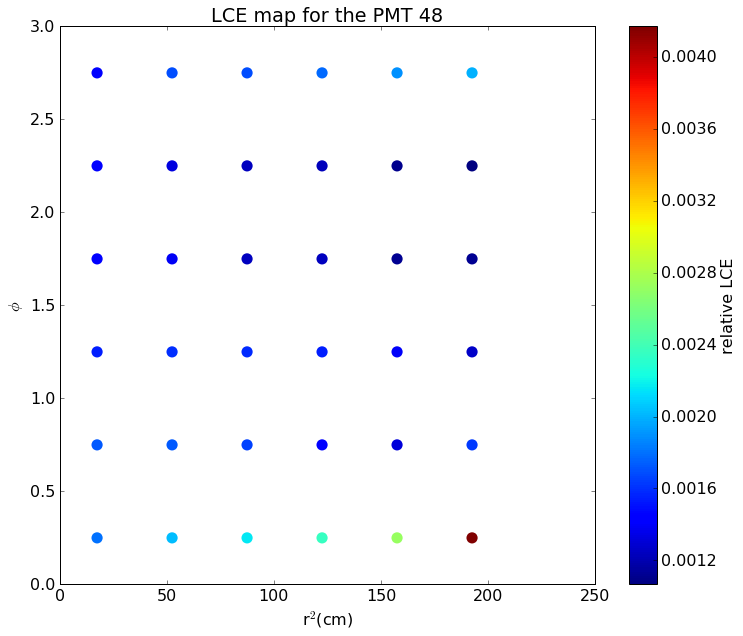

In [87]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_48']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result48=ri,zi,s1_mean_values

plt.scatter(result48[0],result48[1], c=result48[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 48')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_48']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi48=ri,phii,s1_mean_values

plt.scatter(resultphi48[0],resultphi48[1], c=resultphi48[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 48')
plt.show()

# PMT 49

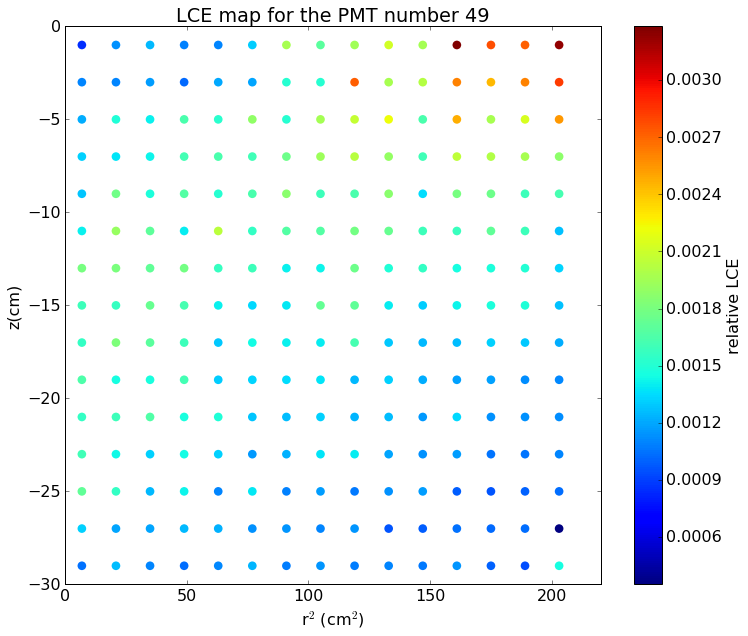

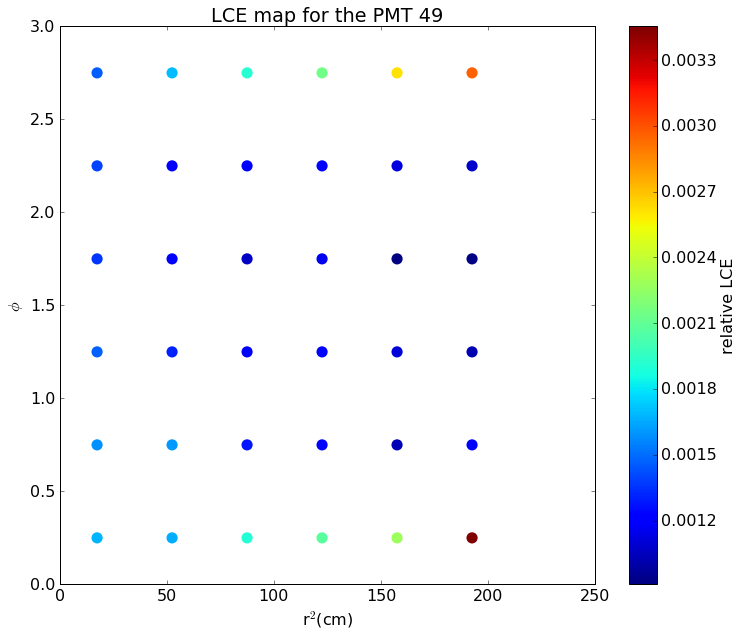

In [88]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_49']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result49=ri,zi,s1_mean_values

plt.scatter(result49[0],result49[1], c=result49[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 49')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_49']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi49=ri,phii,s1_mean_values

plt.scatter(resultphi49[0],resultphi49[1], c=resultphi49[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 49')
plt.show()

# PMT 50

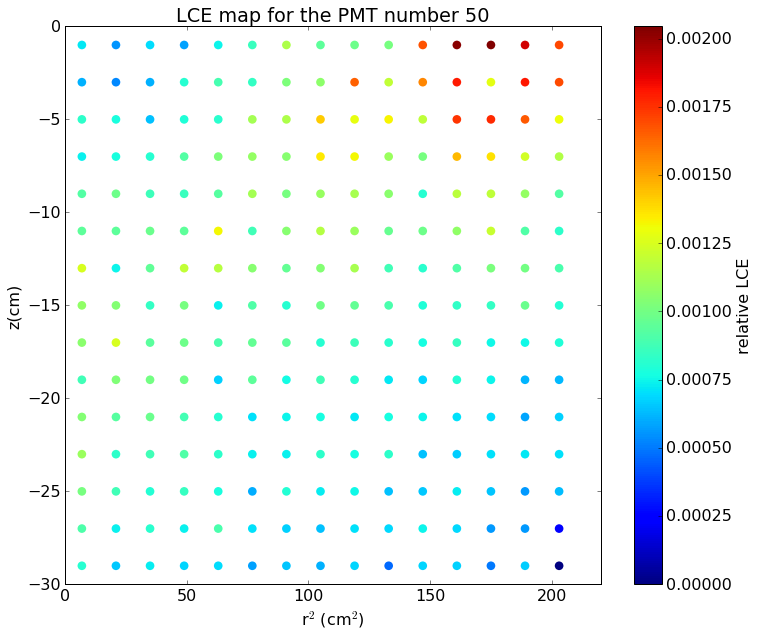

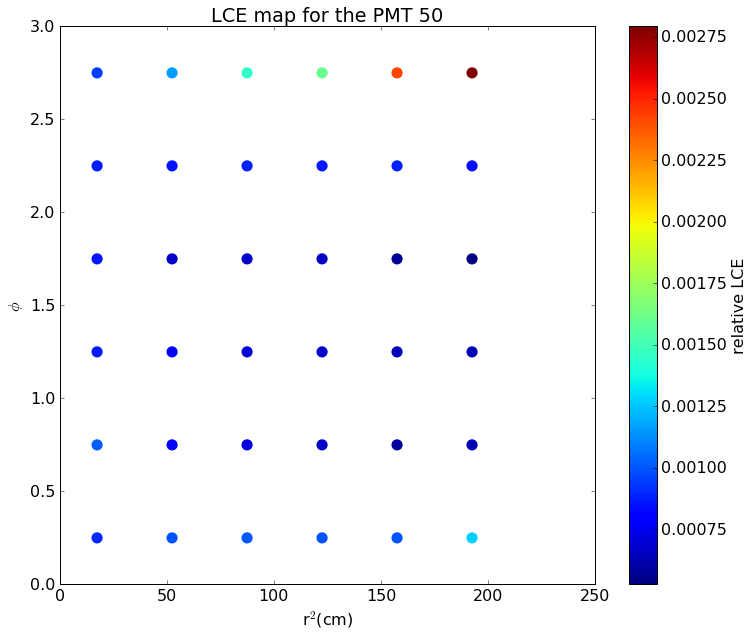

In [89]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_50']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result50=ri,zi,s1_mean_values

plt.scatter(result50[0],result50[1], c=result50[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 50')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_50']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi50=ri,phii,s1_mean_values

plt.scatter(resultphi50[0],resultphi50[1], c=resultphi50[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 50')
plt.show()

# PMT 51

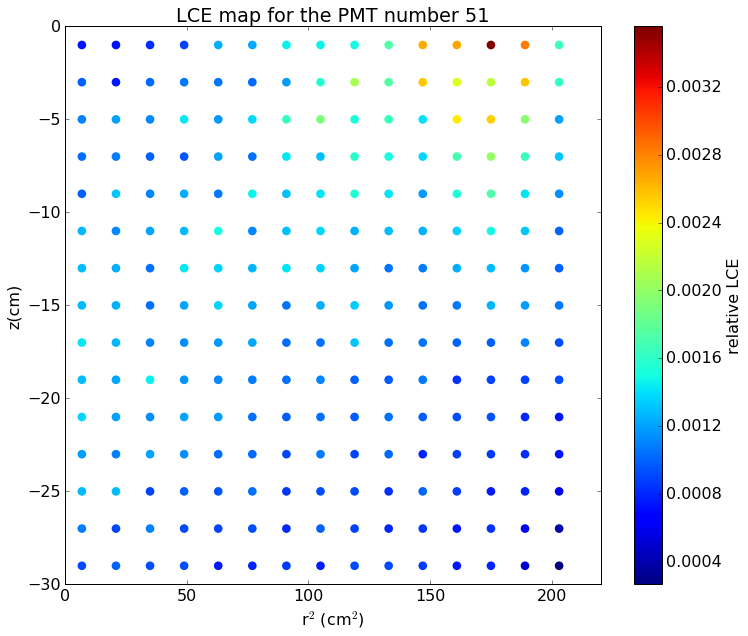

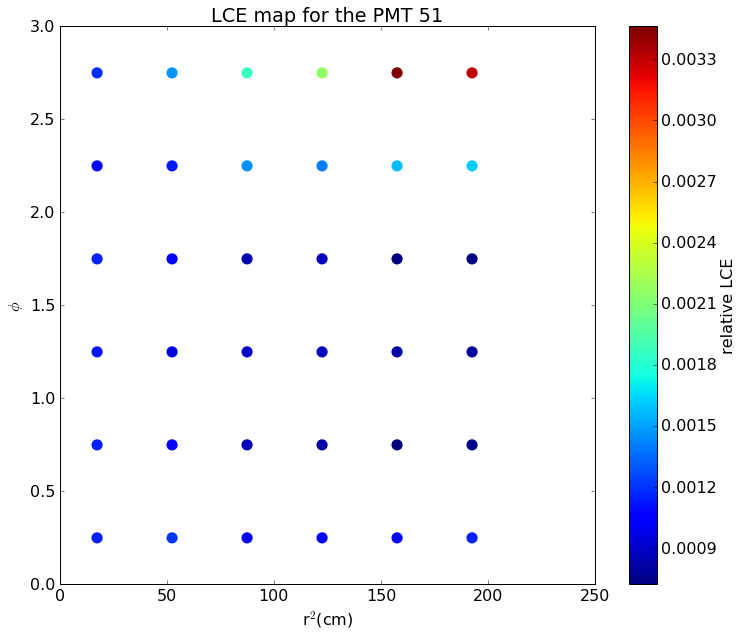

In [90]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_51']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result51=ri,zi,s1_mean_values

plt.scatter(result51[0],result51[1], c=result51[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 51')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_51']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi51=ri,phii,s1_mean_values

plt.scatter(resultphi51[0],resultphi51[1], c=resultphi51[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 51')
plt.show()

# PMT 52

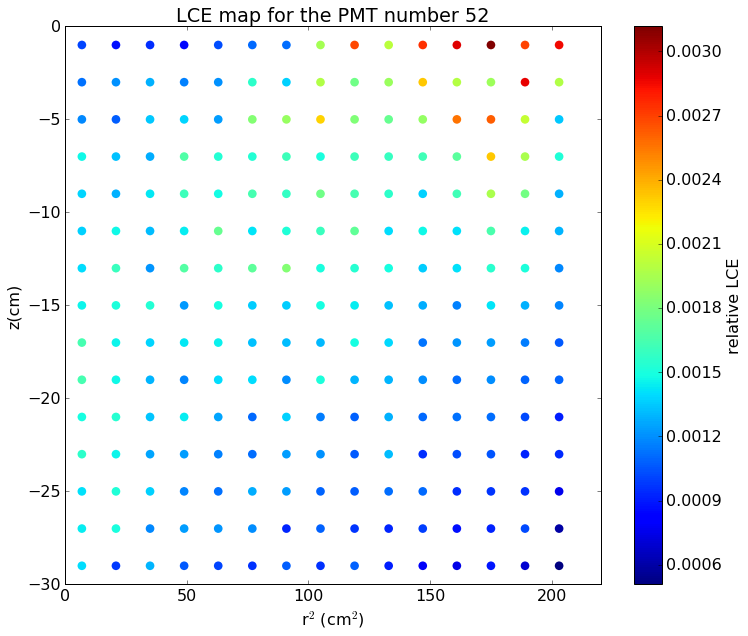

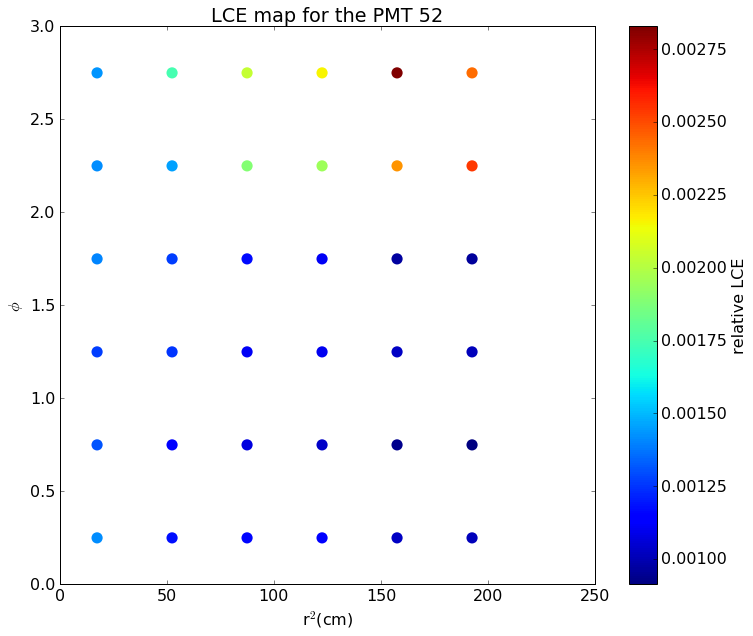

In [91]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_52']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result52=ri,zi,s1_mean_values

plt.scatter(result52[0],result52[1], c=result52[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 52')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_52']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi52=ri,phii,s1_mean_values

plt.scatter(resultphi52[0],resultphi52[1], c=resultphi52[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 52')
plt.show()

# PMT 53

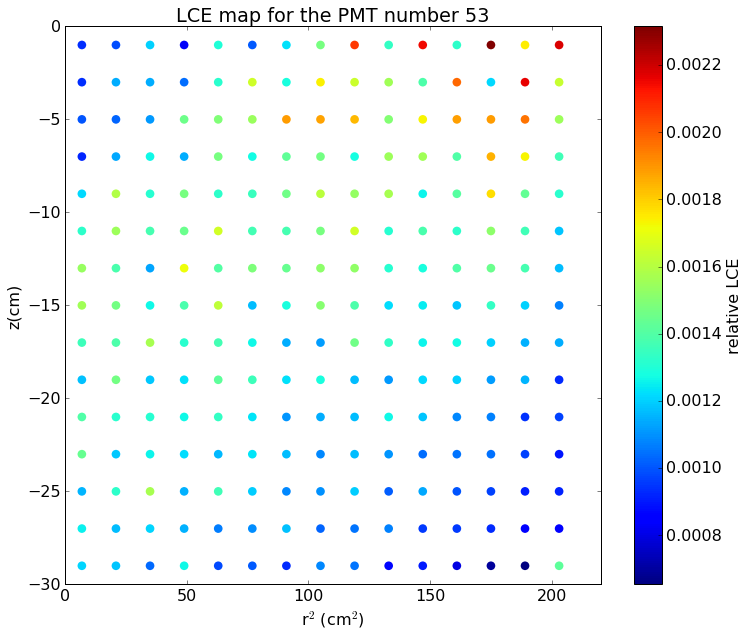

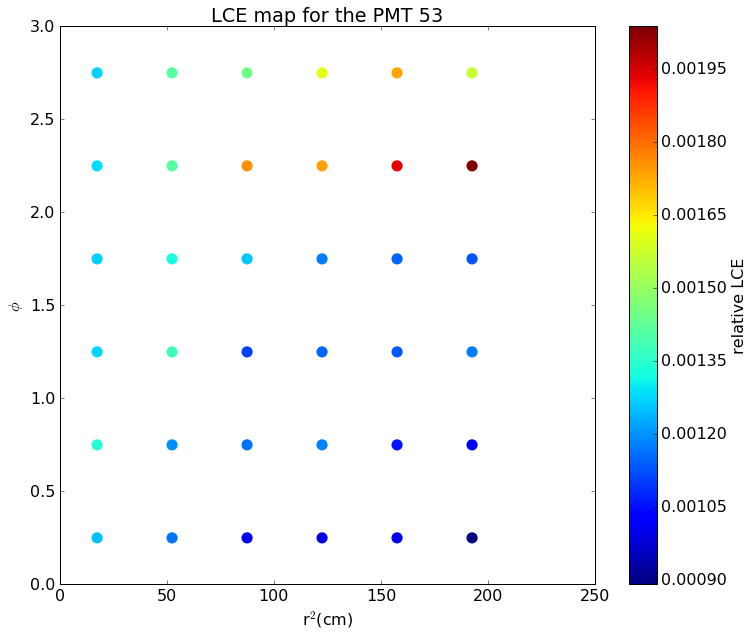

In [92]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_53']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result53=ri,zi,s1_mean_values

plt.scatter(result53[0],result53[1], c=result53[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 53')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_53']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi53=ri,phii,s1_mean_values

plt.scatter(resultphi53[0],resultphi53[1], c=resultphi53[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 53')
plt.show()

# PMT 54

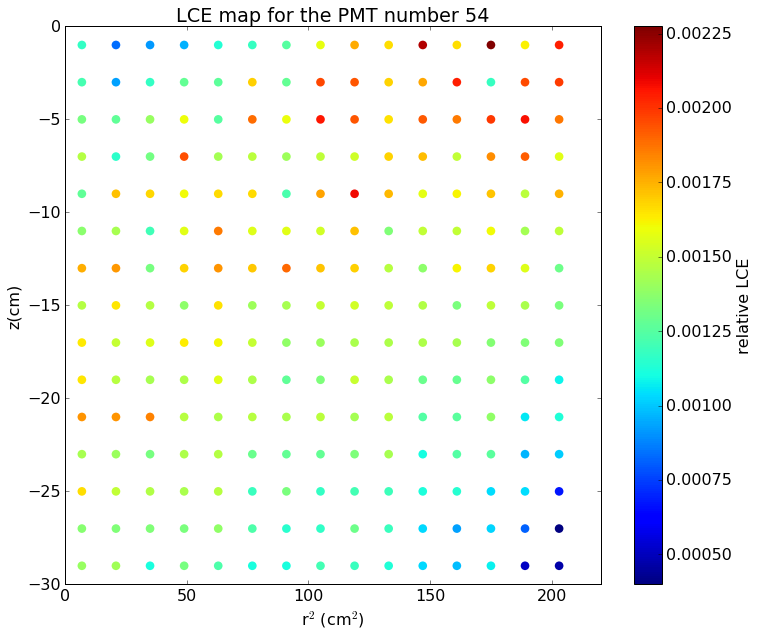

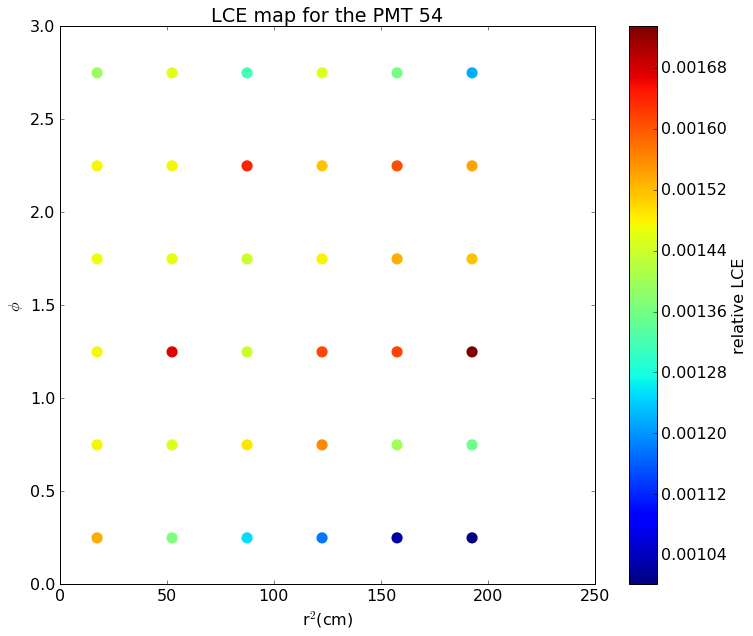

In [93]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_54']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result54=ri,zi,s1_mean_values

plt.scatter(result54[0],result54[1], c=result54[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 54')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_54']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi54=ri,phii,s1_mean_values

plt.scatter(resultphi54[0],resultphi54[1], c=resultphi54[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 54')
plt.show()

# PMT 55

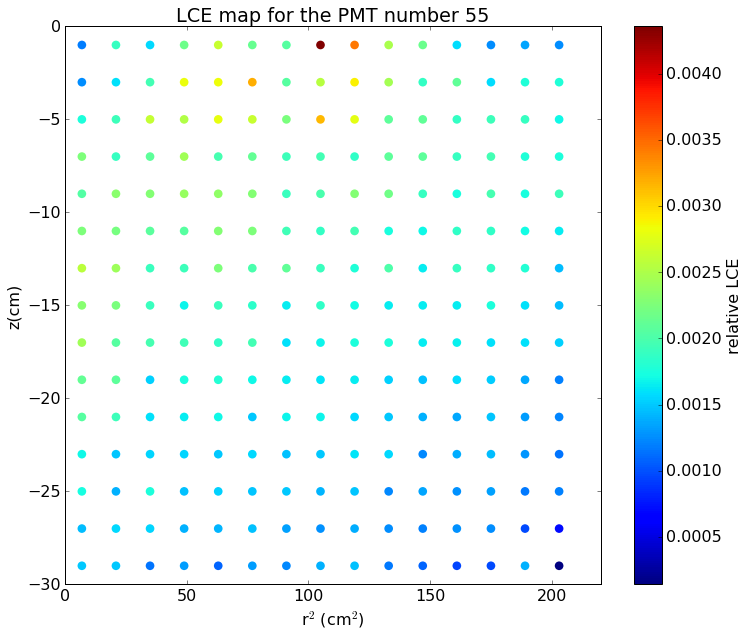

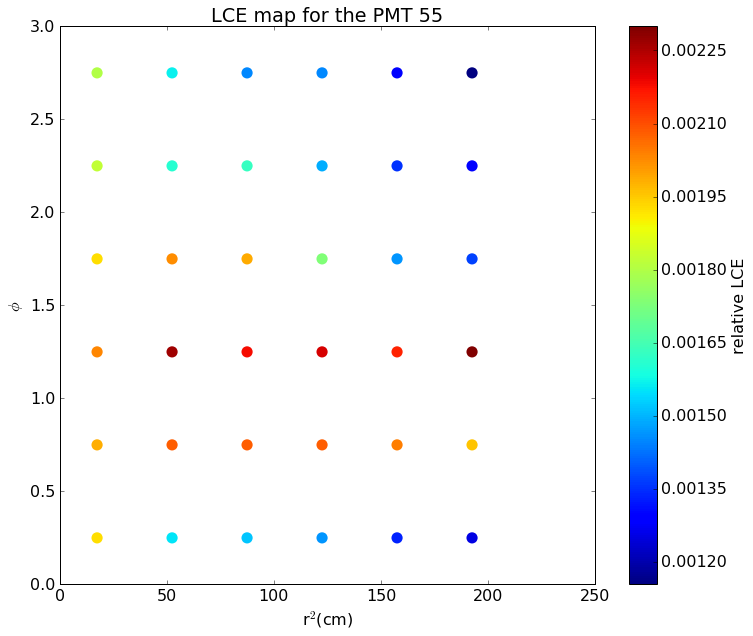

In [94]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_55']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result55=ri,zi,s1_mean_values

plt.scatter(result55[0],result55[1], c=result55[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 55')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_55']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi55=ri,phii,s1_mean_values

plt.scatter(resultphi55[0],resultphi55[1], c=resultphi55[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 55')
plt.show()

# PMT 56

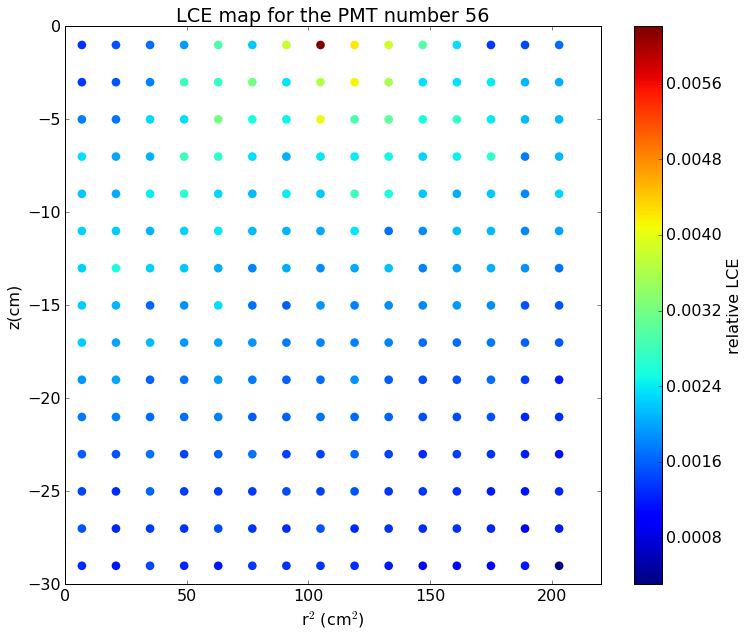

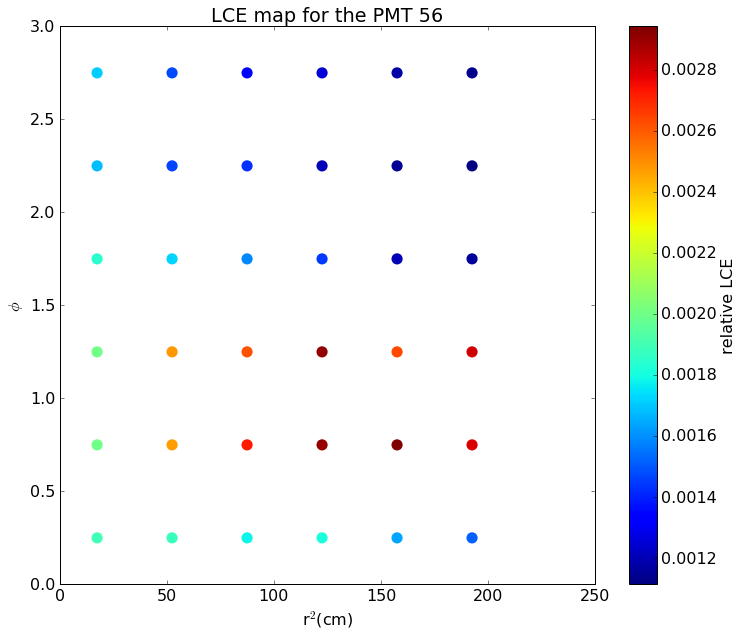

In [95]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_56']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result56=ri,zi,s1_mean_values

plt.scatter(result56[0],result56[1], c=result56[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 56')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_56']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi56=ri,phii,s1_mean_values

plt.scatter(resultphi56[0],resultphi56[1], c=resultphi56[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 56')
plt.show()

# PMT 57

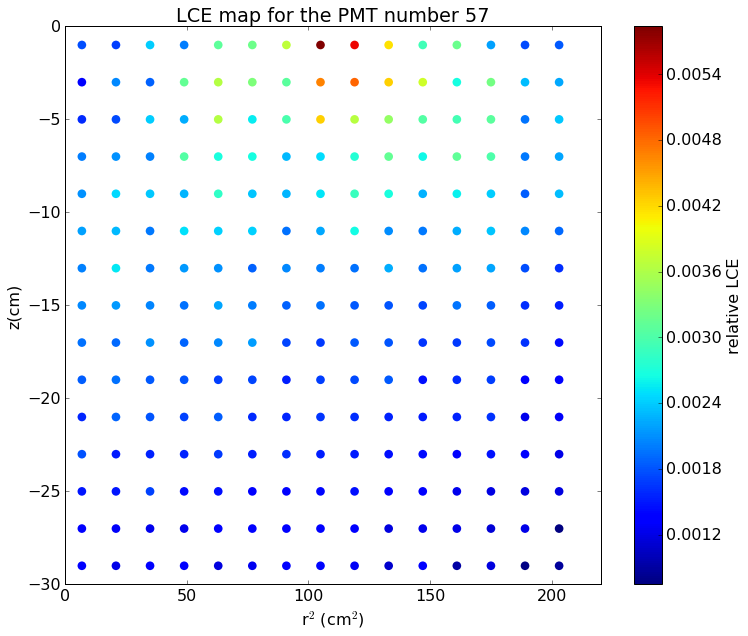

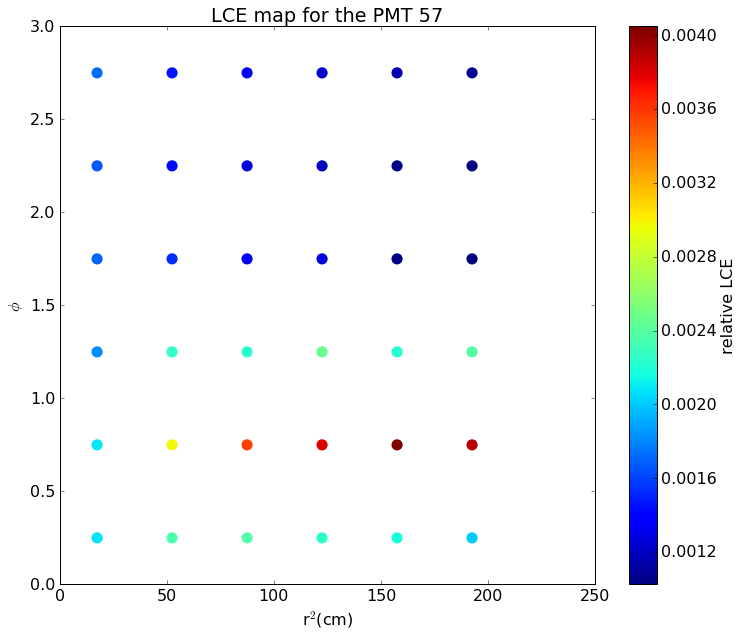

In [97]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_57']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result57=ri,zi,s1_mean_values

plt.scatter(result57[0],result57[1], c=result57[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 57')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_57']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi57=ri,phii,s1_mean_values

plt.scatter(resultphi57[0],resultphi57[1], c=resultphi57[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 57')
plt.show()

# PMT 58

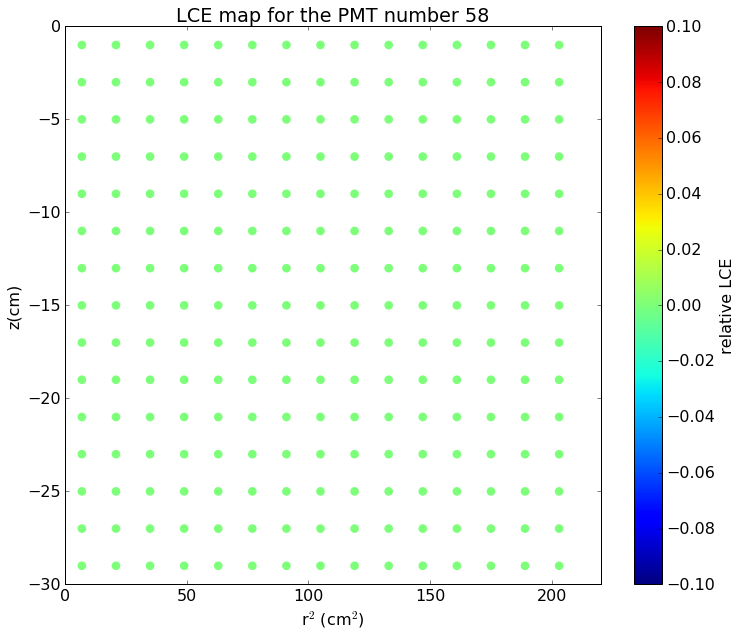

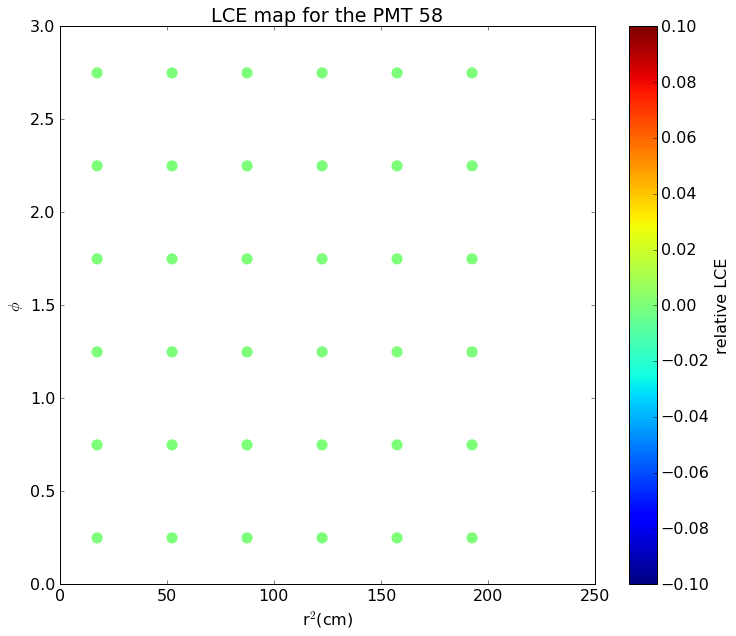

In [98]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_58']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result58=ri,zi,s1_mean_values

plt.scatter(result58[0],result58[1], c=result58[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 58')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_58']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi58=ri,phii,s1_mean_values

plt.scatter(resultphi58[0],resultphi58[1], c=resultphi58[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 58')
plt.show()

# PMT 59

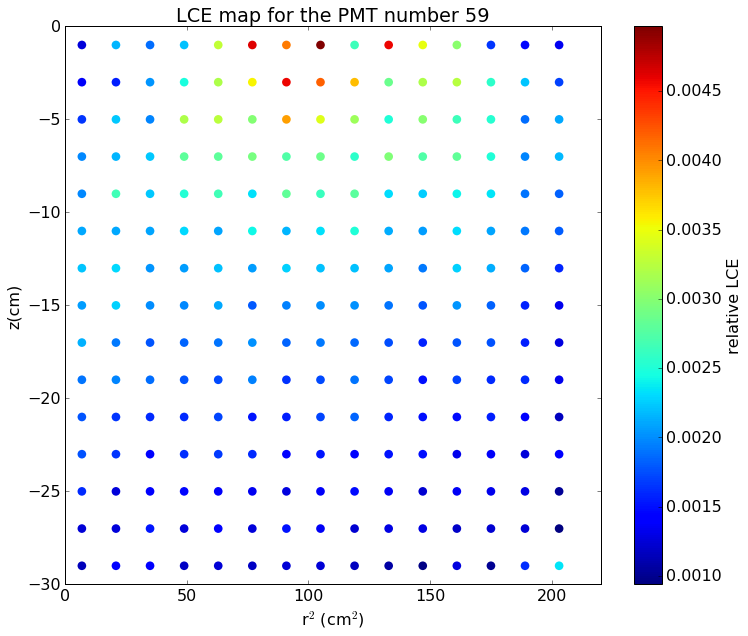

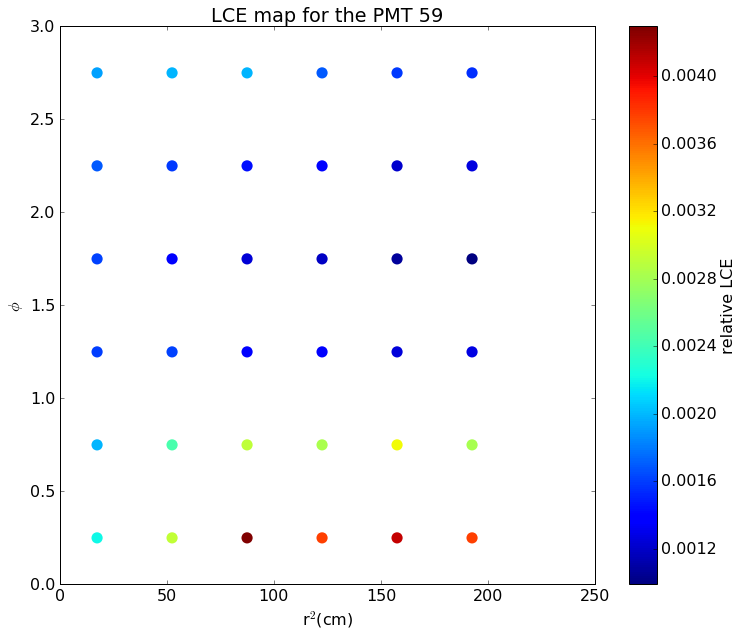

In [99]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_59']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result59=ri,zi,s1_mean_values

plt.scatter(result59[0],result59[1], c=result59[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 59')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_59']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi59=ri,phii,s1_mean_values

plt.scatter(resultphi59[0],resultphi59[1], c=resultphi59[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 59')
plt.show()

# PMT 60

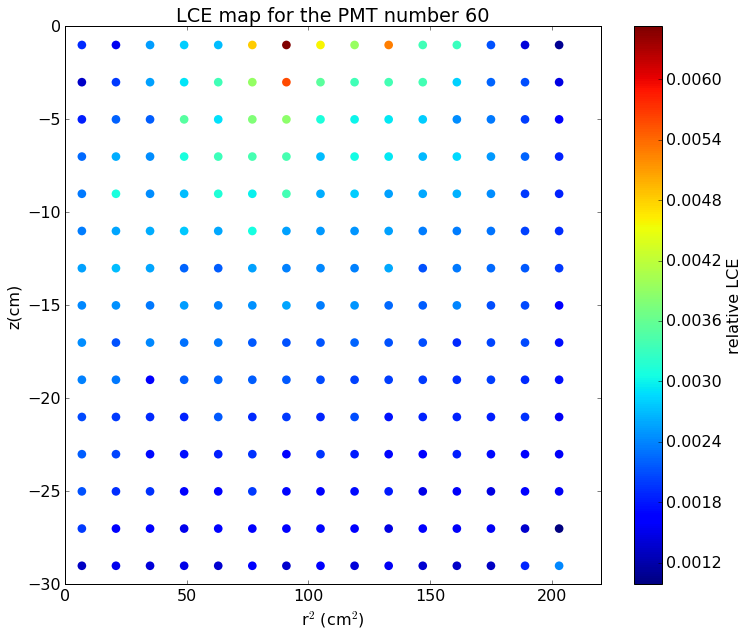

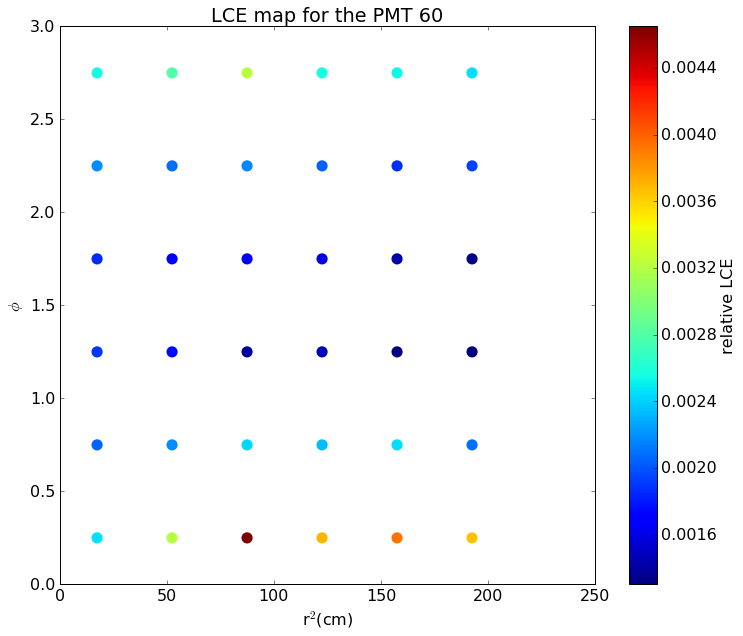

In [100]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_60']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result60=ri,zi,s1_mean_values

plt.scatter(result60[0],result60[1], c=result60[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 60')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_60']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi60=ri,phii,s1_mean_values

plt.scatter(resultphi60[0],resultphi60[1], c=resultphi60[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 60')
plt.show()

# PMT 61

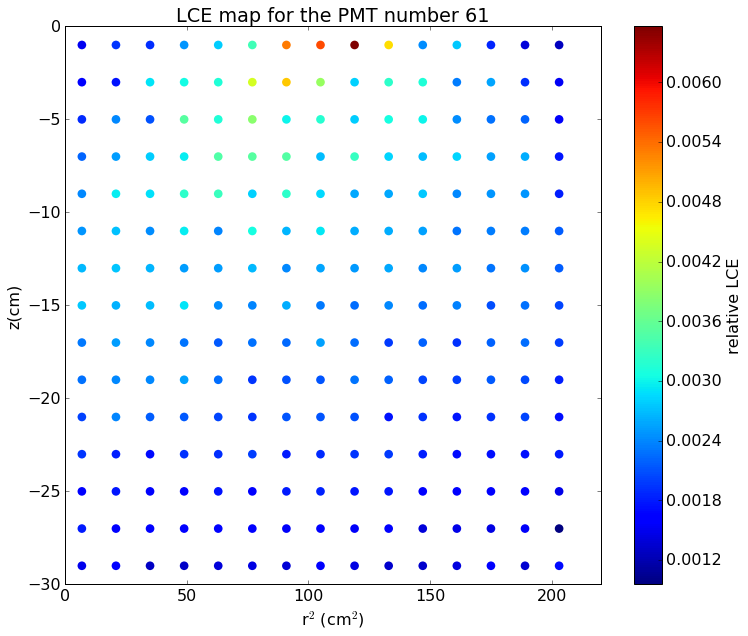

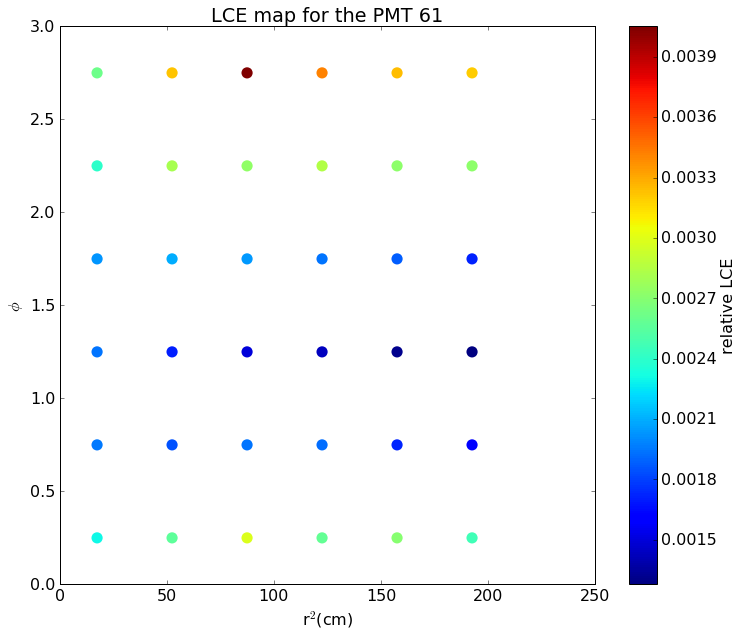

In [101]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_61']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result61=ri,zi,s1_mean_values

plt.scatter(result61[0],result61[1], c=result61[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 61')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_61']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi61=ri,phii,s1_mean_values

plt.scatter(resultphi61[0],resultphi61[1], c=resultphi61[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 61')
plt.show()

# PMT 62

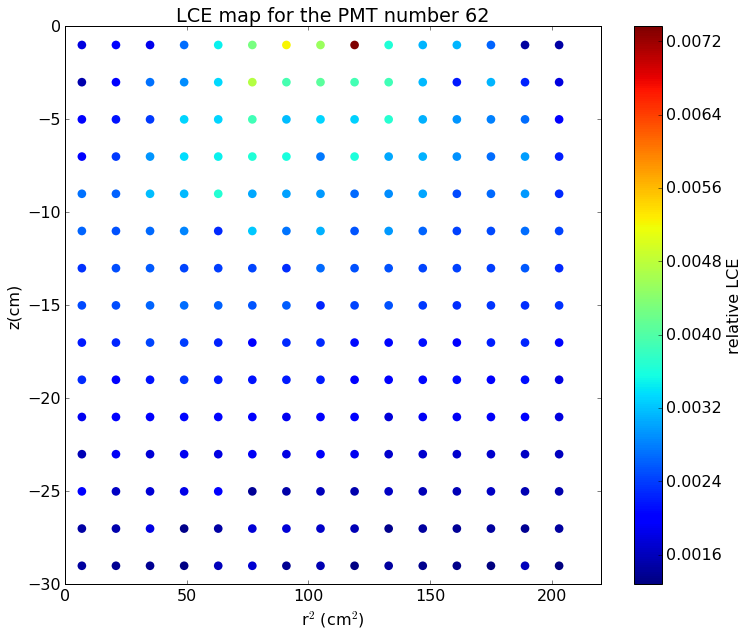

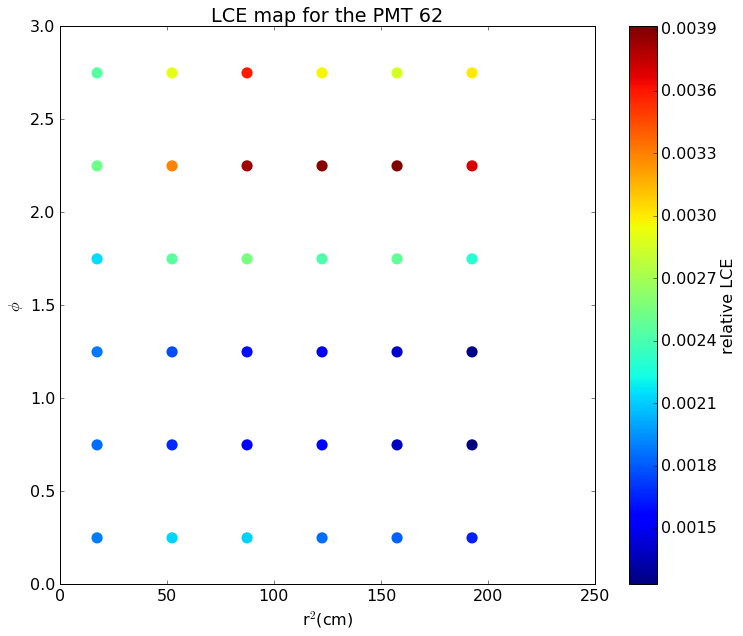

In [102]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_62']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result62=ri,zi,s1_mean_values

plt.scatter(result62[0],result62[1], c=result62[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 62')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_62']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi62=ri,phii,s1_mean_values

plt.scatter(resultphi62[0],resultphi62[1], c=resultphi62[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 62')
plt.show()

# PMT 63

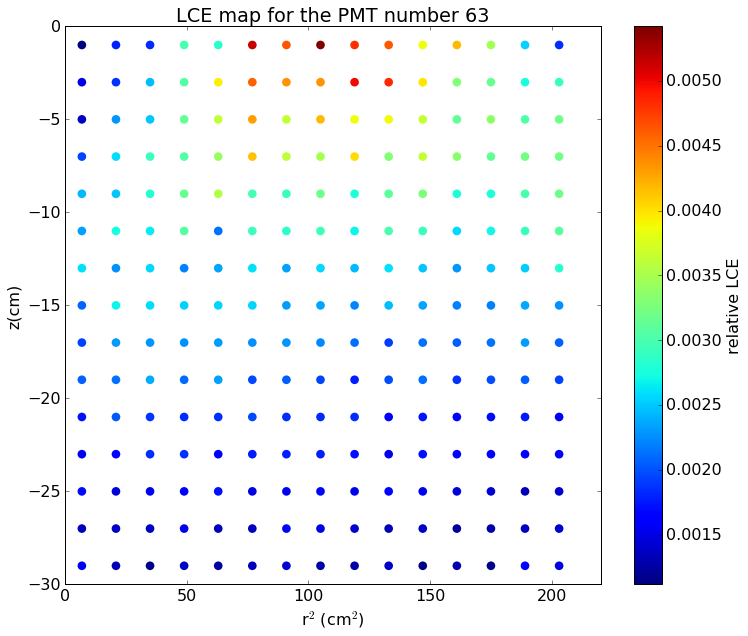

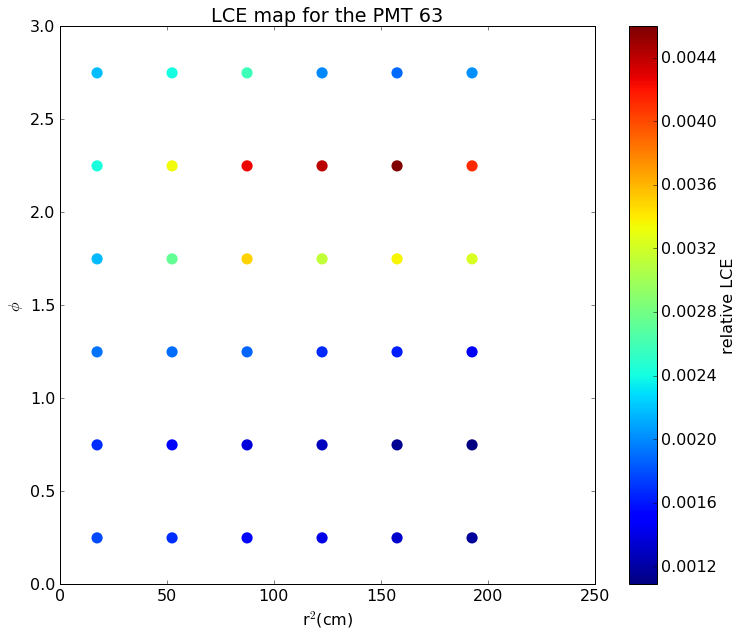

In [103]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_63']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result63=ri,zi,s1_mean_values

plt.scatter(result63[0],result63[1], c=result63[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 63')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_63']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi63=ri,phii,s1_mean_values

plt.scatter(resultphi63[0],resultphi63[1], c=resultphi63[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 63')
plt.show()

# PMT 64 

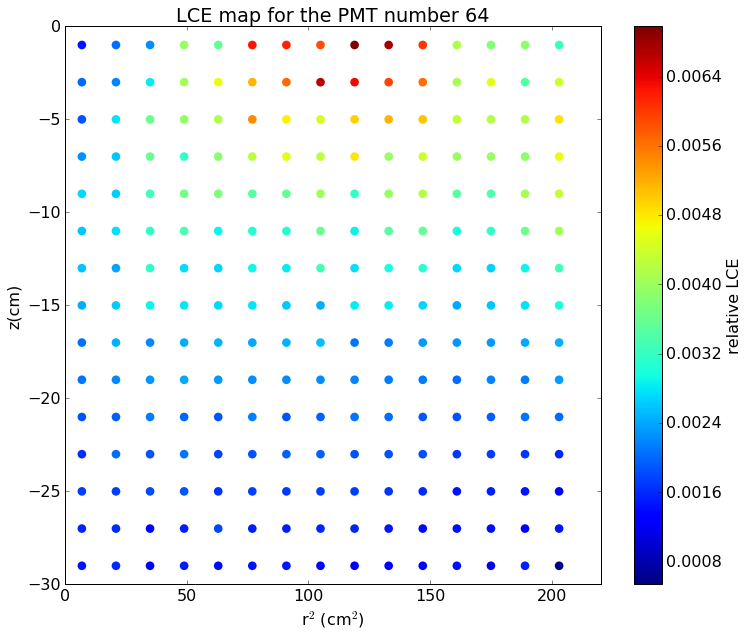

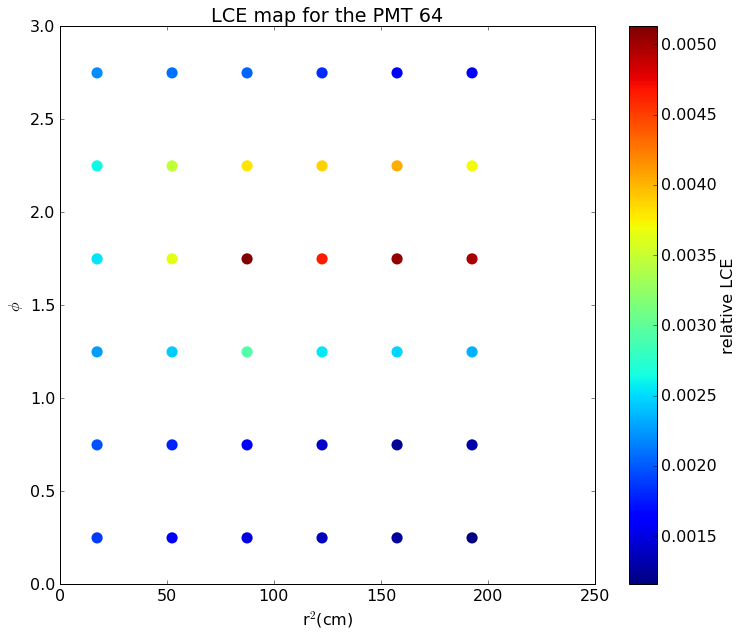

In [104]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_64']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result64=ri,zi,s1_mean_values

plt.scatter(result64[0],result64[1], c=result64[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 64')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_64']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi64=ri,phii,s1_mean_values

plt.scatter(resultphi64[0],resultphi64[1], c=resultphi64[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 64')
plt.show()

# PMT 65

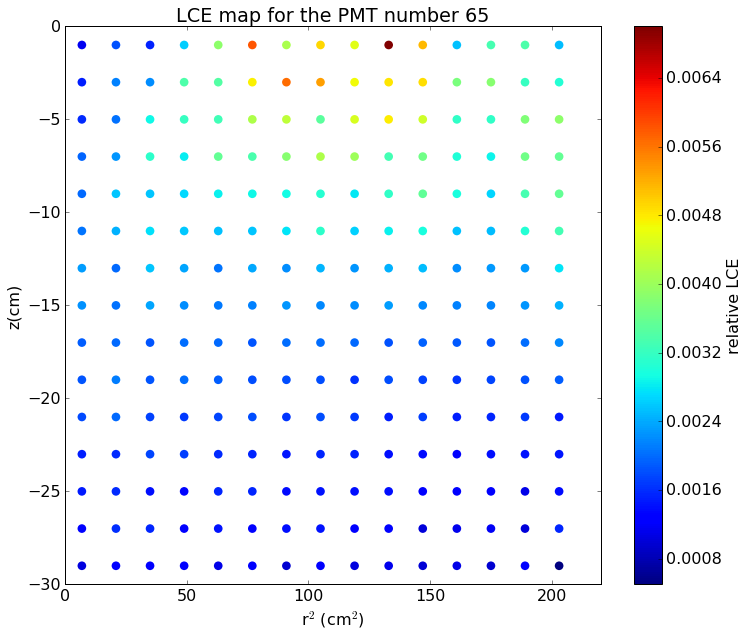

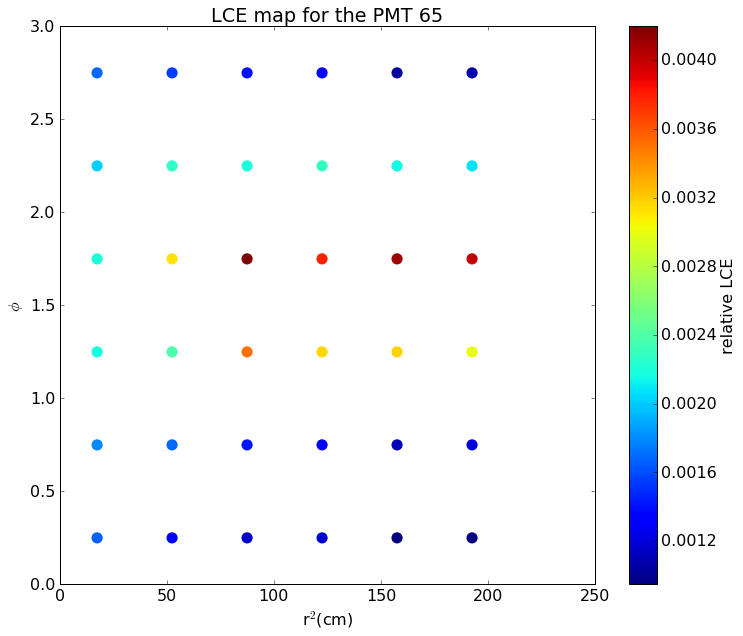

In [105]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_65']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result65=ri,zi,s1_mean_values

plt.scatter(result65[0],result65[1], c=result65[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 65')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_65']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi65=ri,phii,s1_mean_values

plt.scatter(resultphi65[0],resultphi65[1], c=resultphi65[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 65')
plt.show()

# PMT 66

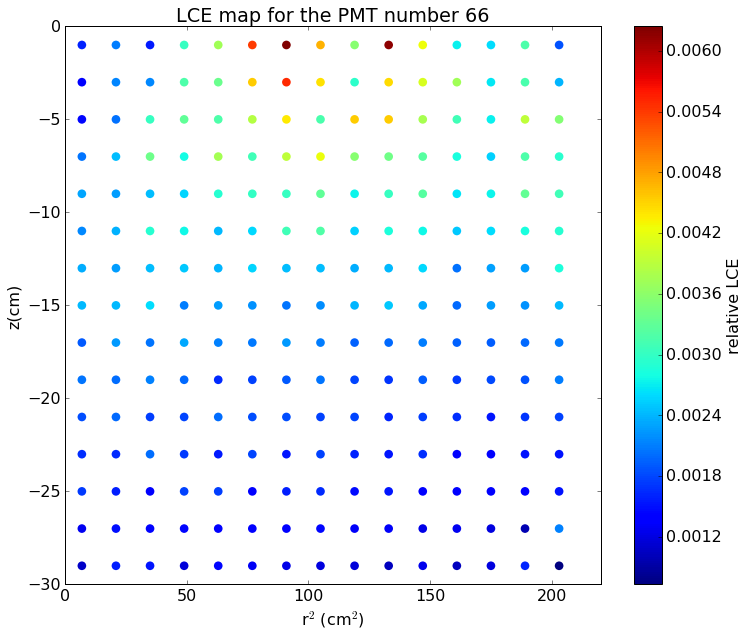

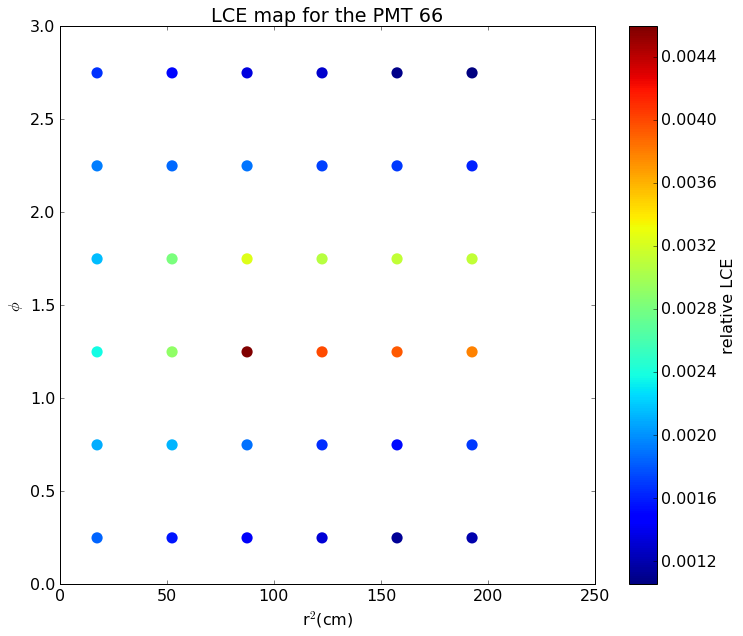

In [107]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_66']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result66=ri,zi,s1_mean_values

plt.scatter(result66[0],result66[1], c=result66[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 66')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_66']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi66=ri,phii,s1_mean_values

plt.scatter(resultphi66[0],resultphi66[1], c=resultphi66[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 66')
plt.show()

# PMT 67

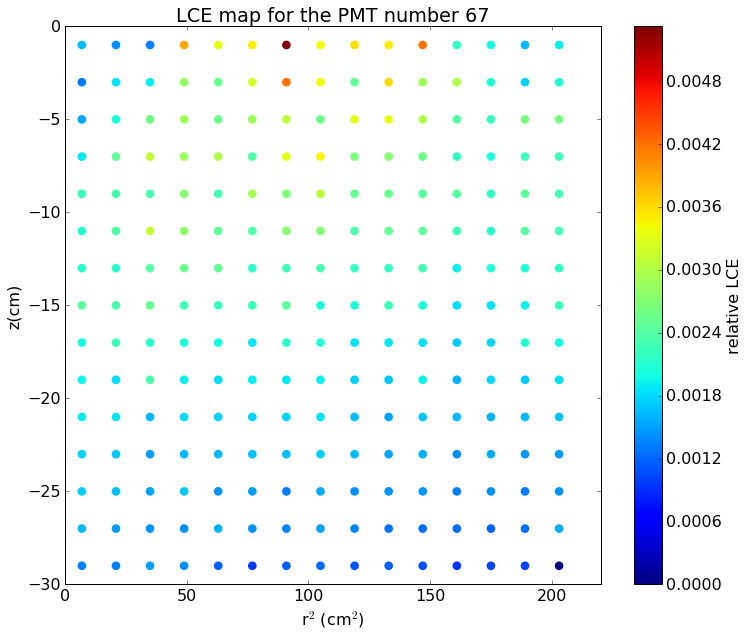

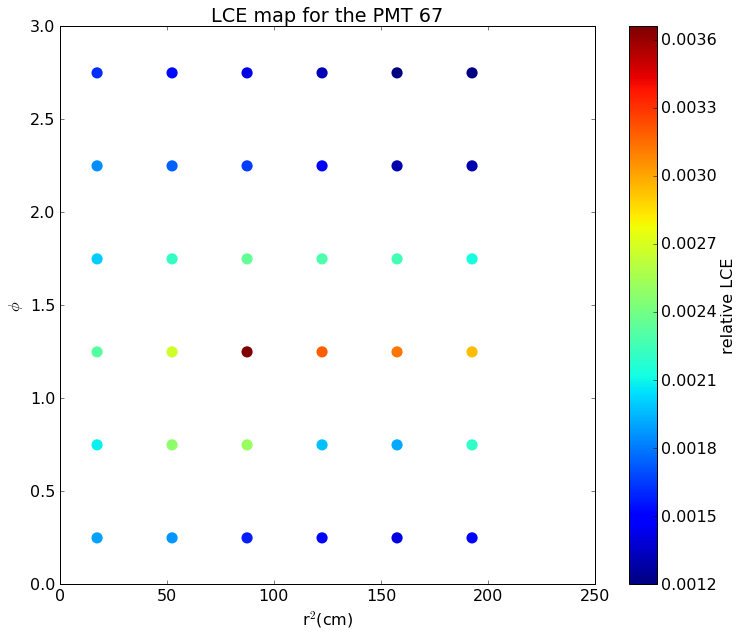

In [108]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_67']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result67=ri,zi,s1_mean_values

plt.scatter(result67[0],result67[1], c=result67[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 67')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_67']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi67=ri,phii,s1_mean_values

plt.scatter(resultphi67[0],resultphi67[1], c=resultphi67[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 67')
plt.show()

# PMT 68

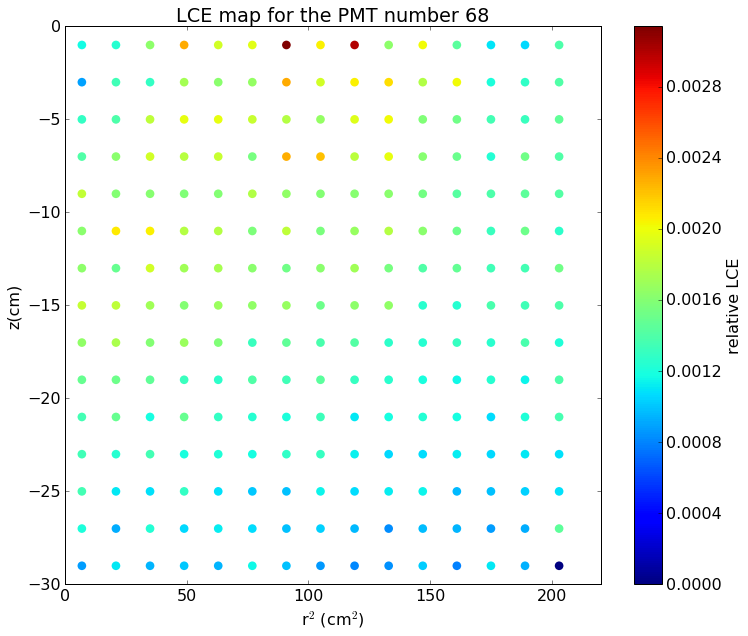

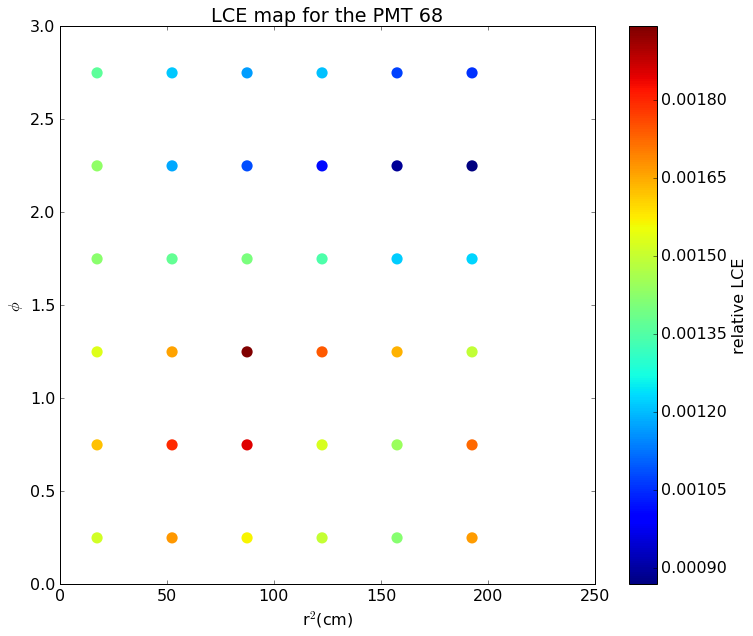

In [109]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_68']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result68=ri,zi,s1_mean_values

plt.scatter(result68[0],result68[1], c=result68[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 68')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_68']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi68=ri,phii,s1_mean_values

plt.scatter(resultphi68[0],resultphi68[1], c=resultphi68[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 68')
plt.show()

# PMT 69

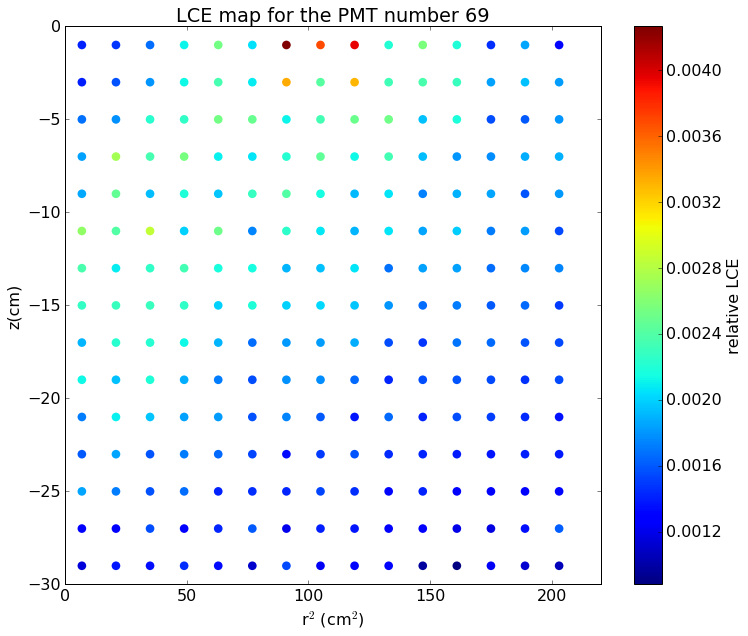

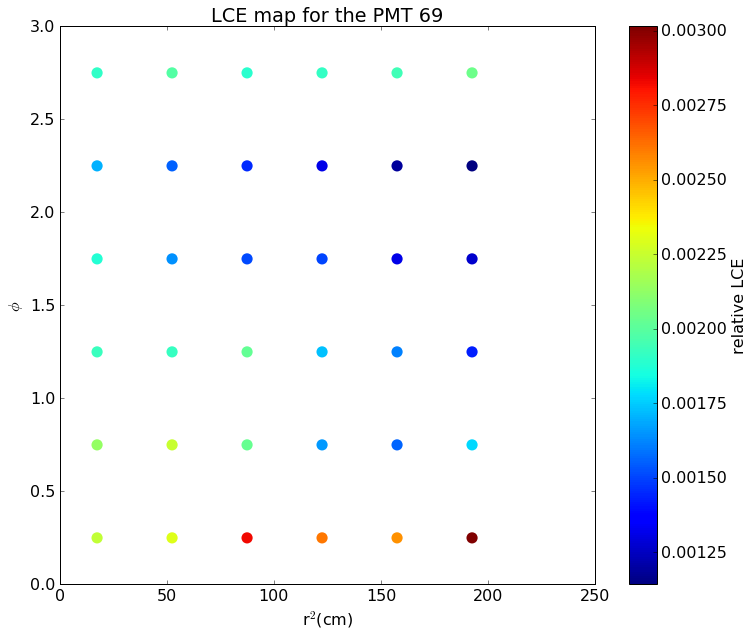

In [110]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_69']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result69=ri,zi,s1_mean_values

plt.scatter(result69[0],result69[1], c=result69[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 69')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_69']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi69=ri,phii,s1_mean_values

plt.scatter(resultphi69[0],resultphi69[1], c=resultphi69[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 69')
plt.show()